In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import datetime

In [54]:

pathfile=r'data_anonymous'

# reflist: list of epc in each box
reflist=pd.DataFrame()
# 
files=os.listdir(pathfile)
for file in files:
    print(file)
    if file.startswith('reflist_'):
        temp=pd.read_csv(os.path.join(pathfile,file),sep=',').reset_index(drop=True)[['Epc']]
        temp['refListId']=file.split('.')[0]
        #reflist=reflist.append(temp)
        reflist = pd.concat([reflist, temp],axis=0) 
reflist=reflist.rename(columns={'refListId':'refListId_actual'})
reflist['refListId_actual']=reflist['refListId_actual'].apply(lambda x:int(x[8:]))
Q_refListId_actual=reflist.groupby('refListId_actual')['Epc'].nunique().rename('Q refListId_actual').reset_index(drop=False)
reflist=pd.merge(reflist,Q_refListId_actual,on='refListId_actual',how='left')
reflist

ano_APTags-TagsAutomatedProcess-2019-11-07-16_29_46.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_57_34.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_16_18.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_32_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_58_50.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_13_30.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_21_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_30_01.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_38_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_49_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_00_26.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_10_51.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_20_14.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_29_54.csv
ano_APTags-TagsAutomatedProcess-2019-11-08-10_55_25.csv
ano_supply-process.2019-11-07-CUT.csv
reflist_0.olpn
reflist_1.olpn
reflist_2.olpn
reflist_3.olpn
reflist_4.olpn
reflist_5.olpn
reflist_6.olpn
reflist_7.olpn
re

Epc  refListId_actual  Q refListId_actual
0     epc_90                 0                  16
1     epc_91                 0                  16
2     epc_92                 0                  16
3     epc_93                 0                  16
4     epc_94                 0                  16
..       ...               ...                 ...
197  epc_133                 9                   8
198  epc_134                 9                   8
199  epc_135                 9                   8
200  epc_136                 9                   8
201  epc_137                 9                   8

[202 rows x 3 columns]

In [55]:
# pathfile=r'data_anonymous'
# 
# df : rfid readings
df=pd.DataFrame()
# 
files=os.listdir(pathfile)
for file in files:
    print(file)
    if file.startswith('ano_APTags'):
        temp=pd.read_csv(os.path.join(pathfile,file),sep=',')
        #df=df.append(temp)
        df = pd.concat([df, temp],axis=0) 
df['LogTime']=pd.to_datetime (df['LogTime'] ,format='%Y-%m-%d-%H:%M:%S') 
df['TimeStamp']=df['TimeStamp'].astype(float)
df['Rssi']=df['Rssi'].astype(float)
df=df.drop(['Reader','EmitPower','Frequency'],axis=1).reset_index(drop=True)
df=df[['LogTime', 'Epc', 'Rssi', 'Ant']]
# antennas 1 and 2 are facing the box when photocell in/out 
Ant_loc=pd.DataFrame({'Ant':[1,2,3,4],'loc':['in','in','out','out']})
df=pd.merge(df,Ant_loc,on=['Ant'])
df=df.sort_values('LogTime').reset_index(drop=True)

ano_APTags-TagsAutomatedProcess-2019-11-07-16_29_46.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-16_57_34.csv


ano_APTags-TagsAutomatedProcess-2019-11-07-17_16_18.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_32_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-17_58_50.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_13_30.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_21_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_30_01.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_38_19.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-18_49_44.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_00_26.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_10_51.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_20_14.csv
ano_APTags-TagsAutomatedProcess-2019-11-07-19_29_54.csv
ano_APTags-TagsAutomatedProcess-2019-11-08-10_55_25.csv
ano_supply-process.2019-11-07-CUT.csv
reflist_0.olpn
reflist_1.olpn
reflist_2.olpn
reflist_3.olpn
reflist_4.olpn
reflist_5.olpn
reflist_6.olpn
reflist_7.olpn
reflist_8.olpn
reflist_9.olpn


In [56]:
tags=df
tags.head()

LogTime      Epc  Rssi  Ant  loc
0 2019-11-07 15:32:10  epc_100 -69.0    3  out
1 2019-11-07 15:32:10   epc_97 -69.0    3  out
2 2019-11-07 15:32:10   epc_97 -65.0    3  out
3 2019-11-07 15:32:10   epc_99 -70.0    3  out
4 2019-11-07 15:32:10  epc_100 -66.0    3  out

In [57]:
len(df)

1204003

In [58]:
# timing: photocells a time window for each box: start/stop (ciuchStart, ciuchStop)
file=r'ano_supply-process.2019-11-07-CUT.csv'
timing=pd.read_csv(os.path.join(pathfile,file),sep=',')
timing['file']=file
timing['date']=pd.to_datetime(timing['date'],format='%d/%m/%Y %H:%M:%S,%f')
timing['ciuchStart']=pd.to_datetime(timing['ciuchStart'],format='%d/%m/%Y %H:%M:%S,%f')
timing['ciuchStop']=pd.to_datetime(timing['ciuchStop'],format='%d/%m/%Y %H:%M:%S,%f')
timing['timestampStart']=timing['timestampStart'].astype(float)
timing['timestampStop']=timing['timestampStop'].astype(float)
timing=timing.sort_values('date')
timing.loc[:,'refListId']=timing.loc[:,'refListId'].apply(lambda x:int(x[8:]))
timing=timing[['refListId', 'ciuchStart', 'ciuchStop']]
timing[:1]

refListId              ciuchStart               ciuchStop
0         0 2019-11-07 18:53:52.370 2019-11-07 18:53:54.197

In [59]:
len(timing)

389

In [60]:
timing

refListId              ciuchStart               ciuchStop
0           0 2019-11-07 18:53:52.370 2019-11-07 18:53:54.197
1           1 2019-11-07 18:54:02.637 2019-11-07 18:54:04.463
2           2 2019-11-07 18:54:13.587 2019-11-07 18:54:15.447
3           3 2019-11-07 18:54:17.942 2019-11-07 18:54:19.591
4           4 2019-11-07 18:54:23.683 2019-11-07 18:54:25.528
..        ...                     ...                     ...
384         7 2019-11-07 19:34:22.740 2019-11-07 19:34:24.686
385         8 2019-11-07 19:34:27.950 2019-11-07 19:34:29.670
386         9 2019-11-07 19:34:33.696 2019-11-07 19:34:35.671
387         0 2019-11-07 19:34:39.687 2019-11-07 19:34:41.624
388         1 2019-11-07 19:34:46.836 2019-11-07 19:34:48.639

[389 rows x 3 columns]

In [61]:
# ciuchStart_up starts upstream ciuchStart, half way in between the previous stop and the actual start
timing[['ciuchStop_last']]=timing[['ciuchStop']].shift(1)
timing[['refListId_last']]=timing[['refListId']].shift(1)

timing['ciuchStartup']=timing['ciuchStart'] - (timing['ciuchStart'] - timing['ciuchStop_last'])/2
# timing start: 10sec before timing
timing.loc[0,'refListId_last']=timing.loc[0,'refListId']
timing.loc[0,'ciuchStartup']=timing.loc[0,'ciuchStart']-datetime.timedelta(seconds=10)
timing.loc[0,'ciuchStop_last']=timing.loc[0,'ciuchStartup']-datetime.timedelta(seconds=10)
timing['refListId_last']=timing['refListId_last'].astype(int)
# 
timing['ciuchStopdown']= timing['ciuchStartup'].shift(-1)
timing.loc[len(timing)-1,'ciuchStopdown']=timing.loc[len(timing)-1,'ciuchStop']+datetime.timedelta(seconds=10)
timing=timing[['refListId', 'refListId_last','ciuchStartup', 'ciuchStart','ciuchStop','ciuchStopdown']]
timing.head()

refListId  refListId_last               ciuchStartup  \
0         0               0 2019-11-07 18:53:42.370000   
1         1               0 2019-11-07 18:53:58.417000   
2         2               1 2019-11-07 18:54:09.025000   
3         3               2 2019-11-07 18:54:16.694500   
4         4               3 2019-11-07 18:54:21.637000   

               ciuchStart               ciuchStop              ciuchStopdown  
0 2019-11-07 18:53:52.370 2019-11-07 18:53:54.197 2019-11-07 18:53:58.417000  
1 2019-11-07 18:54:02.637 2019-11-07 18:54:04.463 2019-11-07 18:54:09.025000  
2 2019-11-07 18:54:13.587 2019-11-07 18:54:15.447 2019-11-07 18:54:16.694500  
3 2019-11-07 18:54:17.942 2019-11-07 18:54:19.591 2019-11-07 18:54:21.637000  
4 2019-11-07 18:54:23.683 2019-11-07 18:54:25.528 2019-11-07 18:54:27.475000

In [62]:
# box 0 always starts
timing[timing['refListId']==0].head()

refListId  refListId_last               ciuchStartup  \
0          0               0 2019-11-07 18:53:42.370000   
10         0               9 2019-11-07 18:54:55.894500   
20         0               9 2019-11-07 18:55:53.460500   
30         0               9 2019-11-07 18:56:51.317000   
40         0               9 2019-11-07 18:58:02.390500   

                ciuchStart               ciuchStop              ciuchStopdown  
0  2019-11-07 18:53:52.370 2019-11-07 18:53:54.197 2019-11-07 18:53:58.417000  
10 2019-11-07 18:54:57.738 2019-11-07 18:54:59.584 2019-11-07 18:55:01.765000  
20 2019-11-07 18:55:55.497 2019-11-07 18:55:57.377 2019-11-07 18:55:59.567500  
30 2019-11-07 18:56:53.344 2019-11-07 18:56:55.215 2019-11-07 18:56:57.241500  
40 2019-11-07 18:58:04.351 2019-11-07 18:58:06.212 2019-11-07 18:58:11.428000

In [63]:
# t0_run = a new run starts when box 0 shows up
t0_run=timing[timing['refListId']==0] [['ciuchStartup']]
t0_run=t0_run.rename(columns={'ciuchStartup':'t0_run'})
t0_run=t0_run.groupby('t0_run').size().cumsum().rename('run').reset_index(drop=False)
t0_run=t0_run.sort_values('t0_run')
# 
# each row in timing is merged with a last row in t0_run where t0_run (ciuchstart) <= timing (ciuchstart)
timing=pd.merge_asof(timing,t0_run,left_on='ciuchStartup',right_on='t0_run', direction='backward')
timing=timing.sort_values('ciuchStop')
timing=timing[['run', 'refListId', 'refListId_last', 'ciuchStartup','ciuchStart','ciuchStop','ciuchStopdown','t0_run']]
timing.head()

run refListId  refListId_last               ciuchStartup  \
0    1         0               0 2019-11-07 18:53:42.370000   
1    1         1               0 2019-11-07 18:53:58.417000   
2    1         2               1 2019-11-07 18:54:09.025000   
3    1         3               2 2019-11-07 18:54:16.694500   
4    1         4               3 2019-11-07 18:54:21.637000   

               ciuchStart               ciuchStop              ciuchStopdown  \
0 2019-11-07 18:53:52.370 2019-11-07 18:53:54.197 2019-11-07 18:53:58.417000   
1 2019-11-07 18:54:02.637 2019-11-07 18:54:04.463 2019-11-07 18:54:09.025000   
2 2019-11-07 18:54:13.587 2019-11-07 18:54:15.447 2019-11-07 18:54:16.694500   
3 2019-11-07 18:54:17.942 2019-11-07 18:54:19.591 2019-11-07 18:54:21.637000   
4 2019-11-07 18:54:23.683 2019-11-07 18:54:25.528 2019-11-07 18:54:27.475000   

                   t0_run  
0 2019-11-07 18:53:42.370  
1 2019-11-07 18:53:42.370  
2 2019-11-07 18:53:42.370  
3 2019-11-07 18:53:42.370  
4 2019-11-07 18:53:42.370

In [64]:
timing[:12]

run refListId  refListId_last               ciuchStartup  \
0     1         0               0 2019-11-07 18:53:42.370000   
1     1         1               0 2019-11-07 18:53:58.417000   
2     1         2               1 2019-11-07 18:54:09.025000   
3     1         3               2 2019-11-07 18:54:16.694500   
4     1         4               3 2019-11-07 18:54:21.637000   
5     1         5               4 2019-11-07 18:54:27.475000   
6     1         6               5 2019-11-07 18:54:33.115500   
7     1         7               6 2019-11-07 18:54:38.757000   
8     1         8               7 2019-11-07 18:54:44.497000   
9     1         9               8 2019-11-07 18:54:50.140000   
10    2         0               9 2019-11-07 18:54:55.894500   
11    2         1               0 2019-11-07 18:55:01.765000   

                ciuchStart               ciuchStop              ciuchStopdown  \
0  2019-11-07 18:53:52.370 2019-11-07 18:53:54.197 2019-11-07 18:53:58.417000   
1  2019-11-07 18:54:02.637 2019-11-07 18:54:04.463 2019-11-07 18:54:09.025000   
2  2019-11-07 18:54:13.587 2019-11-07 18:54:15.447 2019-11-07 18:54:16.694500   
3  2019-11-07 18:54:17.942 2019-11-07 18:54:19.591 2019-11-07 18:54:21.637000   
4  2019-11-07 18:54:23.683 2019-11-07 18:54:25.528 2019-11-07 18:54:27.475000   
5  2019-11-07 18:54:29.422 2019-11-07 18:54:31.278 2019-11-07 18:54:33.115500   
6  2019-11-07 18:54:34.953 2019-11-07 18:54:36.685 2019-11-07 18:54:38.757000   
7  2019-11-07 18:54:40.829 2019-11-07 18:54:42.611 2019-11-07 18:54:44.497000   
8  2019-11-07 18:54:46.383 2019-11-07 18:54:48.158 2019-11-07 18:54:50.140000   
9  2019-11-07 18:54:52.122 2019-11-07 18:54:54.051 2019-11-07 18:54:55.894500   
10 2019-11-07 18:54:57.738 2019-11-07 18:54:59.584 2019-11-07 18:55:01.765000   
11 2019-11-07 18:55:03.946 2019-11-07 18:55:05.694 2019-11-07 18:55:07.694000   

                       t0_run  
0  2019-11-07 18:53:42.370000  
1  2019-11-07 18:53:42.370000  
2  2019-11-07 18:53:42.370000  
3  2019-11-07 18:53:42.370000  
4  2019-11-07 18:53:42.370000  
5  2019-11-07 18:53:42.370000  
6  2019-11-07 18:53:42.370000  
7  2019-11-07 18:53:42.370000  
8  2019-11-07 18:53:42.370000  
9  2019-11-07 18:53:42.370000  
10 2019-11-07 18:54:55.894500  
11 2019-11-07 18:54:55.894500

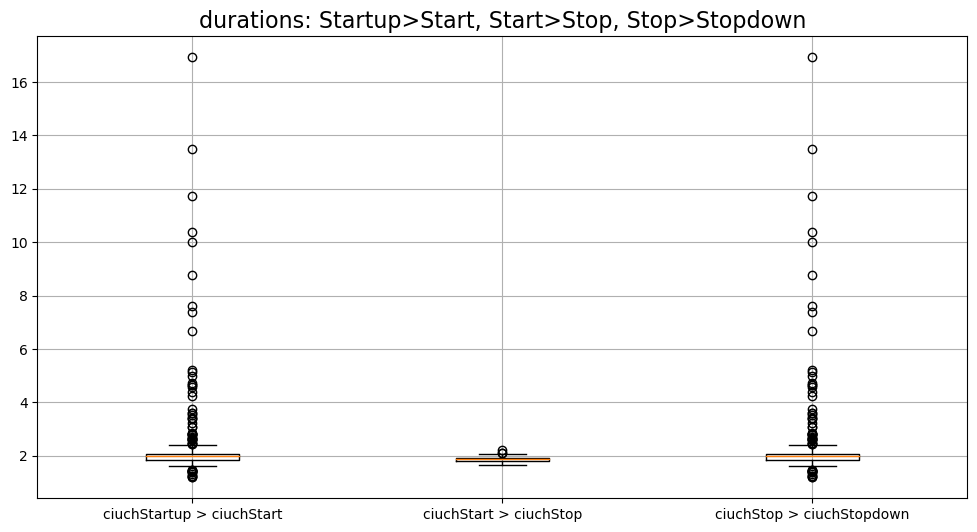

In [65]:
plt.figure(figsize=(12,6))
up=(timing['ciuchStart']-timing['ciuchStartup']).apply(lambda x:x.total_seconds())
mid=(timing['ciuchStop']-timing['ciuchStart']).apply(lambda x:x.total_seconds())
down=(timing['ciuchStopdown']-timing['ciuchStop']).apply(lambda x:x.total_seconds())
plt.boxplot([up,mid,down],labels=['ciuchStartup > ciuchStart','ciuchStart > ciuchStop','ciuchStop > ciuchStopdown'])
plt.grid()
plt.title('durations: Startup>Start, Start>Stop, Stop>Stopdown',size=16)
plt.show()

In [66]:
#  full window (ciuchStartup > ciuchStopdown) is sliced in smaller slices
# ciuchStartup > ciuchStart: 11 slices named up_0, up_1, ..., up_10
# ciuchStart > ciuchStop: 11 slices named mid_0, mid_1, ... mid_10
# ciuchStop > ciuchStopdown: 11 slices names down_0, down_1, ... down_10
slices=pd.DataFrame()
for i, row in timing .iterrows():
    ciuchStartup=row['ciuchStartup']
    ciuchStart=row['ciuchStart']
    ciuchStop=row['ciuchStop']
    ciuchStopdown=row['ciuchStopdown']
    steps=4
#     
    up=pd.DataFrame(index=pd.date_range(start=ciuchStartup, end=ciuchStart,periods=steps,inclusive='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    up.index=['up_'+str(x) for x in range(steps-1)]
    #slices=slices.append(up)
    slices=pd.concat([slices, up])
#     
    mid=pd.DataFrame(index=pd.date_range(start=ciuchStart, end=ciuchStop,periods=steps,inclusive='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    mid.index=['mid_'+str(x) for x in range(steps-1)]
    #slices=slices.append(mid)
    slices=pd.concat([slices, mid])
#     
    down=pd.DataFrame(index=pd.date_range(start=ciuchStop, end=ciuchStopdown,periods=steps,inclusive='left'))\
        .reset_index(drop=False).rename(columns={'index':'slice'})
    down.index=['down_'+str(x) for x in range(steps-1)]
    slices=pd.concat([slices, down])
#     slices=slices.append(up)
slices=slices.reset_index(drop=False).rename(columns={'index':'slice_id'})
# 
timing_slices=pd.merge_asof(slices,timing,left_on='slice',right_on='ciuchStartup',direction='backward')
timing_slices=timing_slices[['run', 'refListId', 'refListId_last','slice_id','slice',  \
                             'ciuchStartup', 'ciuchStart', 'ciuchStop', 'ciuchStopdown','t0_run']]
timing_slices.head()

run refListId  refListId_last slice_id                         slice  \
0    1         0               0     up_0 2019-11-07 18:53:42.370000000   
1    1         0               0     up_1 2019-11-07 18:53:45.703333333   
2    1         0               0     up_2 2019-11-07 18:53:49.036666666   
3    1         0               0    mid_0 2019-11-07 18:53:52.370000000   
4    1         0               0    mid_1 2019-11-07 18:53:52.979000000   

             ciuchStartup              ciuchStart               ciuchStop  \
0 2019-11-07 18:53:42.370 2019-11-07 18:53:52.370 2019-11-07 18:53:54.197   
1 2019-11-07 18:53:42.370 2019-11-07 18:53:52.370 2019-11-07 18:53:54.197   
2 2019-11-07 18:53:42.370 2019-11-07 18:53:52.370 2019-11-07 18:53:54.197   
3 2019-11-07 18:53:42.370 2019-11-07 18:53:52.370 2019-11-07 18:53:54.197   
4 2019-11-07 18:53:42.370 2019-11-07 18:53:52.370 2019-11-07 18:53:54.197   

            ciuchStopdown                  t0_run  
0 2019-11-07 18:53:58.417 2019-11-07 18:53:42.370  
1 2019-11-07 18:53:58.417 2019-11-07 18:53:42.370  
2 2019-11-07 18:53:58.417 2019-11-07 18:53:42.370  
3 2019-11-07 18:53:58.417 2019-11-07 18:53:42.370  
4 2019-11-07 18:53:58.417 2019-11-07 18:53:42.370

In [67]:
len(timing_slices)

3501

In [68]:
# merge between df and timing
# merge_asof needs sorted df > df_ref
df=df[ (df['LogTime']>=timing['ciuchStartup'].min()) & (df['LogTime']<=timing['ciuchStopdown'].max())  ]
df=df.sort_values('LogTime')
# 
# each row in df_ref is merged with the last row in timing where timing (ciuchstart_up) < df_ref (logtime)
# 
# df_timing=pd.merge_asof(df_ref,timing,left_on=['LogTime'],right_on=['ciuchStartup'],direction='backward')
# df_timing=df_timing.dropna()
# df_timing=df_timing.sort_values('LogTime').reset_index(drop=True)
# df_timing=df_timing[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup',\
#                      'LogTime', 'ciuchStop', 'ciuchStopdown','Rssi', 'loc', 'refListId_actual']]
# 
# each row in df_ref is merged with the last row in timing_slices where timing (slice) < df_ref (logtime)
# 
df_timing_slices=pd.merge_asof(df,timing_slices,left_on=['LogTime'],right_on=['slice'],direction='backward')
df_timing_slices=df_timing_slices.dropna()
df_timing_slices=df_timing_slices.sort_values('slice').reset_index(drop=True)
df_timing_slices=df_timing_slices[['run', 'Epc','refListId', 'refListId_last', 'ciuchStartup','slice_id','slice','LogTime', \
                      'ciuchStart','ciuchStop', 'ciuchStopdown', 'Rssi', 'loc','t0_run']]

df_timing_slices

run      Epc refListId  refListId_last            ciuchStartup  \
0         1  epc_131         0               0 2019-11-07 18:53:42.370   
1         1  epc_133         0               0 2019-11-07 18:53:42.370   
2         1  epc_131         0               0 2019-11-07 18:53:42.370   
3         1  epc_133         0               0 2019-11-07 18:53:42.370   
4         1  epc_175         0               0 2019-11-07 18:53:42.370   
...     ...      ...       ...             ...                     ...   
356063   40  epc_162         1               0 2019-11-07 19:34:44.230   
356064   40  epc_187         1               0 2019-11-07 19:34:44.230   
356065   40   epc_87         1               0 2019-11-07 19:34:44.230   
356066   40  epc_188         1               0 2019-11-07 19:34:44.230   
356067   40  epc_162         1               0 2019-11-07 19:34:44.230   

       slice_id                         slice             LogTime  \
0          up_0 2019-11-07 18:53:42.370000000 2019-11-07 18:53:43   
1          up_0 2019-11-07 18:53:42.370000000 2019-11-07 18:53:45   
2          up_0 2019-11-07 18:53:42.370000000 2019-11-07 18:53:45   
3          up_0 2019-11-07 18:53:42.370000000 2019-11-07 18:53:45   
4          up_0 2019-11-07 18:53:42.370000000 2019-11-07 18:53:45   
...         ...                           ...                 ...   
356063   down_2 2019-11-07 19:34:55.305666666 2019-11-07 19:34:57   
356064   down_2 2019-11-07 19:34:55.305666666 2019-11-07 19:34:57   
356065   down_2 2019-11-07 19:34:55.305666666 2019-11-07 19:34:57   
356066   down_2 2019-11-07 19:34:55.305666666 2019-11-07 19:34:57   
356067   down_2 2019-11-07 19:34:55.305666666 2019-11-07 19:34:58   

                    ciuchStart               ciuchStop  \
0      2019-11-07 18:53:52.370 2019-11-07 18:53:54.197   
1      2019-11-07 18:53:52.370 2019-11-07 18:53:54.197   
2      2019-11-07 18:53:52.370 2019-11-07 18:53:54.197   
3      2019-11-07 18:53:52.370 2019-11-07 18:53:54.197   
4      2019-11-07 18:53:52.370 2019-11-07 18:53:54.197   
...                        ...                     ...   
356063 2019-11-07 19:34:46.836 2019-11-07 19:34:48.639   
356064 2019-11-07 19:34:46.836 2019-11-07 19:34:48.639   
356065 2019-11-07 19:34:46.836 2019-11-07 19:34:48.639   
356066 2019-11-07 19:34:46.836 2019-11-07 19:34:48.639   
356067 2019-11-07 19:34:46.836 2019-11-07 19:34:48.639   

                 ciuchStopdown  Rssi  loc                  t0_run  
0      2019-11-07 18:53:58.417 -62.0  out 2019-11-07 18:53:42.370  
1      2019-11-07 18:53:58.417 -67.0   in 2019-11-07 18:53:42.370  
2      2019-11-07 18:53:58.417 -69.0   in 2019-11-07 18:53:42.370  
3      2019-11-07 18:53:58.417 -67.0  out 2019-11-07 18:53:42.370  
4      2019-11-07 18:53:58.417 -65.0  out 2019-11-07 18:53:42.370  
...                        ...   ...  ...                     ...  
356063 2019-11-07 19:34:58.639 -67.0  out 2019-11-07 19:34:37.679  
356064 2019-11-07 19:34:58.639 -65.0  out 2019-11-07 19:34:37.679  
356065 2019-11-07 19:34:58.639 -69.0  out 2019-11-07 19:34:37.679  
356066 2019-11-07 19:34:58.639 -59.0  out 2019-11-07 19:34:37.679  
356067 2019-11-07 19:34:58.639 -68.0  out 2019-11-07 19:34:37.679  

[356068 rows x 14 columns]

In [69]:
# 

In [70]:
# df_timing_slices=pd.merge(df_timing_slices, reflist, on='Epc',how='left')
# df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==0) & (df_timing_slices['refListId_actual']==9)) ]
# # 
# df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==9) & (df_timing_slices['refListId_actual']==0)) ]
# # # 
# # df_timing_slices = df_timing_slices [ ~((df_timing_slices['refListId']==0) | (df_timing_slices['refListId_actual']==0)) ]

# df_timing_slices=df_timing_slices.drop(['refListId_actual','Q refListId_actual'],axis=1)

In [71]:
runs_out=df_timing_slices .groupby('run')['refListId'].nunique().rename('Q refListId').reset_index(drop=False)
runs_out[runs_out['Q refListId']!=10]

run  Q refListId
15   16            9
22   23            9
31   32            9
39   40            2

In [72]:
current_last_windows=timing_slices.drop_duplicates(['run','refListId','refListId_last'])
current_last_windows=current_last_windows[['run','refListId','refListId_last','ciuchStop']].reset_index(drop=True)
current_last_windows[:1]

run refListId  refListId_last               ciuchStop
0    1         0               0 2019-11-07 18:53:54.197

In [73]:
# runs 16 23 32 40 have missing boxes: discarded
# also run 1 is the start, no previous box: discarded
# run 18: box 0 run at the end
# 
timing=timing[~timing['run'].isin([1,18,16,23,32,40])]
timing_slices=timing_slices[~timing_slices['run'].isin([1,18,16,23,32,40])]
df_timing_slices=df_timing_slices[~df_timing_slices['run'].isin([1,18,16,23,32,40])]

df_timing_slices=df_timing_slices.sort_values(['LogTime','Epc'])
# 

In [74]:
len(timing),len(timing_slices), len(df_timing_slices)

(340, 3060, 307965)

In [75]:
df_timing_slices[:1]

run      Epc refListId  refListId_last               ciuchStartup  \
8970    2  epc_100         0               9 2019-11-07 18:54:55.894500   

     slice_id                      slice             LogTime  \
8970     up_0 2019-11-07 18:54:55.894500 2019-11-07 18:54:56   

                  ciuchStart               ciuchStop           ciuchStopdown  \
8970 2019-11-07 18:54:57.738 2019-11-07 18:54:59.584 2019-11-07 18:55:01.765   

      Rssi loc                     t0_run  
8970 -68.0  in 2019-11-07 18:54:55.894500

In [76]:
# df_timing_slices['dt']=
df_timing_slices['dt']=(df_timing_slices['LogTime']-df_timing_slices['t0_run']).apply(lambda x:x.total_seconds())

In [77]:
df_timing_slices[:1]

run      Epc refListId  refListId_last               ciuchStartup  \
8970    2  epc_100         0               9 2019-11-07 18:54:55.894500   

     slice_id                      slice             LogTime  \
8970     up_0 2019-11-07 18:54:55.894500 2019-11-07 18:54:56   

                  ciuchStart               ciuchStop           ciuchStopdown  \
8970 2019-11-07 18:54:57.738 2019-11-07 18:54:59.584 2019-11-07 18:55:01.765   

      Rssi loc                     t0_run      dt  
8970 -68.0  in 2019-11-07 18:54:55.894500  0.1055

In [78]:
df_timing_slices['reflist_run_id'] = df_timing_slices['refListId'].astype(str) +"_"+ df_timing_slices['run'].astype(str)

In [79]:
df_timing_slices

run      Epc refListId  refListId_last               ciuchStartup  \
8970      2  epc_100         0               9 2019-11-07 18:54:55.894500   
8971      2  epc_100         0               9 2019-11-07 18:54:55.894500   
9003      2  epc_100         0               9 2019-11-07 18:54:55.894500   
9010      2  epc_100         0               9 2019-11-07 18:54:55.894500   
9082      2  epc_100         0               9 2019-11-07 18:54:55.894500   
...     ...      ...       ...             ...                        ...   
354254   39   epc_99         9               8 2019-11-07 19:34:31.683000   
354277   39   epc_99         9               8 2019-11-07 19:34:31.683000   
354305   39   epc_99         9               8 2019-11-07 19:34:31.683000   
354353   39   epc_99         9               8 2019-11-07 19:34:31.683000   
354360   39   epc_99         9               8 2019-11-07 19:34:31.683000   

       slice_id                         slice             LogTime  \
8970       up_0 2019-11-07 18:54:55.894500000 2019-11-07 18:54:56   
8971       up_0 2019-11-07 18:54:55.894500000 2019-11-07 18:54:56   
9003       up_0 2019-11-07 18:54:55.894500000 2019-11-07 18:54:56   
9010       up_0 2019-11-07 18:54:55.894500000 2019-11-07 18:54:56   
9082       up_0 2019-11-07 18:54:55.894500000 2019-11-07 18:54:56   
...         ...                           ...                 ...   
354254   down_1 2019-11-07 19:34:36.340333333 2019-11-07 19:34:37   
354277   down_1 2019-11-07 19:34:36.340333333 2019-11-07 19:34:37   
354305   down_1 2019-11-07 19:34:36.340333333 2019-11-07 19:34:37   
354353   down_1 2019-11-07 19:34:36.340333333 2019-11-07 19:34:37   
354360   down_1 2019-11-07 19:34:36.340333333 2019-11-07 19:34:37   

                    ciuchStart               ciuchStop  \
8970   2019-11-07 18:54:57.738 2019-11-07 18:54:59.584   
8971   2019-11-07 18:54:57.738 2019-11-07 18:54:59.584   
9003   2019-11-07 18:54:57.738 2019-11-07 18:54:59.584   
9010   2019-11-07 18:54:57.738 2019-11-07 18:54:59.584   
9082   2019-11-07 18:54:57.738 2019-11-07 18:54:59.584   
...                        ...                     ...   
354254 2019-11-07 19:34:33.696 2019-11-07 19:34:35.671   
354277 2019-11-07 19:34:33.696 2019-11-07 19:34:35.671   
354305 2019-11-07 19:34:33.696 2019-11-07 19:34:35.671   
354353 2019-11-07 19:34:33.696 2019-11-07 19:34:35.671   
354360 2019-11-07 19:34:33.696 2019-11-07 19:34:35.671   

                 ciuchStopdown  Rssi  loc                     t0_run       dt  \
8970   2019-11-07 18:55:01.765 -68.0   in 2019-11-07 18:54:55.894500   0.1055   
8971   2019-11-07 18:55:01.765 -47.0  out 2019-11-07 18:54:55.894500   0.1055   
9003   2019-11-07 18:55:01.765 -54.0  out 2019-11-07 18:54:55.894500   0.1055   
9010   2019-11-07 18:55:01.765 -50.0  out 2019-11-07 18:54:55.894500   0.1055   
9082   2019-11-07 18:55:01.765 -69.0   in 2019-11-07 18:54:55.894500   0.1055   
...                        ...   ...  ...                        ...      ...   
354254 2019-11-07 19:34:37.679 -62.0   in 2019-11-07 19:33:38.447500  58.5525   
354277 2019-11-07 19:34:37.679 -51.0  out 2019-11-07 19:33:38.447500  58.5525   
354305 2019-11-07 19:34:37.679 -62.0   in 2019-11-07 19:33:38.447500  58.5525   
354353 2019-11-07 19:34:37.679 -49.0  out 2019-11-07 19:33:38.447500  58.5525   
354360 2019-11-07 19:34:37.679 -49.0  out 2019-11-07 19:33:38.447500  58.5525   

       reflist_run_id  
8970              0_2  
8971              0_2  
9003              0_2  
9010              0_2  
9082              0_2  
...               ...  
354254           9_39  
354277           9_39  
354305           9_39  
354353           9_39  
354360           9_39  

[307965 rows x 16 columns]

In [80]:
# 
# df_timing_threshold
# 

In [81]:
rssi_threshold=-110
df_timing_slices_threshold=df_timing_slices[df_timing_slices['Rssi']>rssi_threshold]

In [82]:
# readrate
# readrate
round(100*df_timing_slices_threshold.reset_index(drop=False).groupby(['run','loc'])['Epc'].nunique().groupby('loc').mean()\
    /reflist['Epc'].nunique(),2)

loc
in     100.00
out     99.29
Name: Epc, dtype: float64

In [83]:
df_timing_slices

run      Epc refListId  refListId_last               ciuchStartup  \
8970      2  epc_100         0               9 2019-11-07 18:54:55.894500   
8971      2  epc_100         0               9 2019-11-07 18:54:55.894500   
9003      2  epc_100         0               9 2019-11-07 18:54:55.894500   
9010      2  epc_100         0               9 2019-11-07 18:54:55.894500   
9082      2  epc_100         0               9 2019-11-07 18:54:55.894500   
...     ...      ...       ...             ...                        ...   
354254   39   epc_99         9               8 2019-11-07 19:34:31.683000   
354277   39   epc_99         9               8 2019-11-07 19:34:31.683000   
354305   39   epc_99         9               8 2019-11-07 19:34:31.683000   
354353   39   epc_99         9               8 2019-11-07 19:34:31.683000   
354360   39   epc_99         9               8 2019-11-07 19:34:31.683000   

       slice_id                         slice             LogTime  \
8970       up_0 2019-11-07 18:54:55.894500000 2019-11-07 18:54:56   
8971       up_0 2019-11-07 18:54:55.894500000 2019-11-07 18:54:56   
9003       up_0 2019-11-07 18:54:55.894500000 2019-11-07 18:54:56   
9010       up_0 2019-11-07 18:54:55.894500000 2019-11-07 18:54:56   
9082       up_0 2019-11-07 18:54:55.894500000 2019-11-07 18:54:56   
...         ...                           ...                 ...   
354254   down_1 2019-11-07 19:34:36.340333333 2019-11-07 19:34:37   
354277   down_1 2019-11-07 19:34:36.340333333 2019-11-07 19:34:37   
354305   down_1 2019-11-07 19:34:36.340333333 2019-11-07 19:34:37   
354353   down_1 2019-11-07 19:34:36.340333333 2019-11-07 19:34:37   
354360   down_1 2019-11-07 19:34:36.340333333 2019-11-07 19:34:37   

                    ciuchStart               ciuchStop  \
8970   2019-11-07 18:54:57.738 2019-11-07 18:54:59.584   
8971   2019-11-07 18:54:57.738 2019-11-07 18:54:59.584   
9003   2019-11-07 18:54:57.738 2019-11-07 18:54:59.584   
9010   2019-11-07 18:54:57.738 2019-11-07 18:54:59.584   
9082   2019-11-07 18:54:57.738 2019-11-07 18:54:59.584   
...                        ...                     ...   
354254 2019-11-07 19:34:33.696 2019-11-07 19:34:35.671   
354277 2019-11-07 19:34:33.696 2019-11-07 19:34:35.671   
354305 2019-11-07 19:34:33.696 2019-11-07 19:34:35.671   
354353 2019-11-07 19:34:33.696 2019-11-07 19:34:35.671   
354360 2019-11-07 19:34:33.696 2019-11-07 19:34:35.671   

                 ciuchStopdown  Rssi  loc                     t0_run       dt  \
8970   2019-11-07 18:55:01.765 -68.0   in 2019-11-07 18:54:55.894500   0.1055   
8971   2019-11-07 18:55:01.765 -47.0  out 2019-11-07 18:54:55.894500   0.1055   
9003   2019-11-07 18:55:01.765 -54.0  out 2019-11-07 18:54:55.894500   0.1055   
9010   2019-11-07 18:55:01.765 -50.0  out 2019-11-07 18:54:55.894500   0.1055   
9082   2019-11-07 18:55:01.765 -69.0   in 2019-11-07 18:54:55.894500   0.1055   
...                        ...   ...  ...                        ...      ...   
354254 2019-11-07 19:34:37.679 -62.0   in 2019-11-07 19:33:38.447500  58.5525   
354277 2019-11-07 19:34:37.679 -51.0  out 2019-11-07 19:33:38.447500  58.5525   
354305 2019-11-07 19:34:37.679 -62.0   in 2019-11-07 19:33:38.447500  58.5525   
354353 2019-11-07 19:34:37.679 -49.0  out 2019-11-07 19:33:38.447500  58.5525   
354360 2019-11-07 19:34:37.679 -49.0  out 2019-11-07 19:33:38.447500  58.5525   

       reflist_run_id  
8970              0_2  
8971              0_2  
9003              0_2  
9010              0_2  
9082              0_2  
...               ...  
354254           9_39  
354277           9_39  
354305           9_39  
354353           9_39  
354360           9_39  

[307965 rows x 16 columns]

# Implémentation de la méthode analytique

In [84]:
ana = df_timing_slices.groupby(['Epc' ,'slice_id', 'loc','reflist_run_id']) ['Rssi'].max()\
    .unstack('loc', fill_value =- 110).reset_index(drop=False)
ana

loc       Epc slice_id reflist_run_id     in   out
0       epc_0   down_0           0_10 -110.0 -67.0
1       epc_0   down_0           0_19 -110.0 -69.0
2       epc_0   down_0           0_27 -110.0 -69.0
3       epc_0   down_0           0_29 -110.0 -65.0
4       epc_0   down_0           0_30 -110.0 -65.0
...       ...      ...            ...    ...   ...
82437  epc_99     up_2           9_29 -110.0 -56.0
82438  epc_99     up_2            9_3 -110.0 -52.0
82439  epc_99     up_2           9_30 -110.0 -49.0
82440  epc_99     up_2           9_33 -110.0 -53.0
82441  epc_99     up_2            9_6 -110.0 -59.0

[82442 rows x 5 columns]

In [85]:
order=pd.DataFrame(timing_slices['slice_id'].unique(), columns=['slice_id'])
order['order']=order. index
order



slice_id  order
0     up_0      0
1     up_1      1
2     up_2      2
3    mid_0      3
4    mid_1      4
5    mid_2      5
6   down_0      6
7   down_1      7
8   down_2      8

In [86]:
ana=pd.merge(ana, order, on='slice_id', how='left')
ana = ana [['Epc','reflist_run_id','slice_id', 'in', 'out', 'order']]
ana

Epc reflist_run_id slice_id     in   out  order
0       epc_0           0_10   down_0 -110.0 -67.0      6
1       epc_0           0_19   down_0 -110.0 -69.0      6
2       epc_0           0_27   down_0 -110.0 -69.0      6
3       epc_0           0_29   down_0 -110.0 -65.0      6
4       epc_0           0_30   down_0 -110.0 -65.0      6
...       ...            ...      ...    ...   ...    ...
82437  epc_99           9_29     up_2 -110.0 -56.0      2
82438  epc_99            9_3     up_2 -110.0 -52.0      2
82439  epc_99           9_30     up_2 -110.0 -49.0      2
82440  epc_99           9_33     up_2 -110.0 -53.0      2
82441  epc_99            9_6     up_2 -110.0 -59.0      2

[82442 rows x 6 columns]

In [87]:
# Last subslice_id with out>in
ana_out =ana [ ana['out']>ana['in'] ] \
.sort_values(['Epc', 'reflist_run_id', 'order'], ascending=False) \
.drop_duplicates(['Epc', 'reflist_run_id'])
# first subslice_id with in/out
ana_in =ana [ ana['in']>ana['out'] ] \
.sort_values(['Epc', 'reflist_run_id', 'order'], ascending=True) \
.drop_duplicates(['Epc', 'reflist_run_id'])


In [88]:
ana_in

Epc reflist_run_id slice_id    in    out  order
385     epc_0           5_10     up_2 -51.0 -110.0      2
386     epc_0           5_11     up_2 -49.0  -69.0      2
387     epc_0           5_12     up_2 -56.0  -63.0      2
388     epc_0           5_13     up_2 -50.0 -110.0      2
171     epc_0           5_14    mid_0 -51.0 -110.0      3
...       ...            ...      ...   ...    ...    ...
82275  epc_99            1_6     up_0 -61.0 -110.0      0
82344  epc_99            1_7     up_1 -63.0 -110.0      1
82276  epc_99            1_8     up_0 -62.0 -110.0      0
82345  epc_99            1_9     up_1 -62.0 -110.0      1
81929  epc_99           8_13   down_1 -72.0 -110.0      7

[13058 rows x 6 columns]

In [89]:
ana_out

Epc reflist_run_id slice_id     in   out  order
82030  epc_99            9_9   down_2  -61.0 -48.0      8
82029  epc_99            9_8   down_2  -67.0 -44.0      8
82028  epc_99            9_7   down_2  -63.0 -47.0      8
82027  epc_99            9_6   down_2  -61.0 -47.0      8
82026  epc_99            9_5   down_2  -66.0 -50.0      8
...       ...            ...      ...    ...   ...    ...
3       epc_0           0_29   down_0 -110.0 -65.0      6
2       epc_0           0_27   down_0 -110.0 -69.0      6
52      epc_0           0_21   down_1 -110.0 -65.0      7
1       epc_0           0_19   down_0 -110.0 -69.0      6
97      epc_0           0_10   down_2 -110.0 -63.0      8

[17868 rows x 6 columns]

In [90]:
ana = pd.merge(ana_in, ana_out, on=['Epc', 'reflist_run_id'], suffixes=['_IN', '_OUT'], how='inner')\
.sort_values(['Epc', 'reflist_run_id'])
ana = pd.merge(ana, reflist, on='Epc', how='left')

ana


Epc reflist_run_id slice_id_IN  in_IN  out_IN  order_IN slice_id_OUT  \
0      epc_0           5_10        up_2  -51.0  -110.0         2         up_0   
1      epc_0           5_11        up_2  -49.0   -69.0         2         up_1   
2      epc_0           5_12        up_2  -56.0   -63.0         2         up_0   
3      epc_0           5_13        up_2  -50.0  -110.0         2         up_0   
4      epc_0           5_14       mid_0  -51.0  -110.0         3         up_1   
...      ...            ...         ...    ...     ...       ...          ...   
6521  epc_99            0_7        up_2  -51.0   -62.0         2         up_1   
6522  epc_99            0_8        up_2  -52.0   -60.0         2         up_0   
6523  epc_99            0_9        up_2  -44.0   -61.0         2         up_1   
6524  epc_99           1_14        up_1  -62.0  -110.0         1         up_0   
6525  epc_99           8_13      down_1  -72.0  -110.0         7       down_0   

      in_OUT  out_OUT  order_OUT  refListId_actual  Q refListId_actual  
0     -110.0    -47.0          0                 5                  40  
1      -63.0    -47.0          1                 5                  40  
2     -110.0    -46.0          0                 5                  40  
3      -64.0    -45.0          0                 5                  40  
4      -67.0    -47.0          1                 5                  40  
...      ...      ...        ...               ...                 ...  
6521   -55.0    -49.0          1                 0                  16  
6522   -61.0    -48.0          0                 0                  16  
6523   -59.0    -48.0          1                 0                  16  
6524   -63.0    -62.0          0                 0                  16  
6525  -110.0    -60.0          6                 0                  16  

[6526 rows x 12 columns]

In [91]:
reflist

Epc  refListId_actual  Q refListId_actual
0     epc_90                 0                  16
1     epc_91                 0                  16
2     epc_92                 0                  16
3     epc_93                 0                  16
4     epc_94                 0                  16
..       ...               ...                 ...
197  epc_133                 9                   8
198  epc_134                 9                   8
199  epc_135                 9                   8
200  epc_136                 9                   8
201  epc_137                 9                   8

[202 rows x 3 columns]

In [92]:
ana['pred_ana_bool']= ana['reflist_run_id'].apply(lambda x:x.split('_')[0]).astype('int64')== ana['refListId_actual']



In [93]:
ana

Epc reflist_run_id slice_id_IN  in_IN  out_IN  order_IN slice_id_OUT  \
0      epc_0           5_10        up_2  -51.0  -110.0         2         up_0   
1      epc_0           5_11        up_2  -49.0   -69.0         2         up_1   
2      epc_0           5_12        up_2  -56.0   -63.0         2         up_0   
3      epc_0           5_13        up_2  -50.0  -110.0         2         up_0   
4      epc_0           5_14       mid_0  -51.0  -110.0         3         up_1   
...      ...            ...         ...    ...     ...       ...          ...   
6521  epc_99            0_7        up_2  -51.0   -62.0         2         up_1   
6522  epc_99            0_8        up_2  -52.0   -60.0         2         up_0   
6523  epc_99            0_9        up_2  -44.0   -61.0         2         up_1   
6524  epc_99           1_14        up_1  -62.0  -110.0         1         up_0   
6525  epc_99           8_13      down_1  -72.0  -110.0         7       down_0   

      in_OUT  out_OUT  order_OUT  refListId_actual  Q refListId_actual  \
0     -110.0    -47.0          0                 5                  40   
1      -63.0    -47.0          1                 5                  40   
2     -110.0    -46.0          0                 5                  40   
3      -64.0    -45.0          0                 5                  40   
4      -67.0    -47.0          1                 5                  40   
...      ...      ...        ...               ...                 ...   
6521   -55.0    -49.0          1                 0                  16   
6522   -61.0    -48.0          0                 0                  16   
6523   -59.0    -48.0          1                 0                  16   
6524   -63.0    -62.0          0                 0                  16   
6525  -110.0    -60.0          6                 0                  16   

      pred_ana_bool  
0              True  
1              True  
2              True  
3              True  
4              True  
...             ...  
6521           True  
6522           True  
6523           True  
6524          False  
6525          False  

[6526 rows x 13 columns]

In [94]:
ana.shape

(6526, 13)

In [95]:
true=ana[ana['pred_ana_bool']==True]
true.shape

(6331, 13)

In [96]:
accuracy= true.shape[0]/ana.shape[0]
print("Exactitude :"+str(accuracy*100)+"%")

Exactitude :97.01195219123507%


In [97]:
false=ana[ana['pred_ana_bool']==False]
false.shape

(195, 13)

In [98]:
a=["Tags bien classés","Tags mal classés"]
b=[true.shape[0],false.shape[0]]

<Axes: >

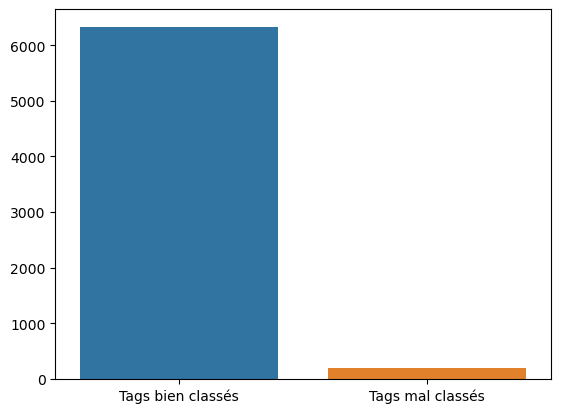

In [99]:
import seaborn as sns
sns.barplot(x=a, y=b)

In [100]:
for value in range(9):
    data=ana[(ana["refListId_actual"] == value) & (ana["pred_ana_bool"] == True)]
    data2=ana[ana["refListId_actual"] == value]
    print(data.shape[0]/data2.shape[0])

0.9826923076923076
0.9970059880239521
0.9624542124542125
0.9673202614379085
0.9797687861271677
0.9766505636070854
0.979874213836478
0.9707602339181286
0.9460093896713615


In [101]:
ana['run']= ana['reflist_run_id'].apply(lambda x:x.split('_')[1]).astype('int64')

In [102]:
ong = ana.drop('reflist_run_id', axis=1)  # Supprimer la colonne 'reflist_run_id'
ong_filtered = ong[ong["pred_ana_bool"] == True]  # Filtrer les lignes où "pred_ana_bool" est True
grp1 = ong_filtered.groupby(['run', 'refListId_actual'])  # Groupement par 'run' et 'refListId_actual'
grp1.sum()  # Calcul de la somme pour chaque groupe
#grp1.sum().to_excel("xcel.xlsx",sheet_name="f")

Epc  \
run refListId_actual                                                      
2   0                 epc_100epc_101epc_102epc_103epc_104epc_105epc_...   
    1                 epc_138epc_139epc_140epc_141epc_142epc_143epc_...   
    2                 epc_148epc_149epc_151epc_152epc_153epc_155epc_...   
    3                 epc_182epc_183epc_184epc_185epc_187epc_188epc_...   
    4                 epc_80epc_81epc_82epc_83epc_84epc_85epc_87epc_...   
...                                                                 ...   
39  5                 epc_0epc_1epc_10epc_12epc_13epc_14epc_16epc_17...   
    6                 epc_106epc_107epc_108epc_109epc_110epc_111epc_...   
    7                 epc_192epc_193epc_194epc_195epc_196epc_197epc_...   
    8                 epc_40epc_41epc_42epc_43epc_44epc_45epc_46epc_...   
    9                 epc_130epc_131epc_132epc_133epc_134epc_135epc_...   

                                                            slice_id_IN  \
run refListId_actual                                                      
2   0                 mid_0mid_0mid_0mid_0mid_0mid_0mid_0mid_0mid_0m...   
    1                  mid_0mid_0up_1mid_0mid_0up_1mid_0mid_0mid_0mid_0   
    2                 up_1mid_0mid_0mid_0mid_0up_1up_1mid_0mid_0up_1...   
    3                            up_2mid_0up_2up_2up_2up_2up_2up_2mid_0   
    4                     mid_0mid_0mid_0mid_0mid_0mid_0mid_0mid_1mid_0   
...                                                                 ...   
39  5                 mid_1up_2up_2up_2up_2up_2up_2up_2up_2up_2up_2u...   
    6                 up_1mid_0up_1mid_0mid_0mid_0mid_0mid_0mid_0mid...   
    7                   mid_0mid_0mid_0up_1mid_0mid_0mid_0up_1up_1mid_0   
    8                 mid_0mid_0mid_0mid_0mid_0mid_0mid_1mid_0mid_0m...   
    9                            up_1mid_0up_1mid_0mid_0mid_0mid_0mid_0   

                       in_IN  out_IN  order_IN  \
run refListId_actual                             
2   0                 -836.0 -1315.0        46   
    1                 -576.0  -862.0        26   
    2                -1760.0 -2956.0        84   
    3                 -539.0  -850.0        20   
    4                 -427.0  -746.0        28   
...                      ...     ...       ...   
39  5                -1685.0 -2911.0        68   
    6                -1213.0 -2026.0        62   
    7                 -547.0  -958.0        24   
    8                -2116.0 -3275.0       115   
    9                 -474.0  -739.0        20   

                                                           slice_id_OUT  \
run refListId_actual                                                      
2   0                 up_1up_1up_1up_1up_1up_1up_1up_1up_1up_1up_1up...   
    1                          up_1up_1up_0up_1up_1up_0up_1up_1up_1up_1   
    2                 up_0up_1up_1up_1up_1up_0up_0up_1up_1up_0up_1up...   
    3                              up_0up_0up_0up_0up_0up_0up_0up_0up_2   
    4                              up_1up_1up_1up_1up_1up_1up_1up_1up_1   
...                                                                 ...   
39  5                 up_1up_1up_1up_1up_1up_1up_1up_1up_1up_1up_1up...   
    6                 up_0up_1up_0up_1up_1up_1up_1up_1up_1up_1up_0up...   
    7                          up_1up_1up_1up_0up_0up_1up_1up_0up_0up_1   
    8                 up_1up_1up_1up_1up_1up_1mid_0up_1up_1up_1mid_0...   
    9                                  up_0up_1up_0up_1up_1up_1up_1up_1   

                      in_OUT  out_OUT  order_OUT  Q refListId_actual  \
run refListId_actual                                                   
2   0                -1181.0   -845.0         14                 256   
    1                 -880.0   -501.0          8                 100   
    2                -2561.0  -1744.0         21                1020   
    3                 -856.0   -523.0          2                  90   
    4                 -679.0   -425.0          9         

In [103]:
ong = ana.drop('reflist_run_id', axis=1)  # Supprimer la colonne 'reflist_run_id'
ong_filtered = ong  # Filtrer les lignes où "pred_ana_bool" est True
grp = ong_filtered.groupby(['run', 'refListId_actual'])['pred_ana_bool'].value_counts()\
  .unstack('pred_ana_bool',fill_value=0).reset_index(drop=False)
  # Renommer les colonnes
grp = grp[['run', 'refListId_actual', True, False]]
grp


pred_ana_bool  run  refListId_actual  True  False
0                2                 0    16      0
1                2                 1    10      0
2                2                 2    30      2
3                2                 3     9      0
4                2                 4     9      0
..             ...               ...   ...    ...
334             39                 5    32      0
335             39                 6    24      2
336             39                 7    10      0
337             39                 8    37      4
338             39                 9     8      0

[339 rows x 4 columns]

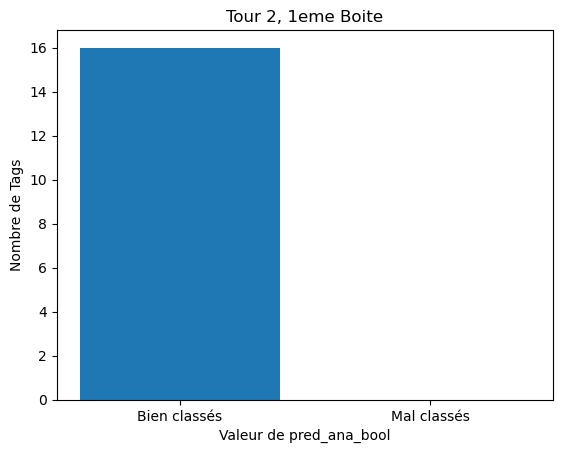

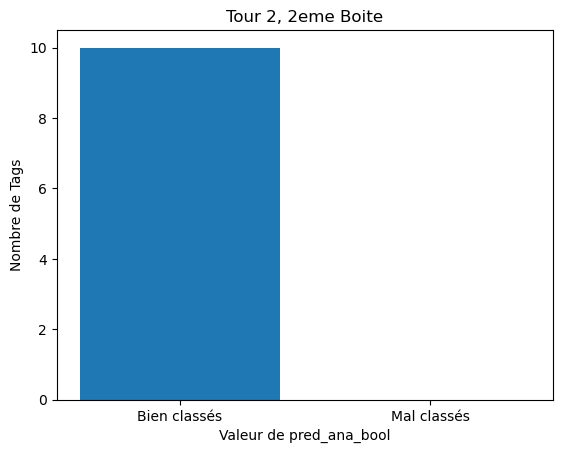

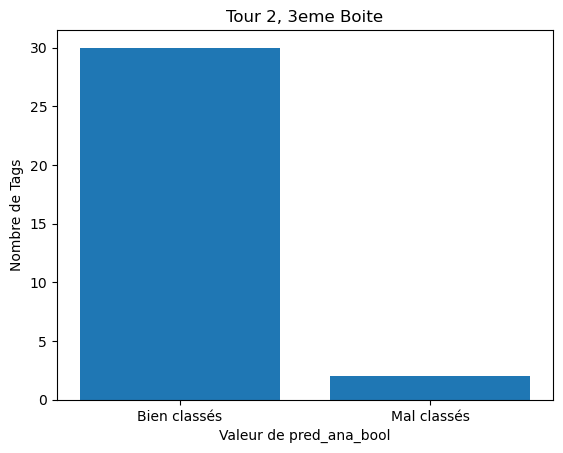

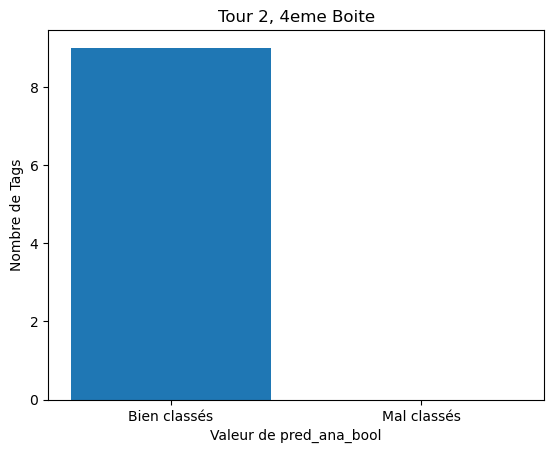

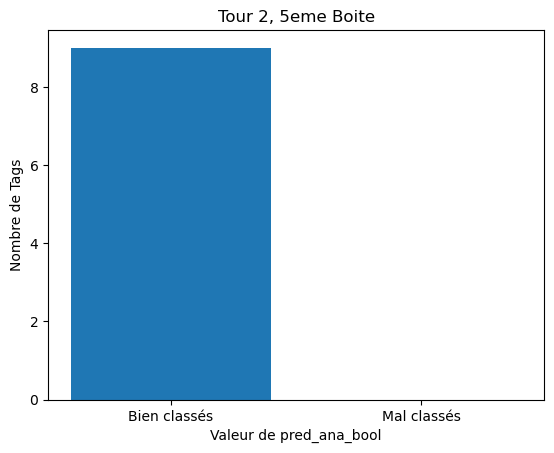

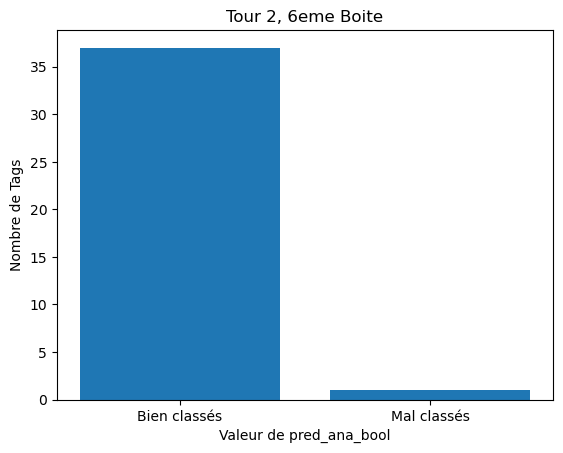

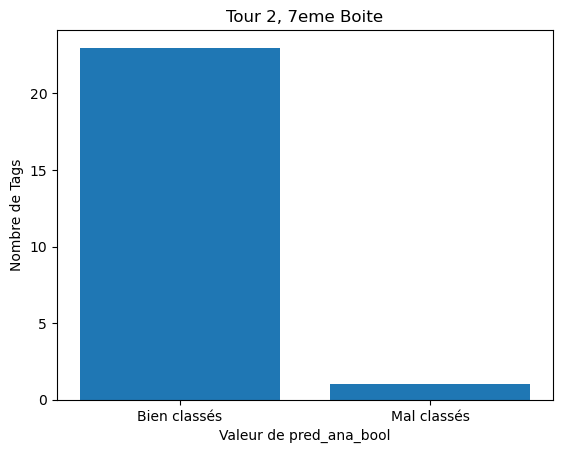

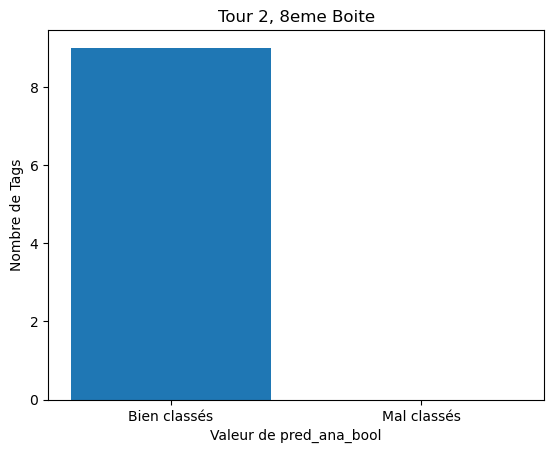

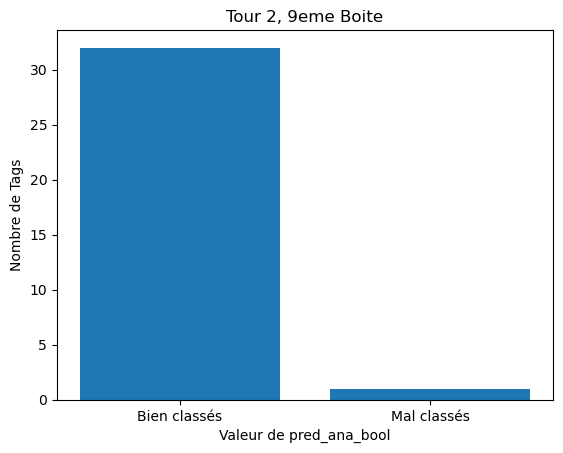

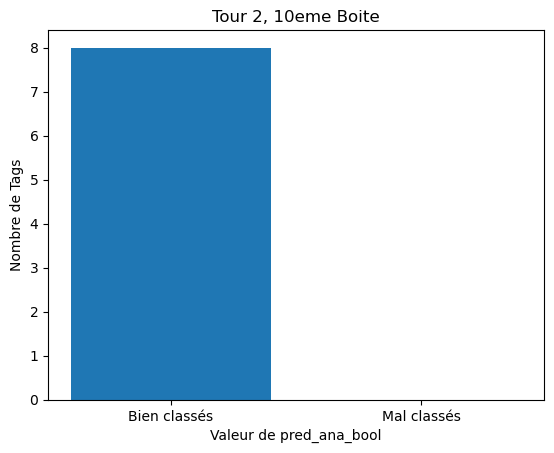

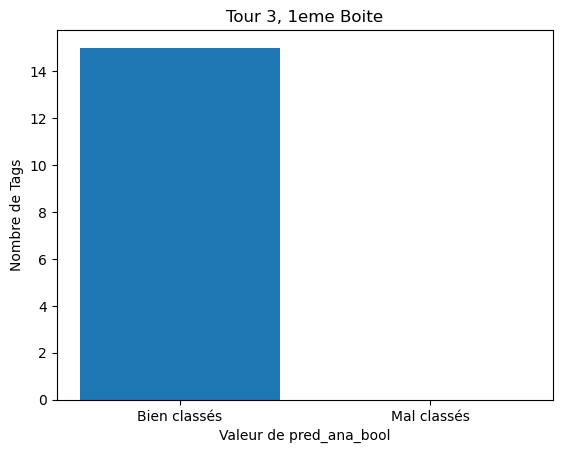

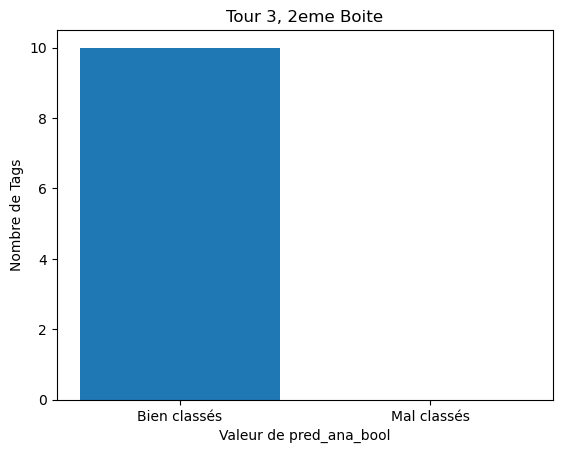

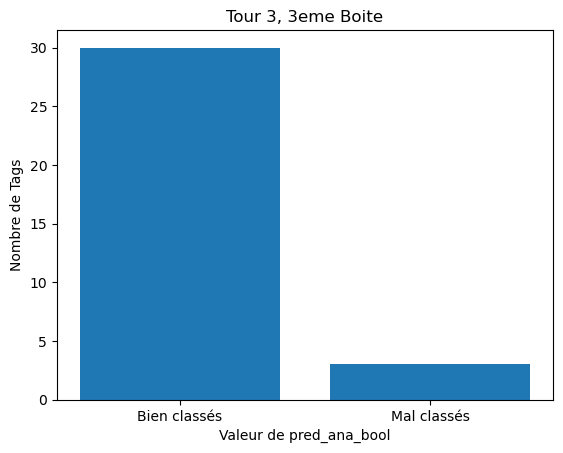

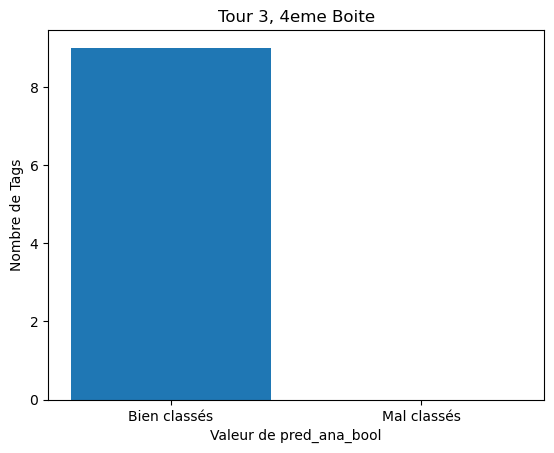

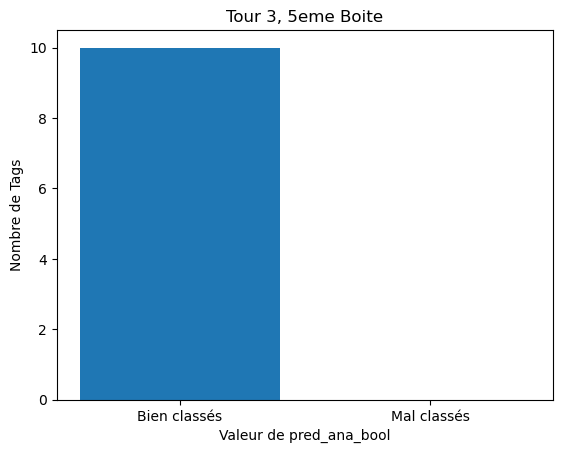

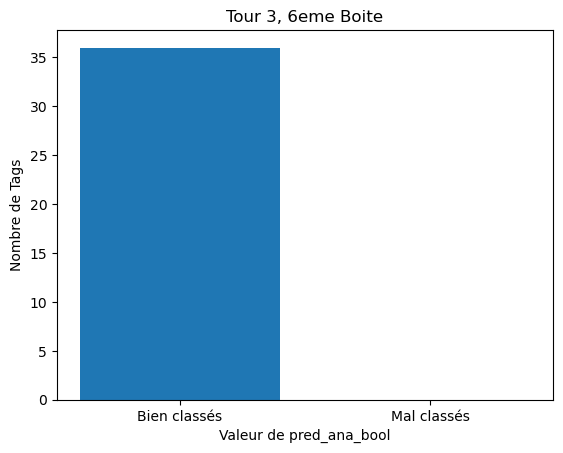

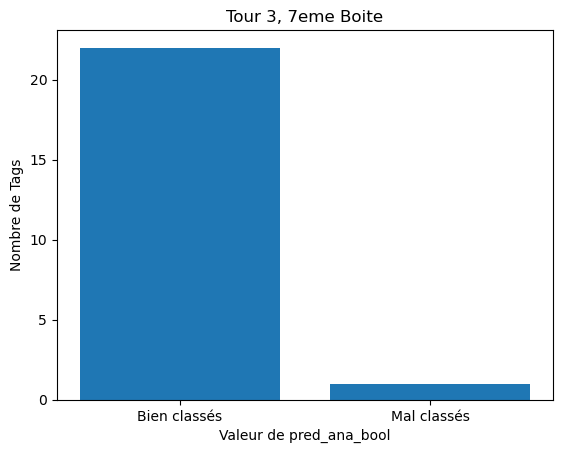

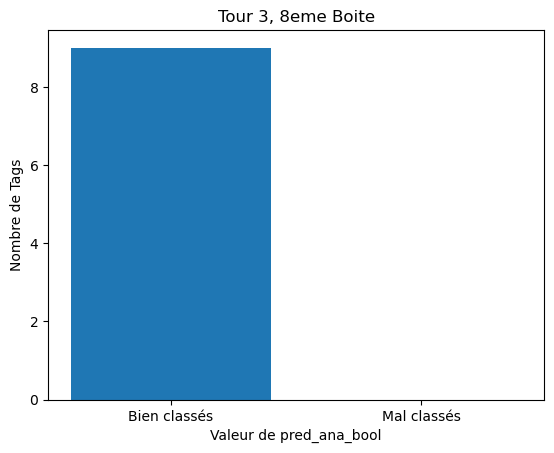

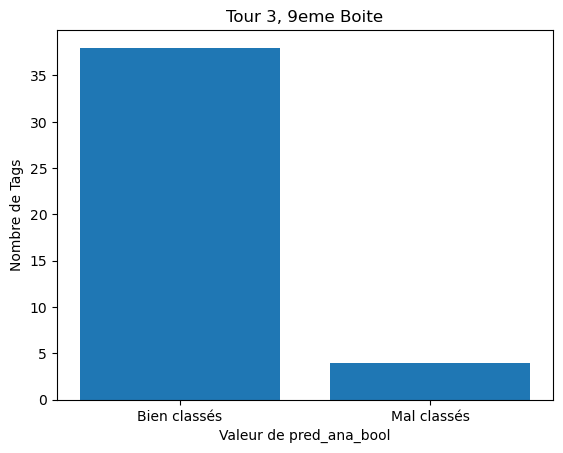

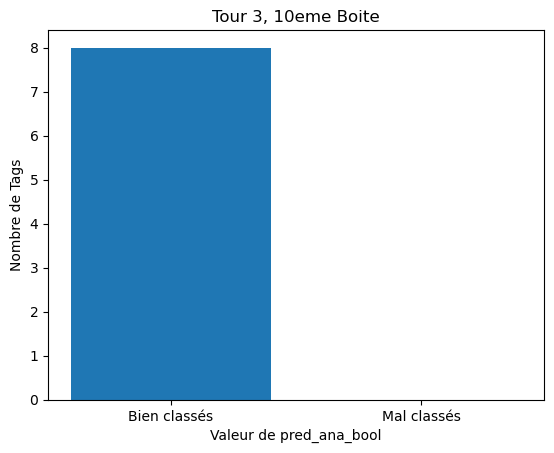

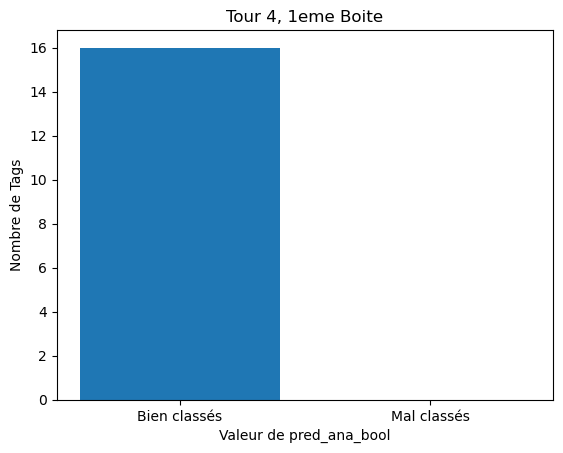

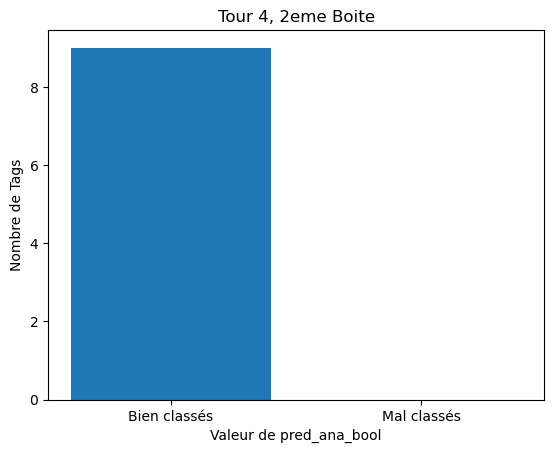

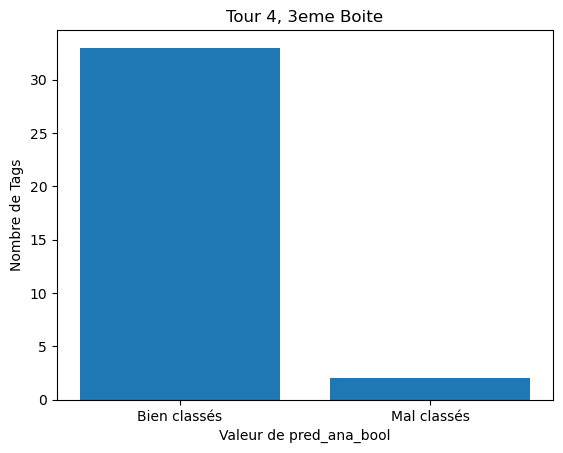

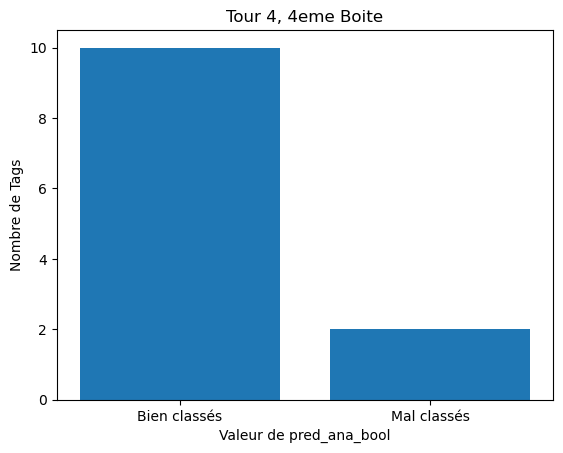

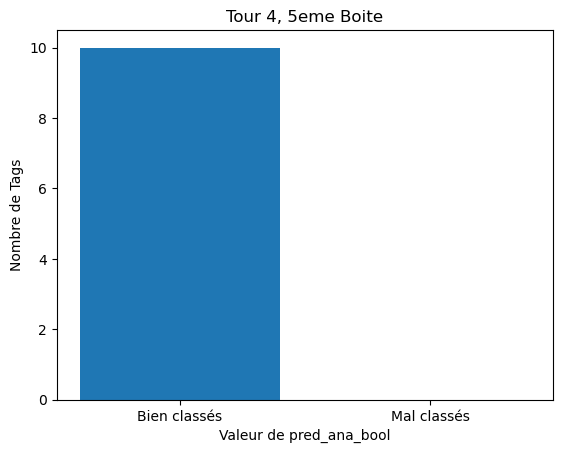

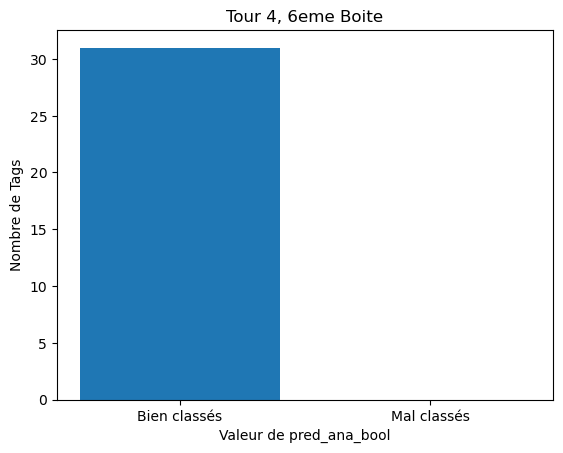

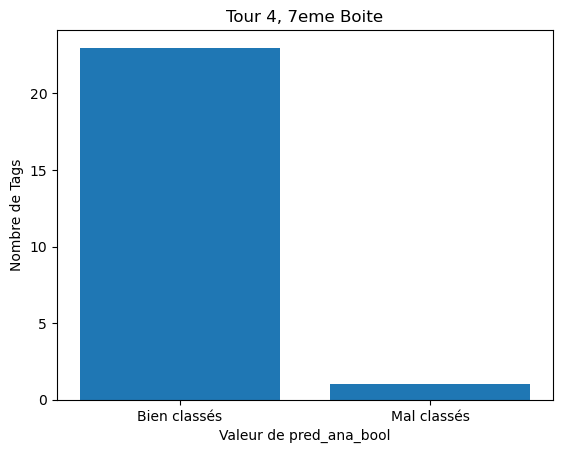

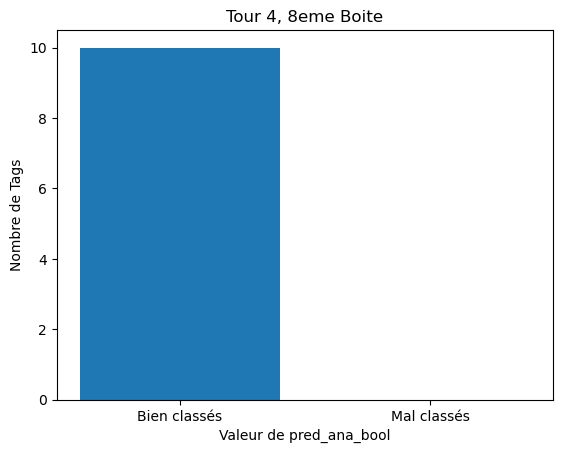

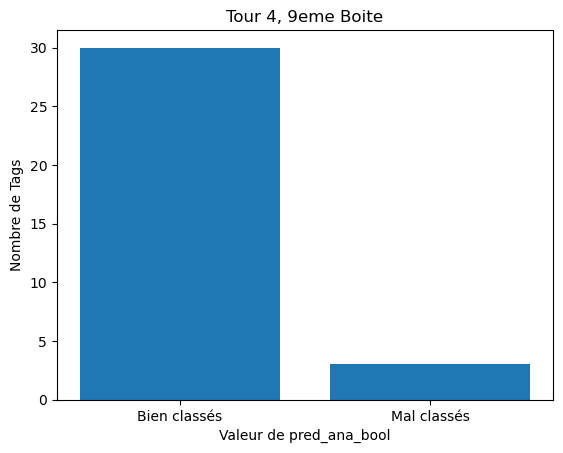

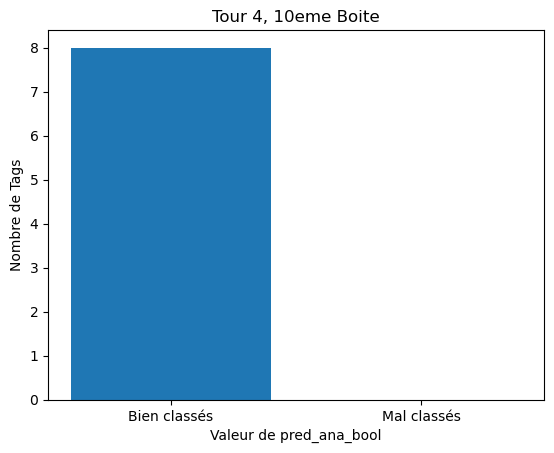

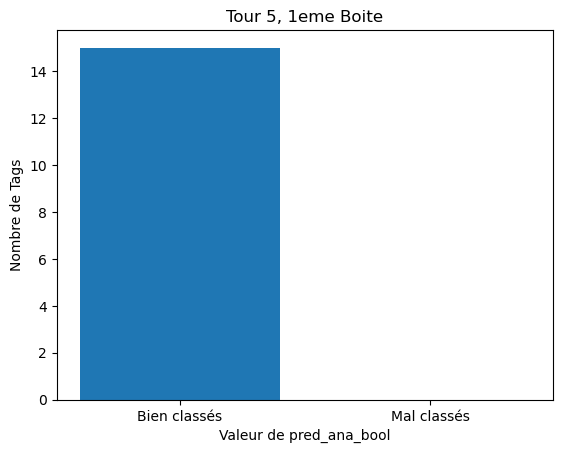

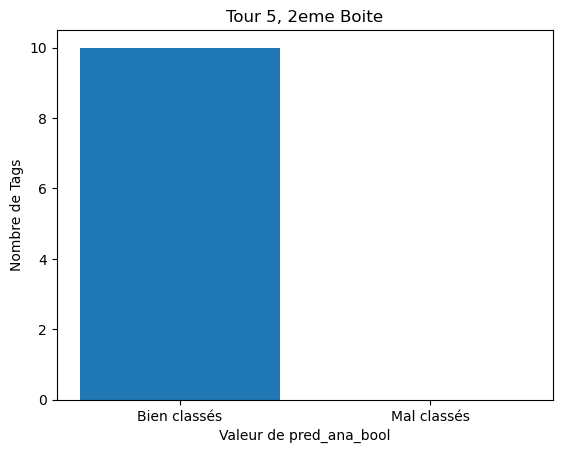

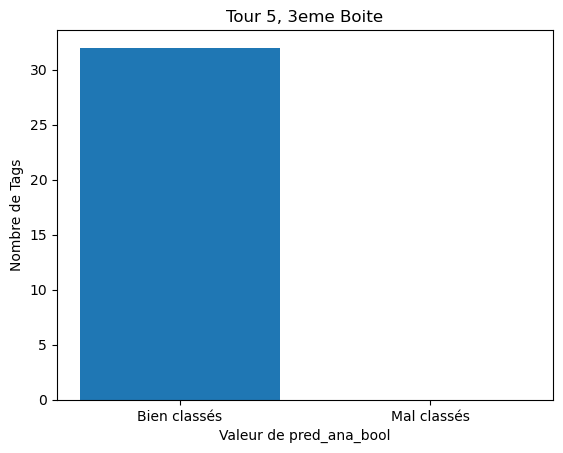

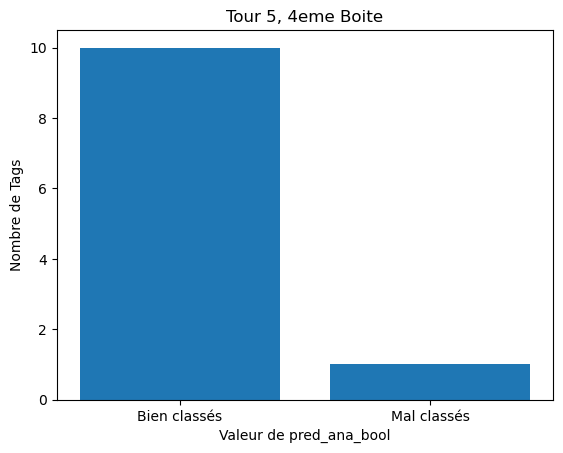

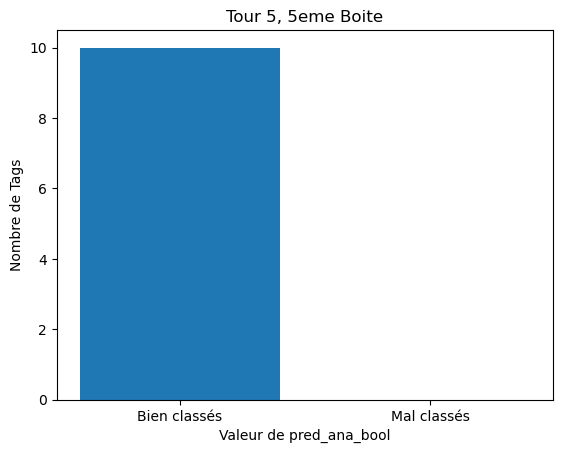

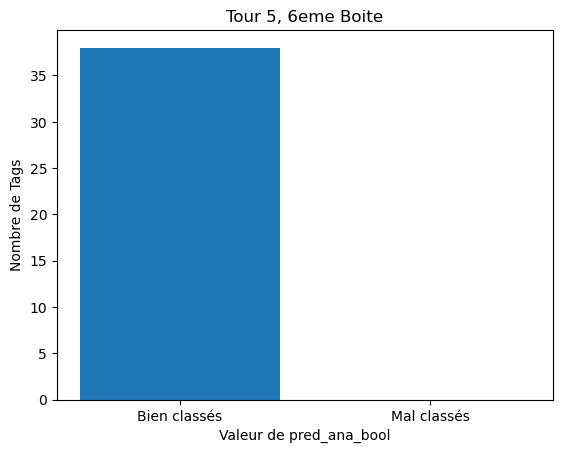

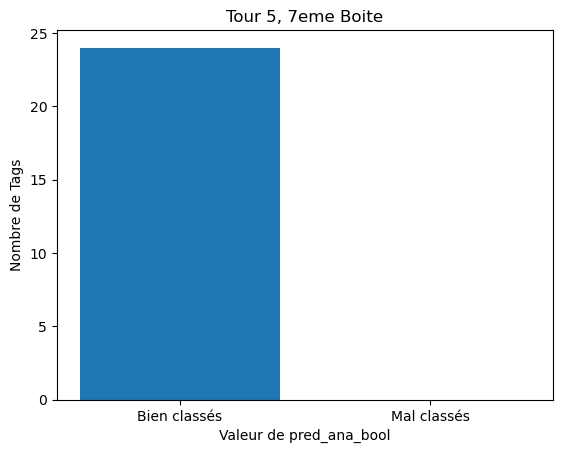

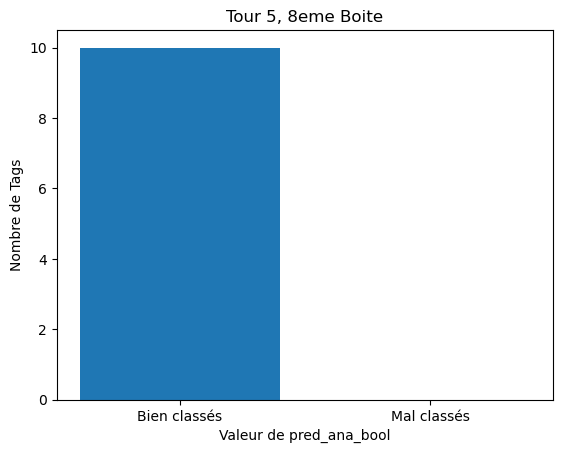

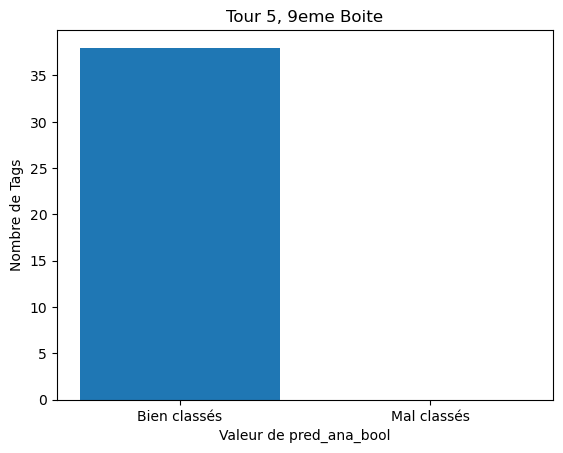

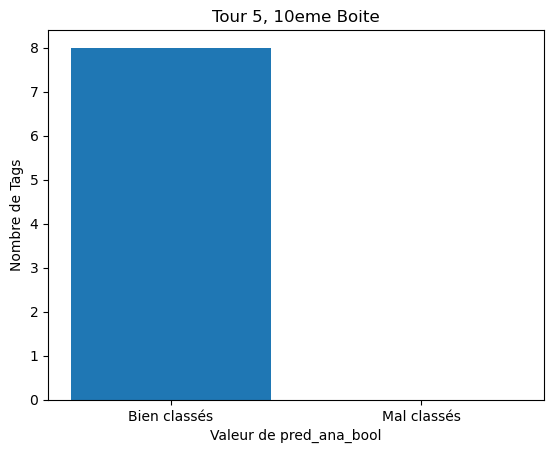

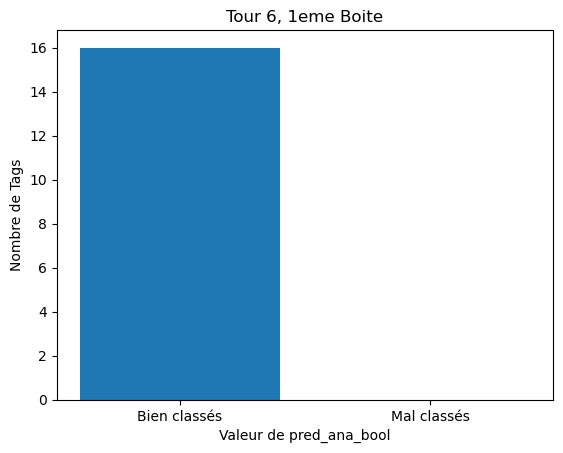

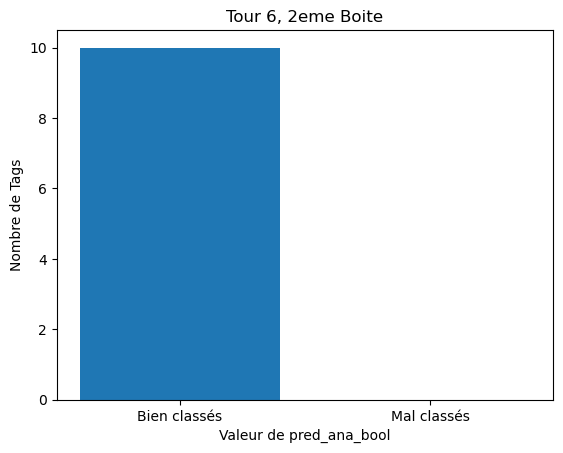

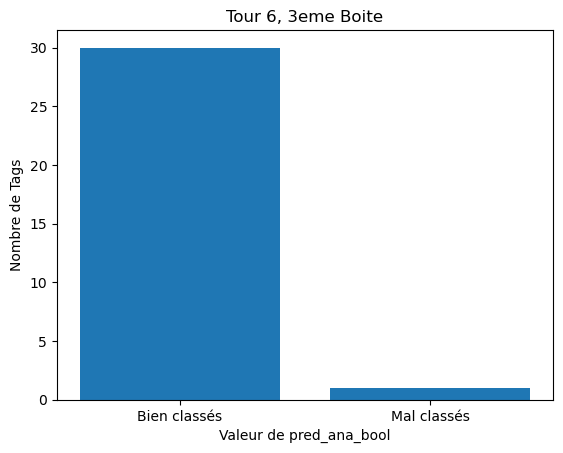

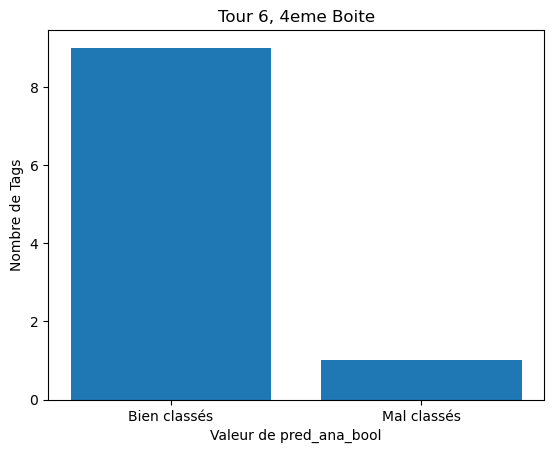

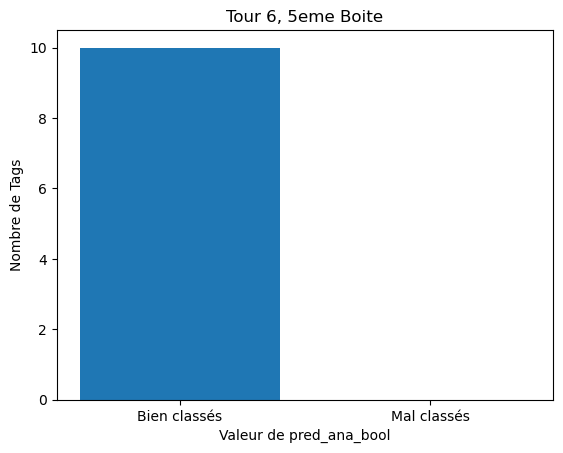

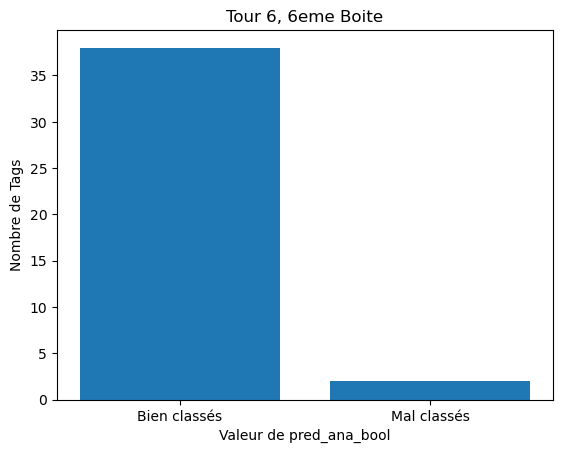

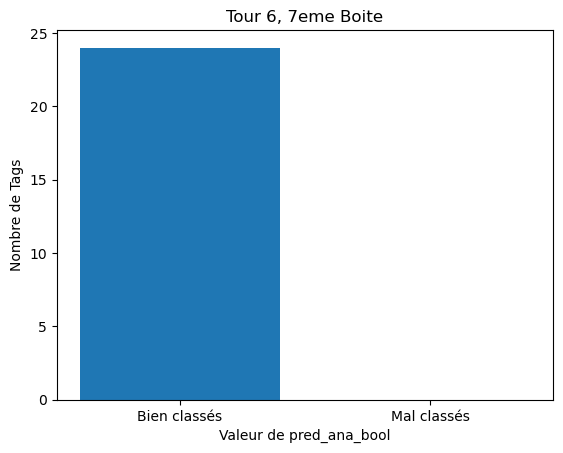

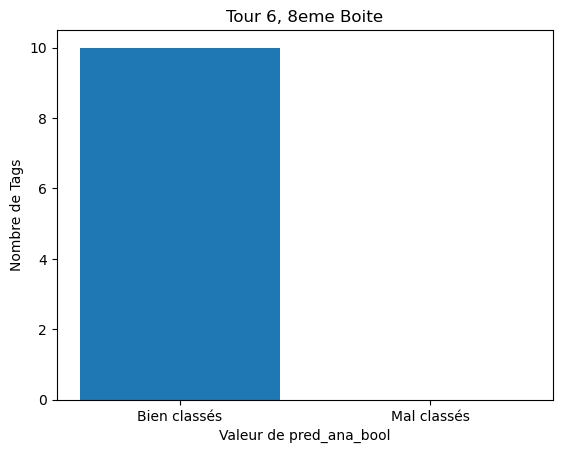

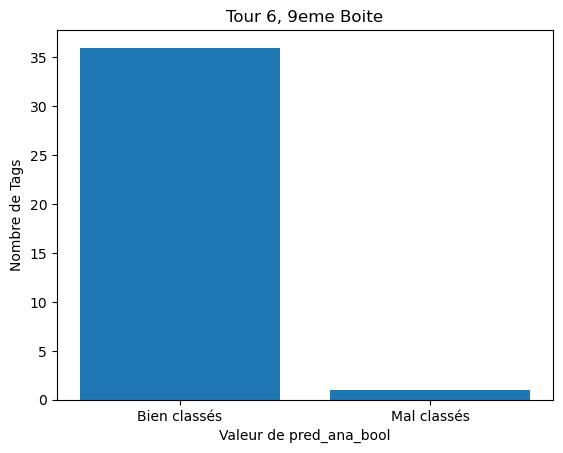

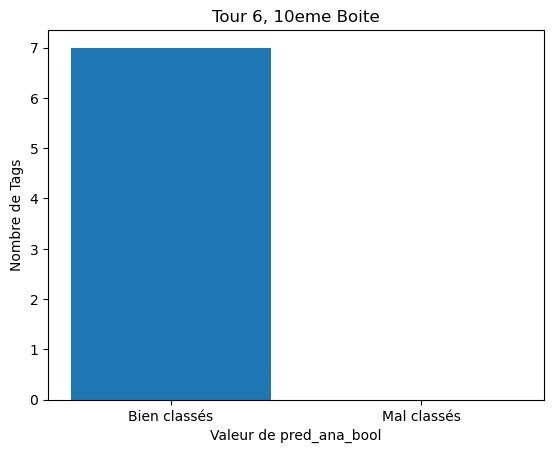

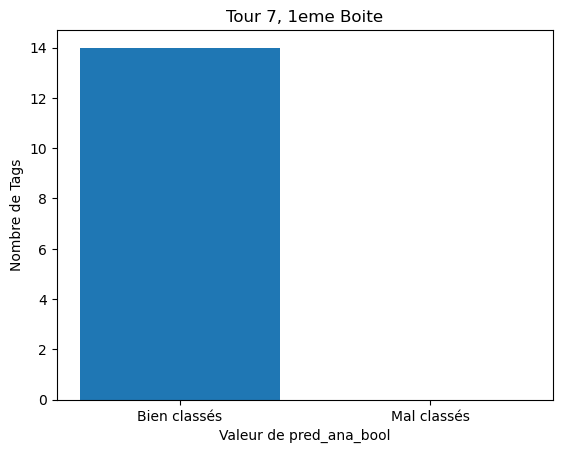

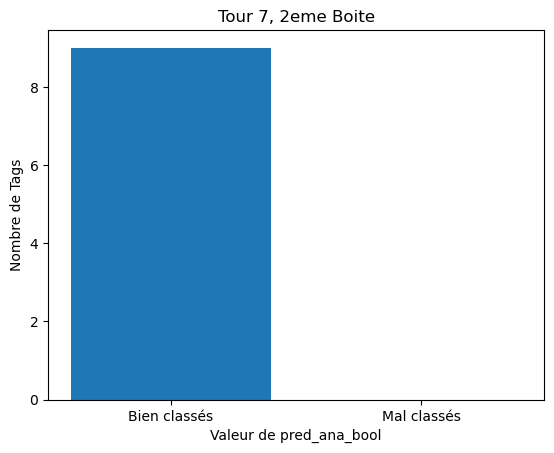

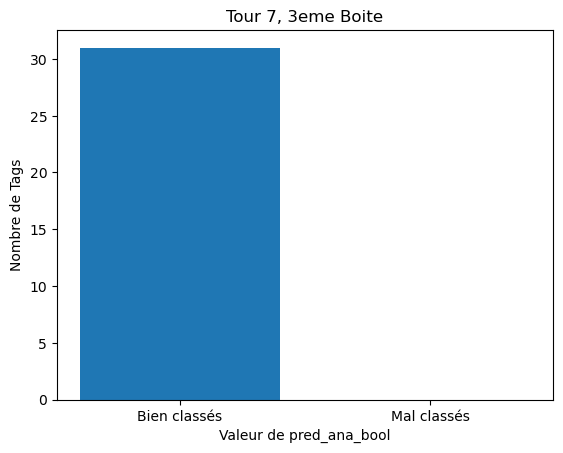

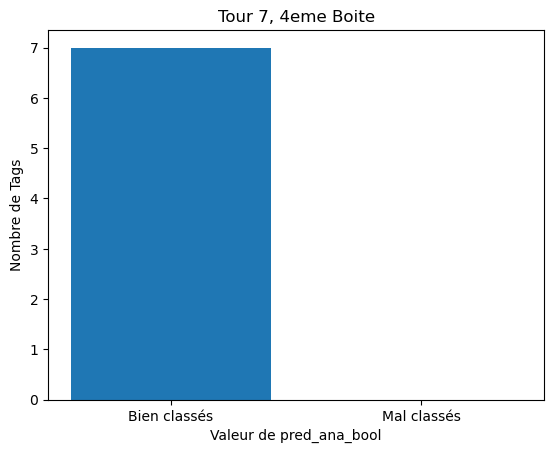

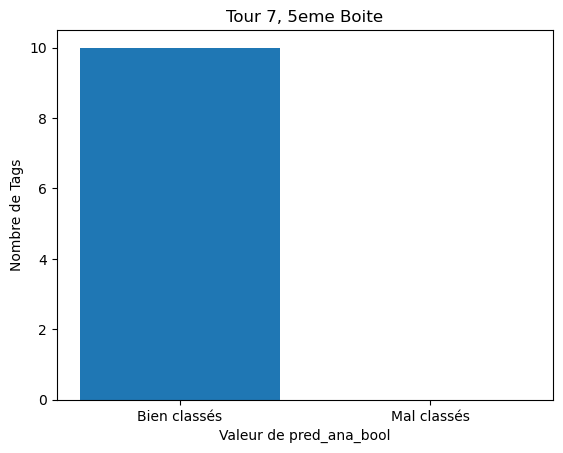

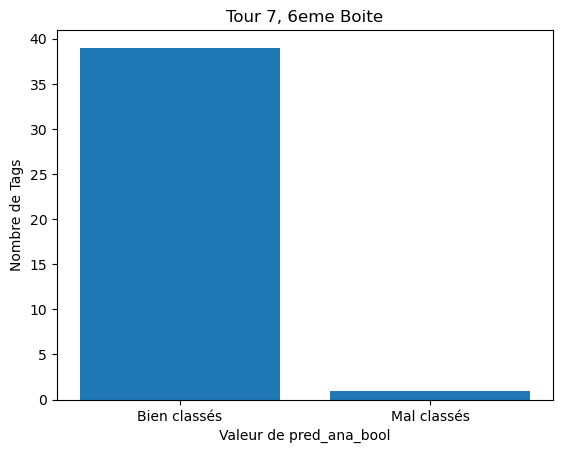

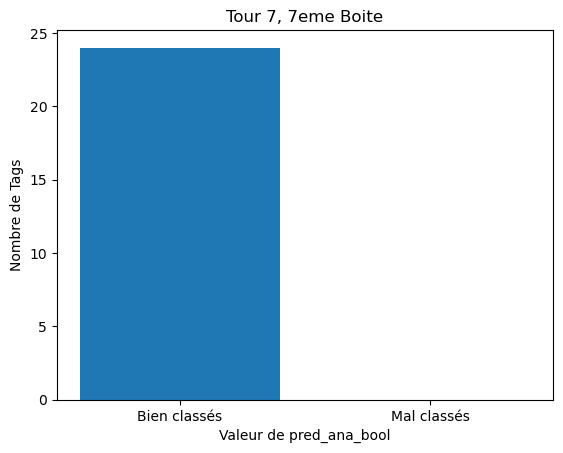

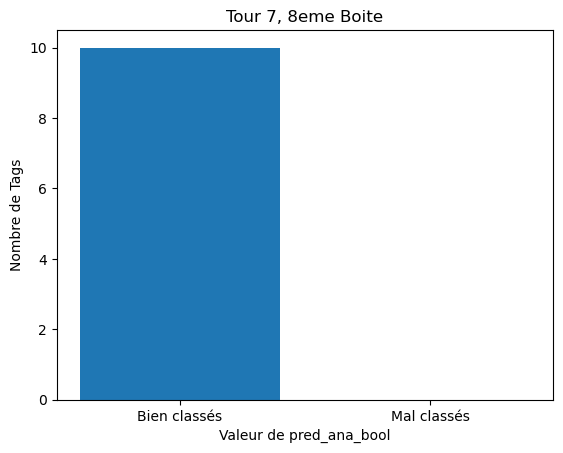

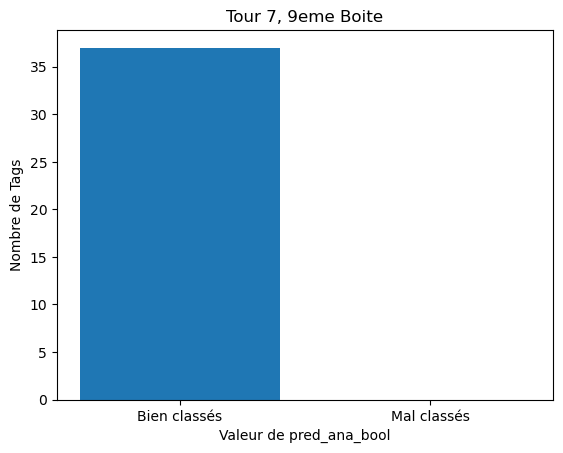

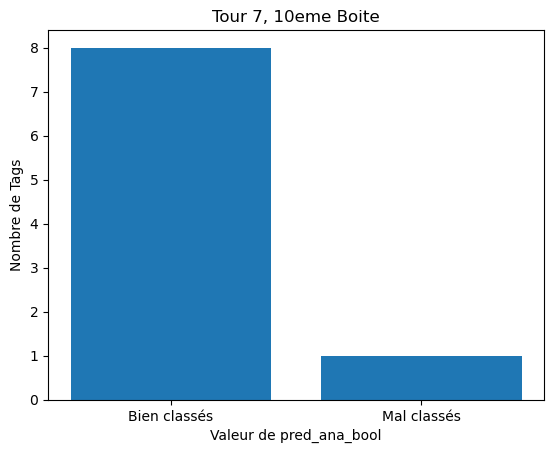

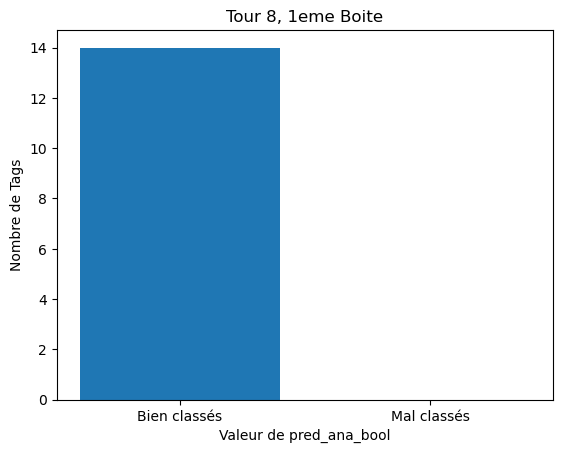

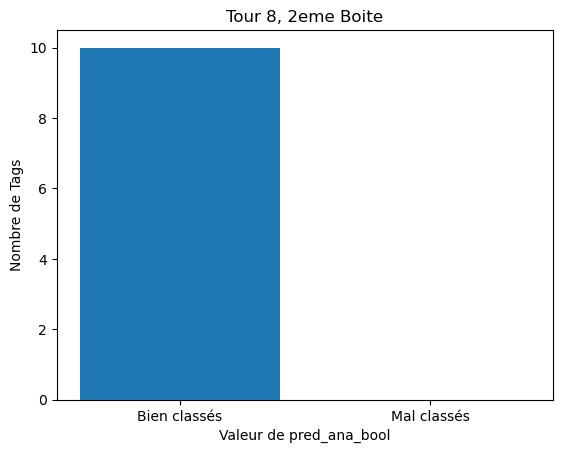

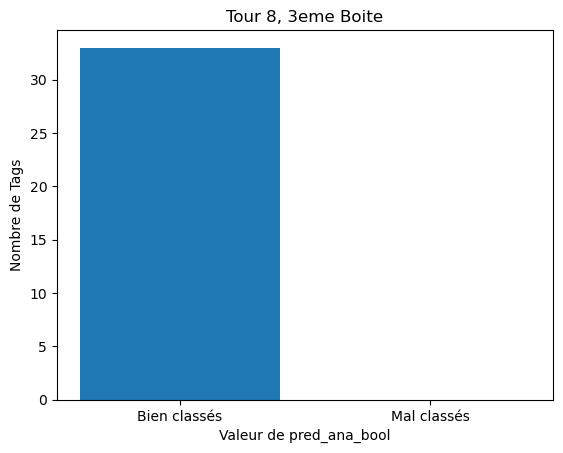

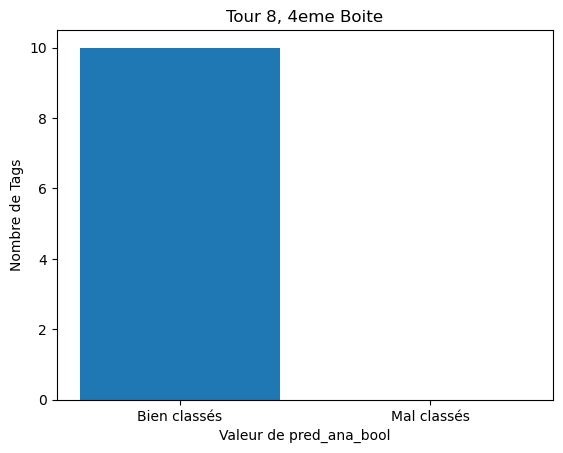

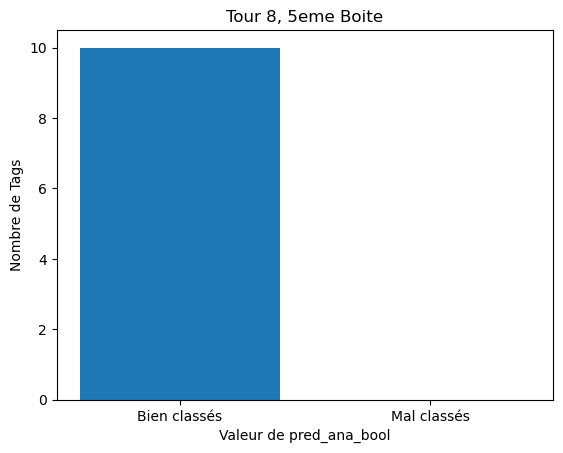

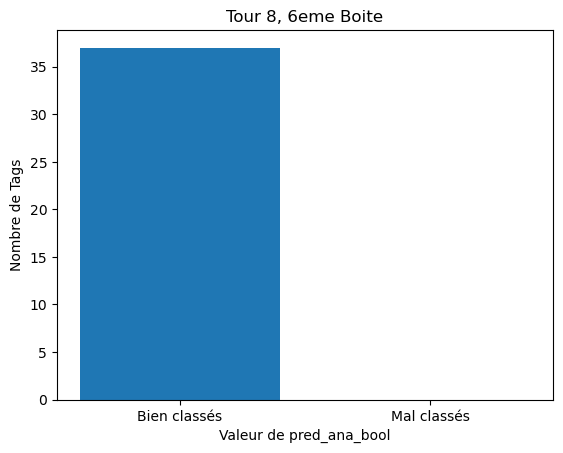

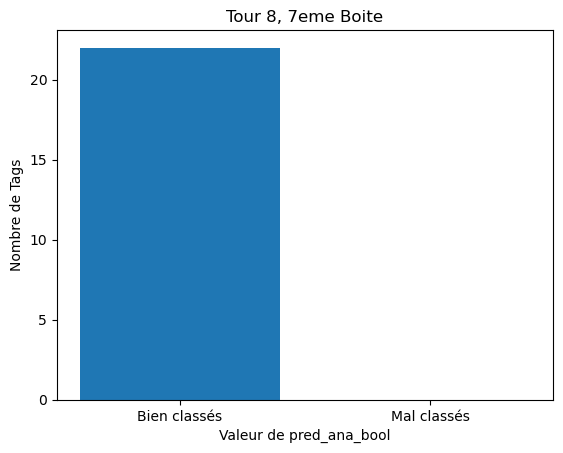

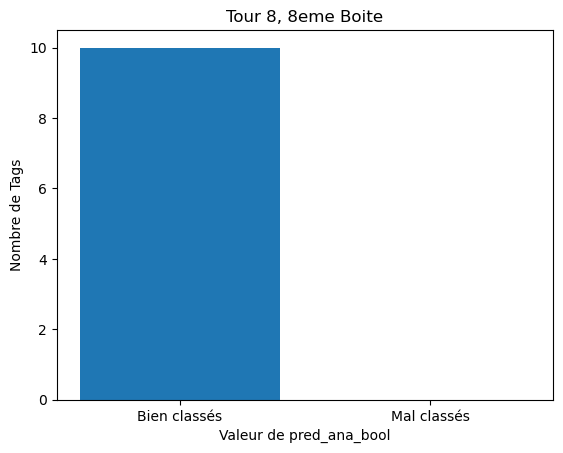

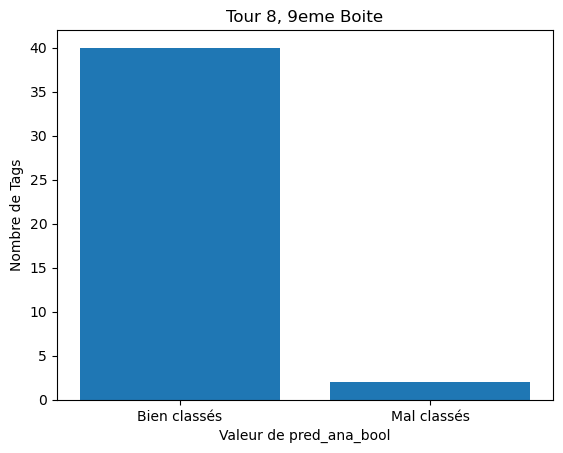

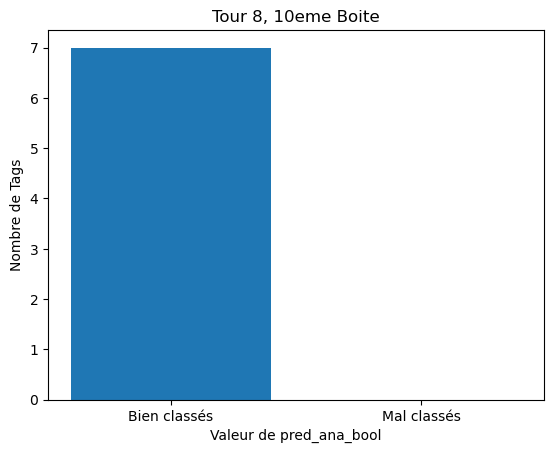

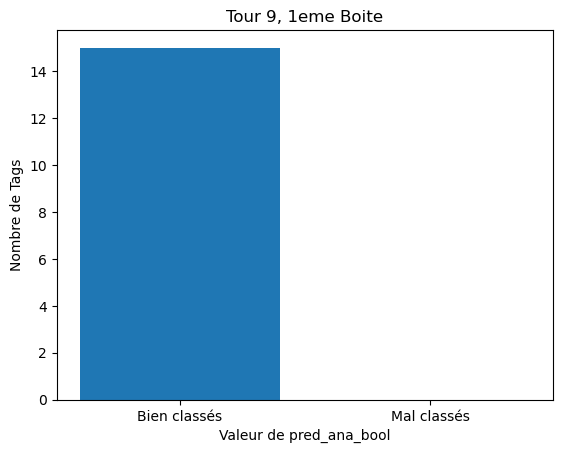

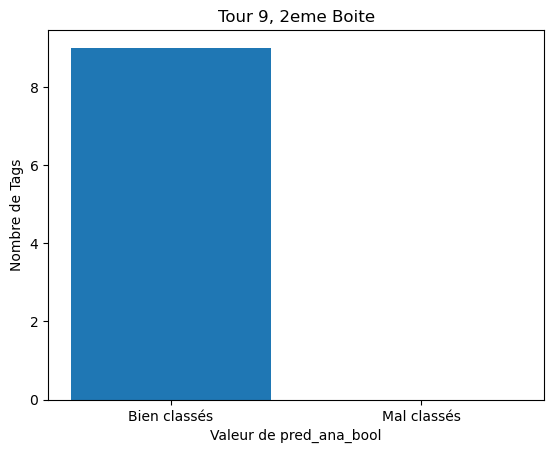

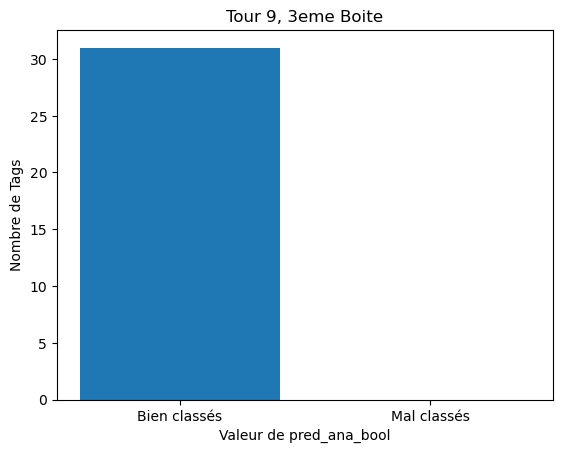

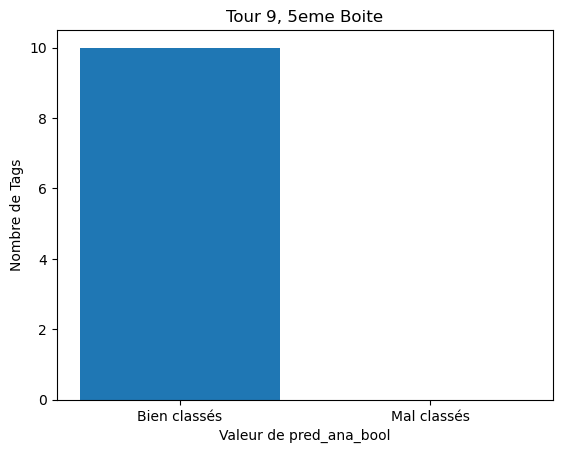

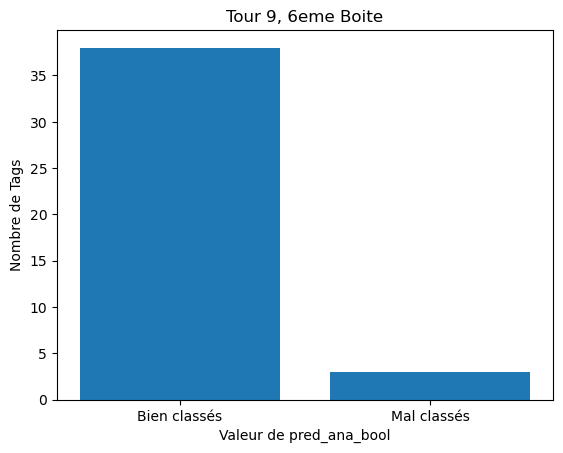

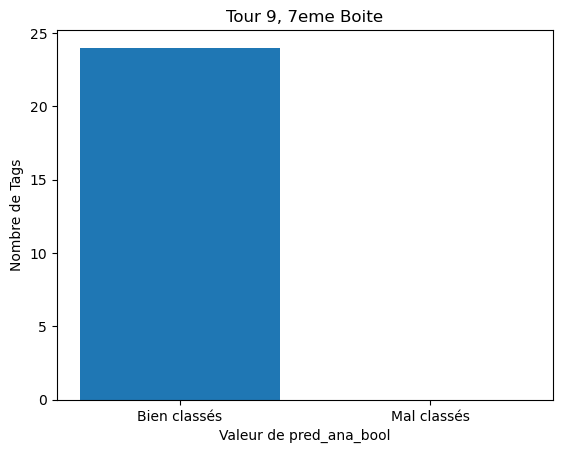

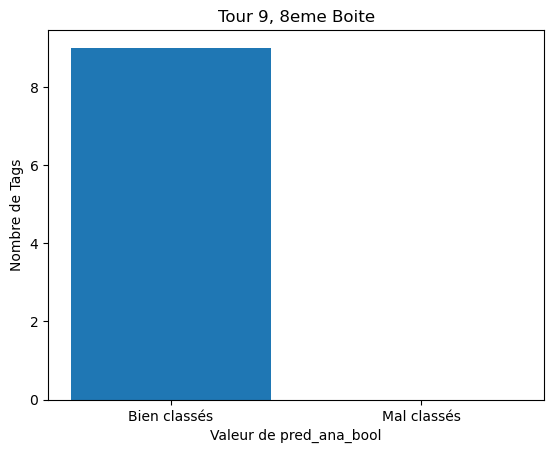

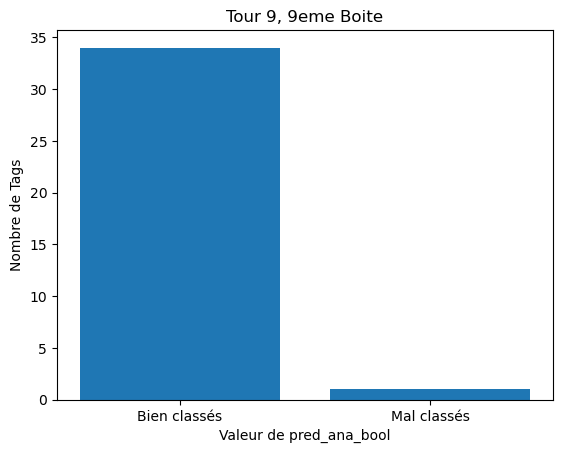

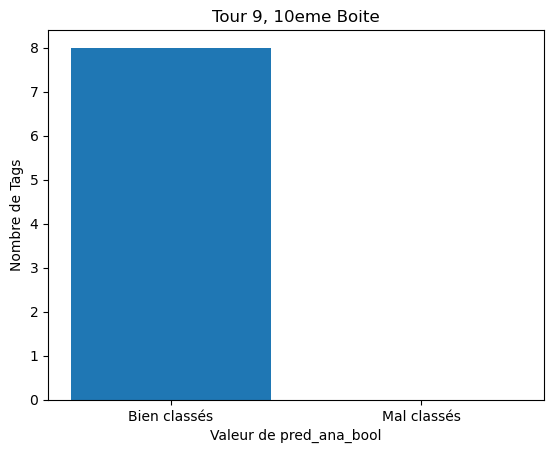

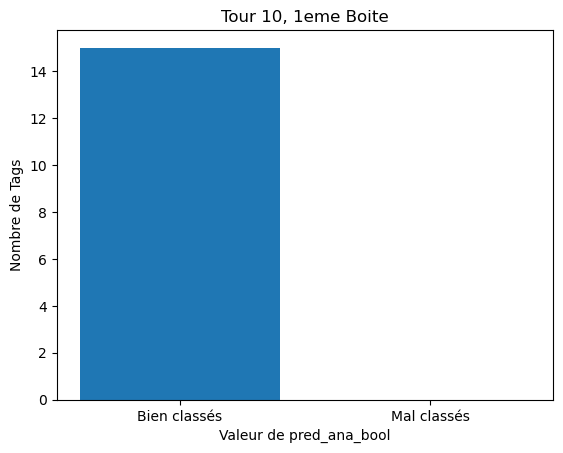

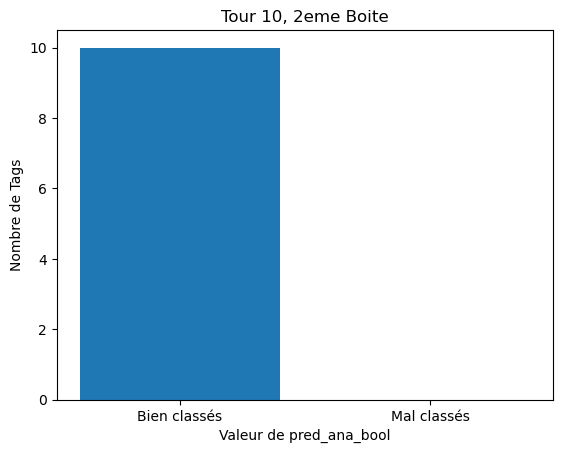

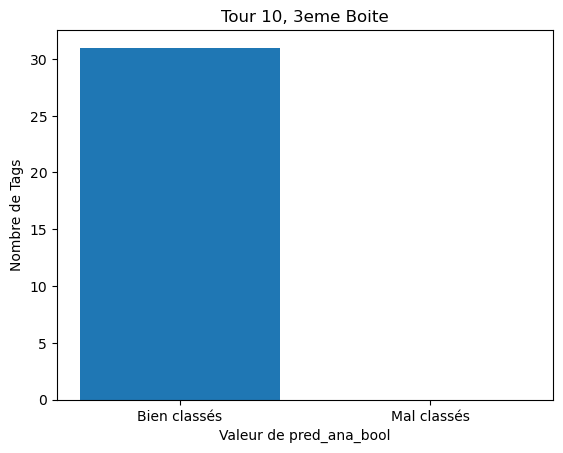

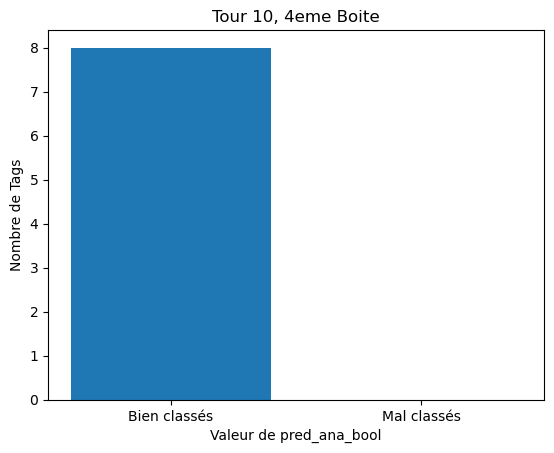

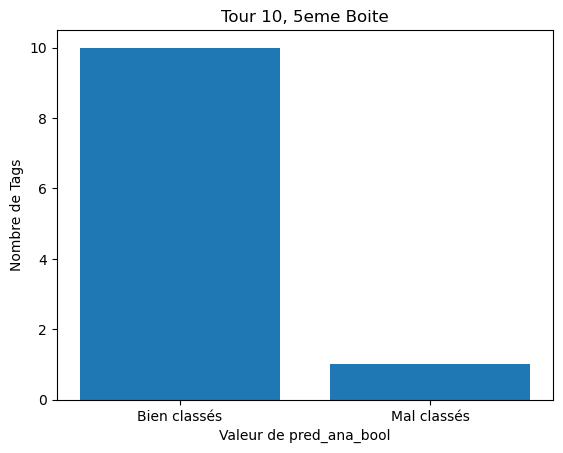

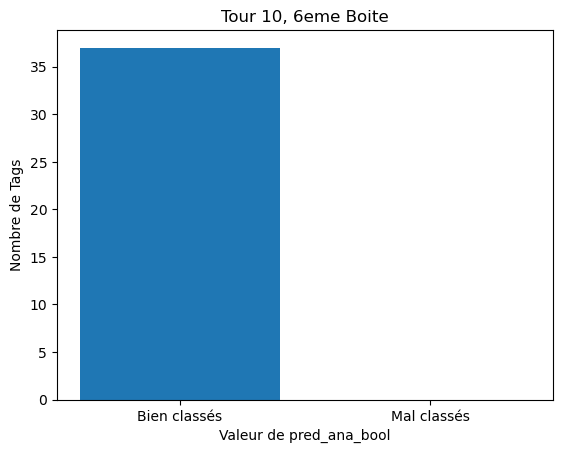

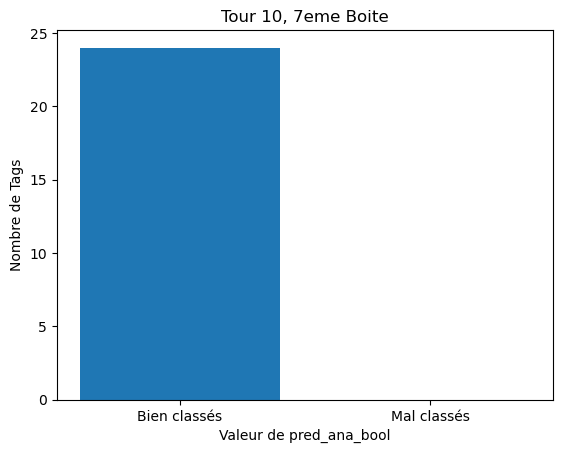

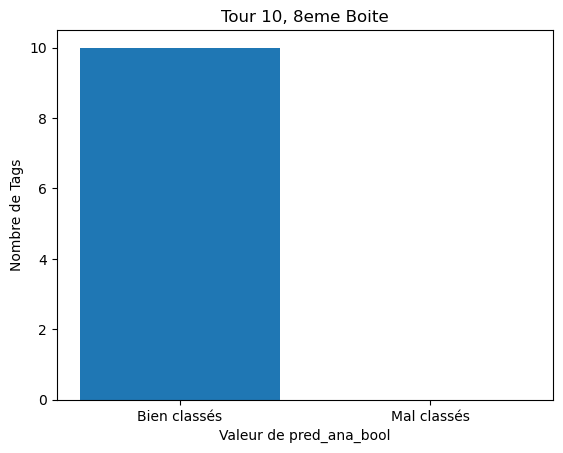

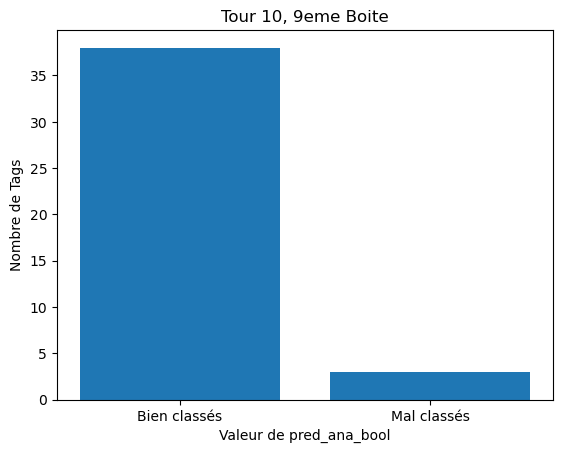

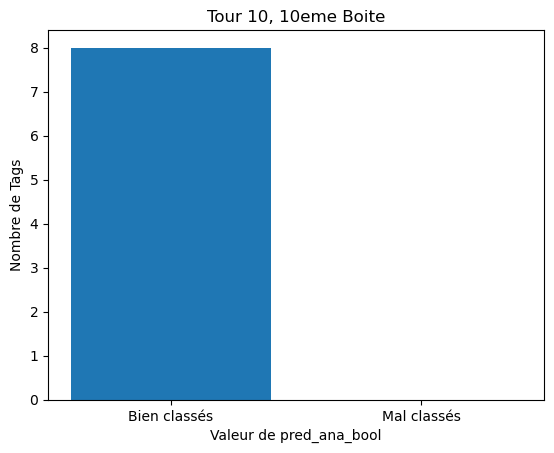

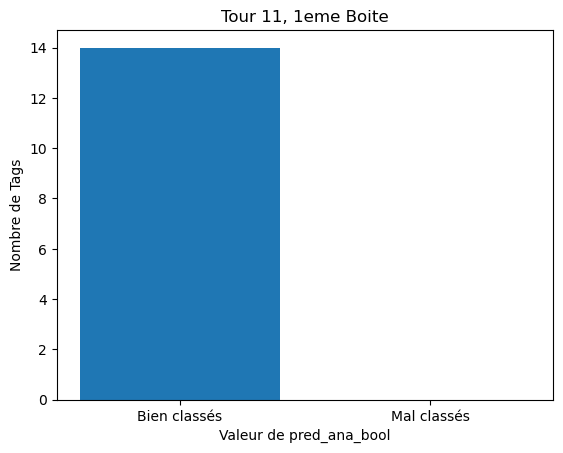

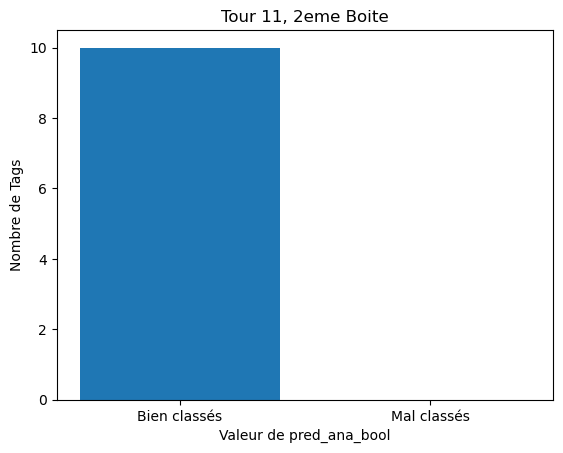

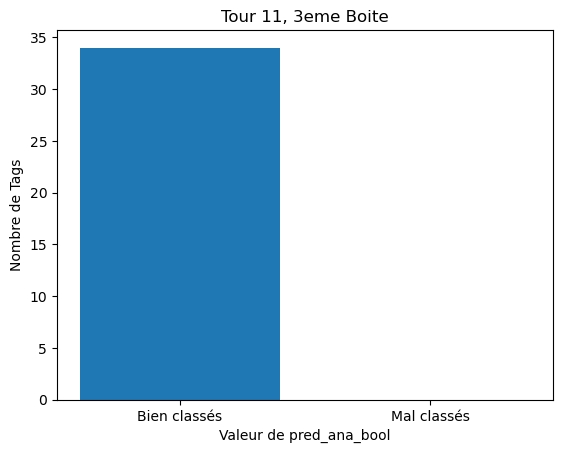

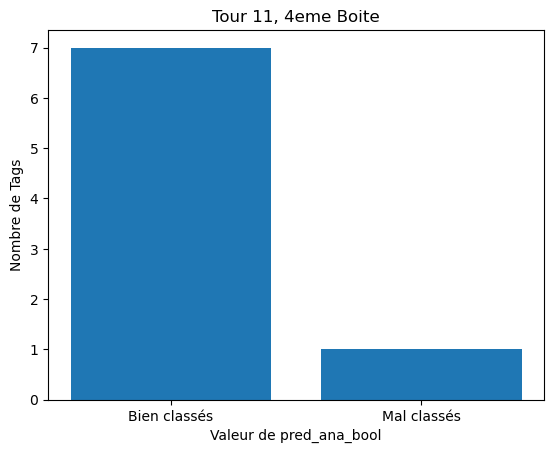

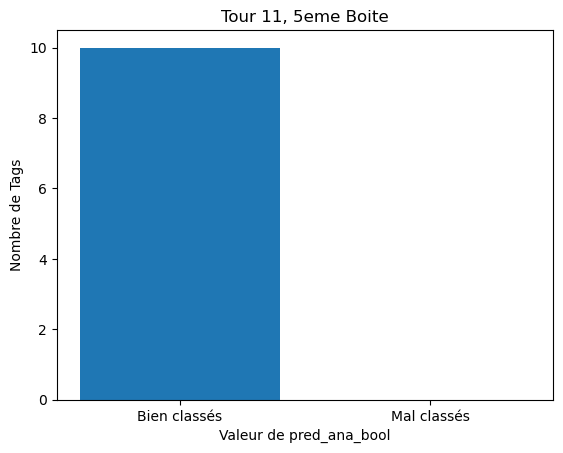

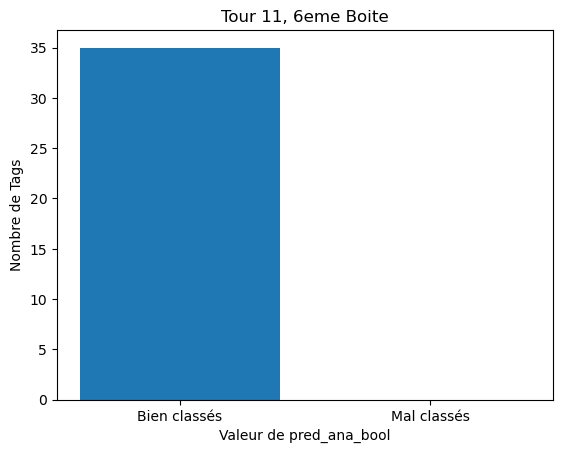

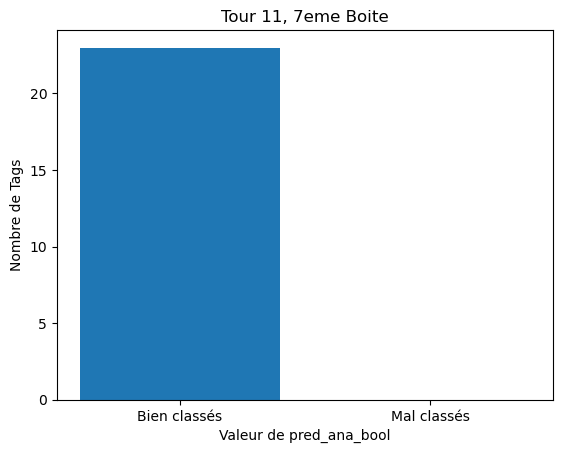

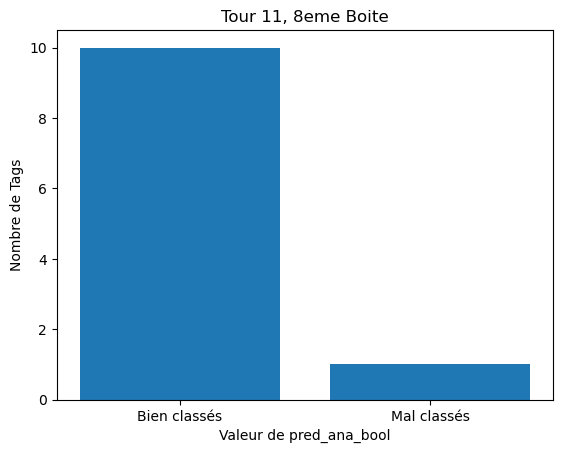

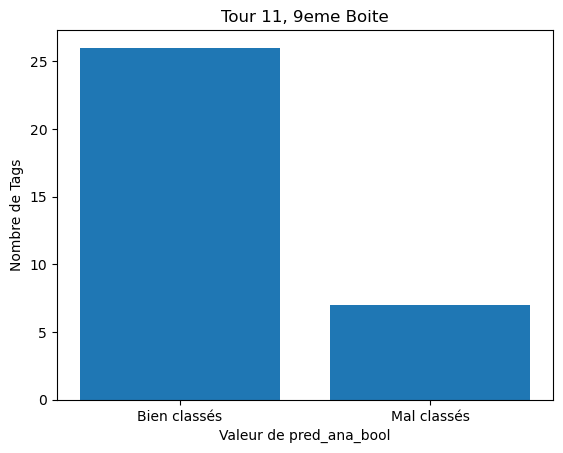

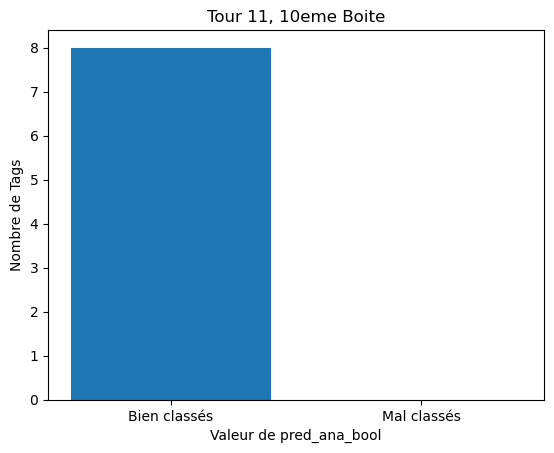

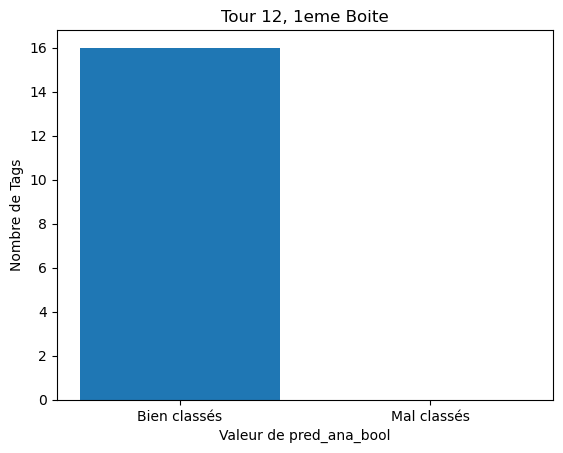

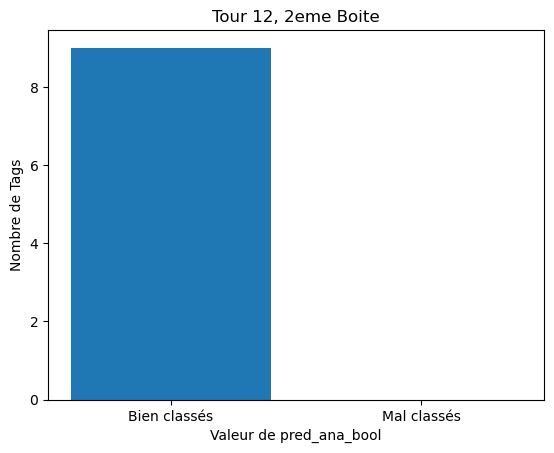

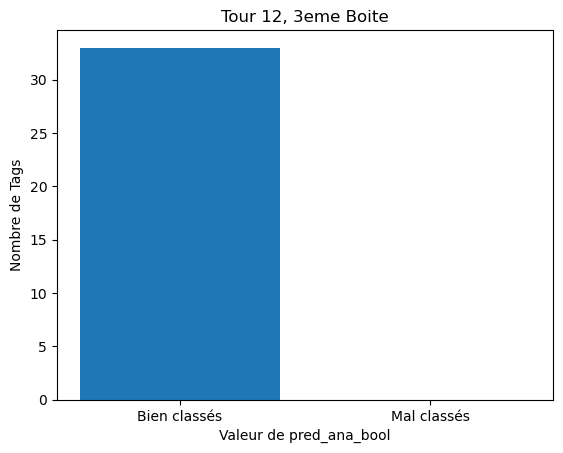

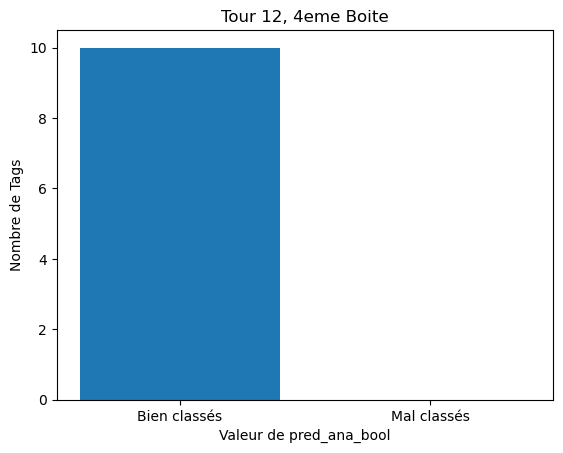

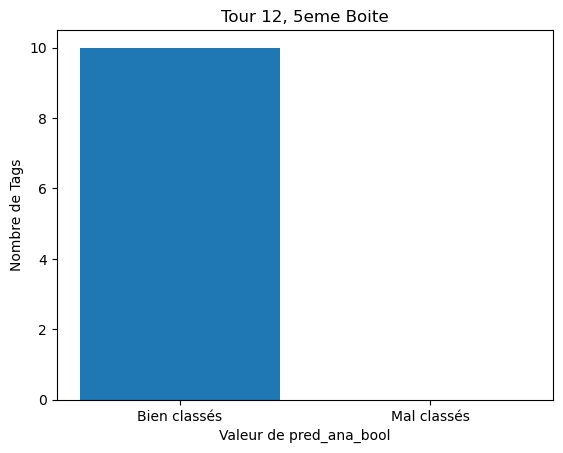

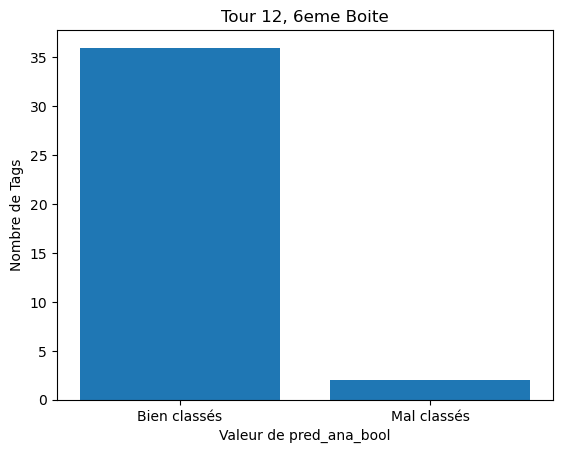

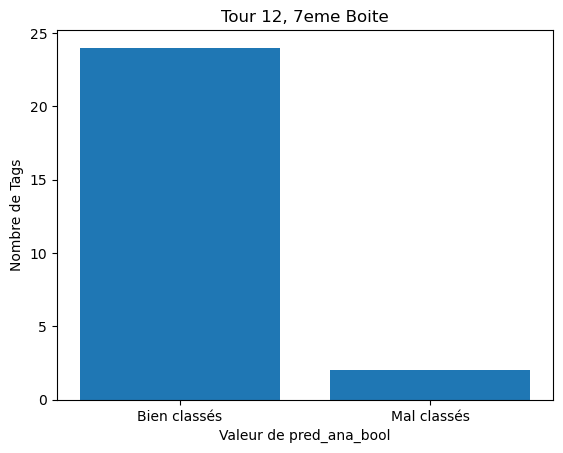

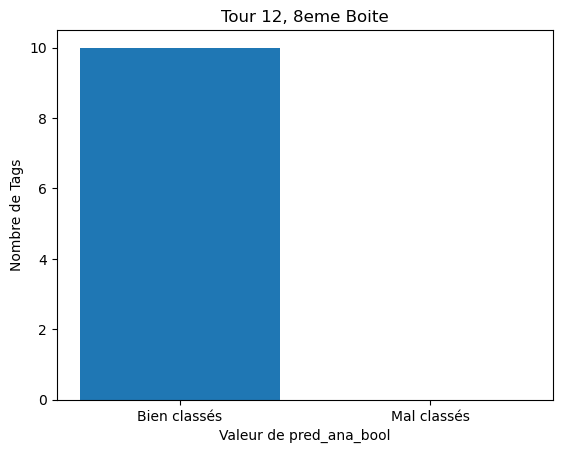

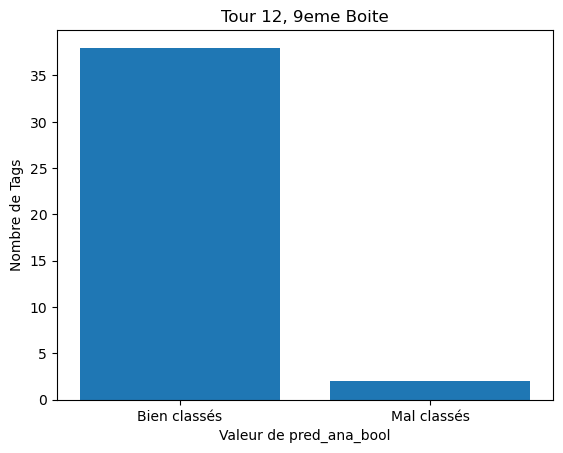

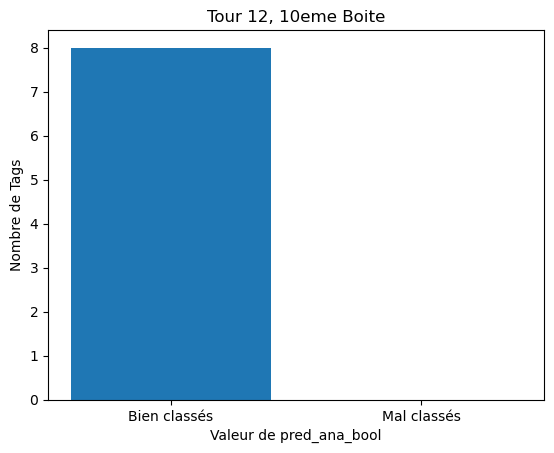

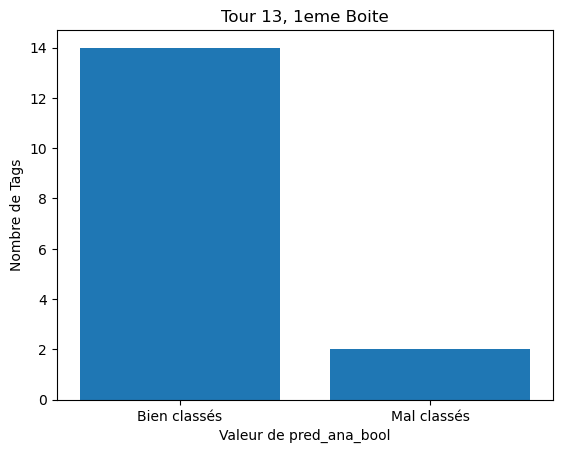

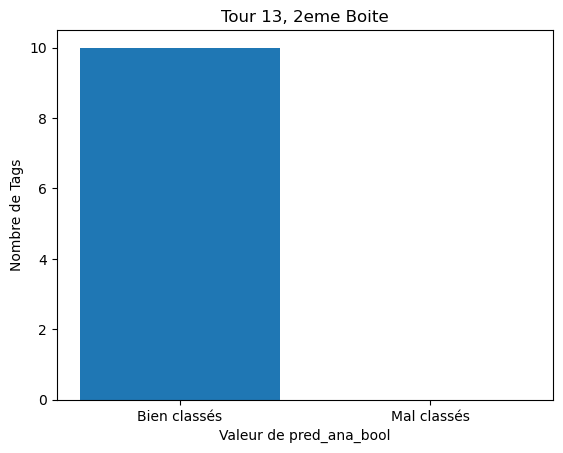

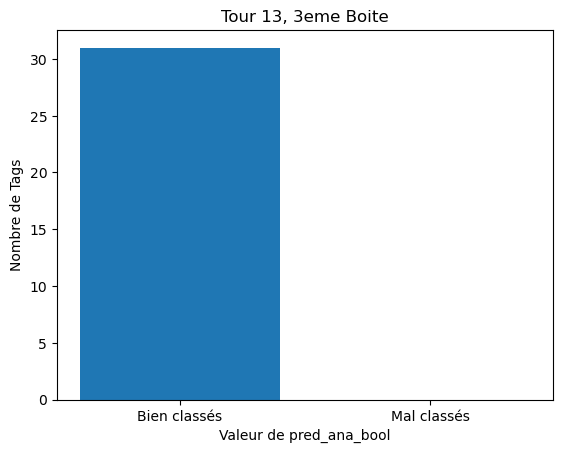

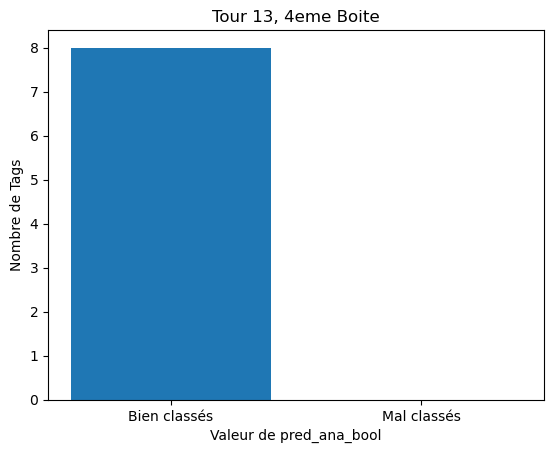

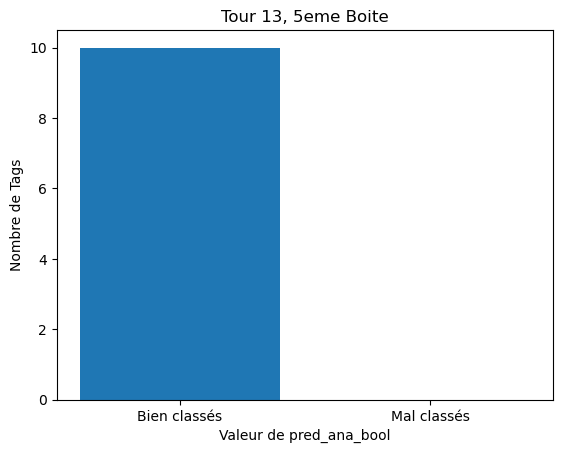

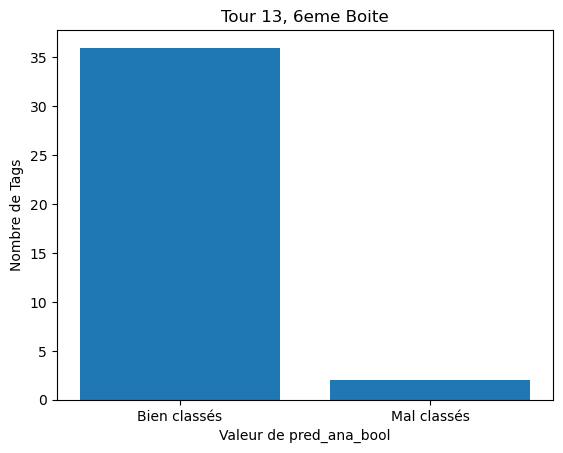

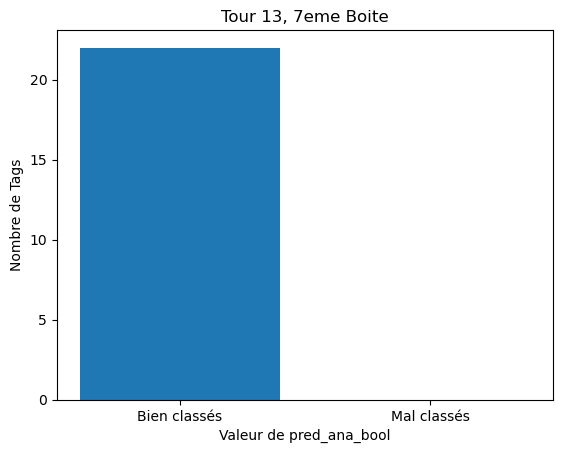

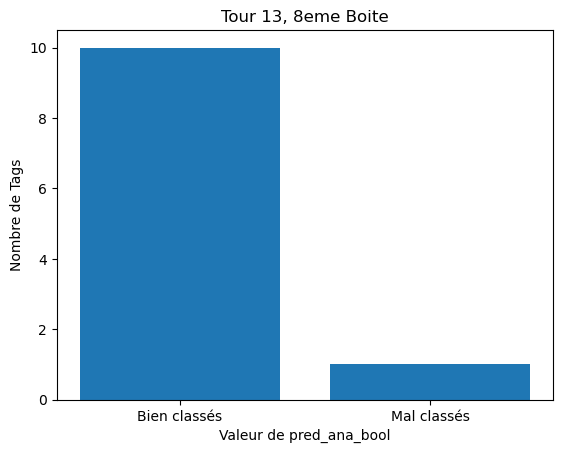

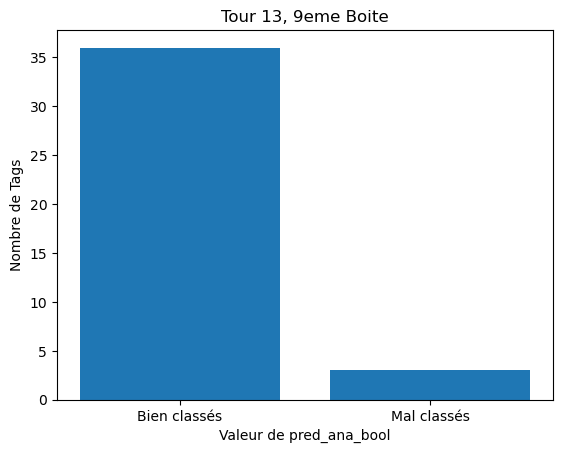

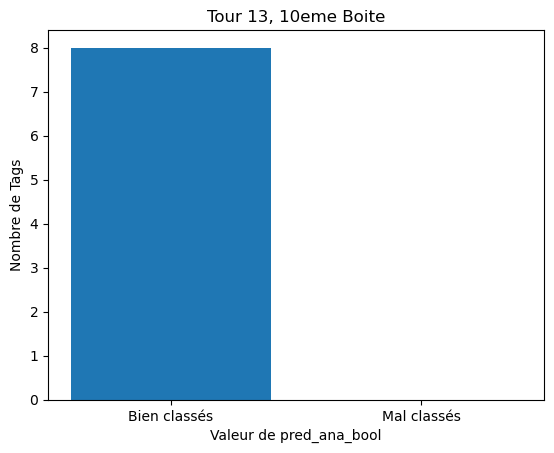

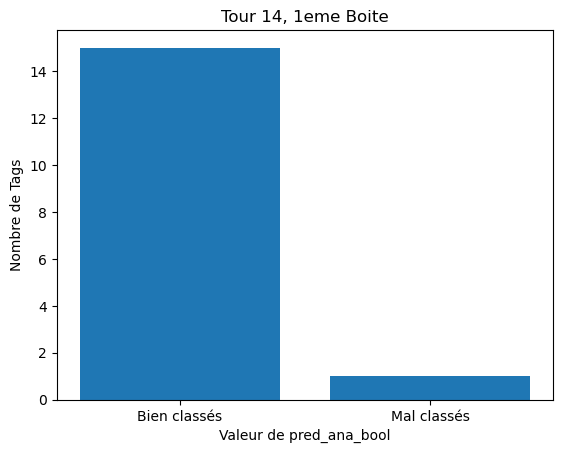

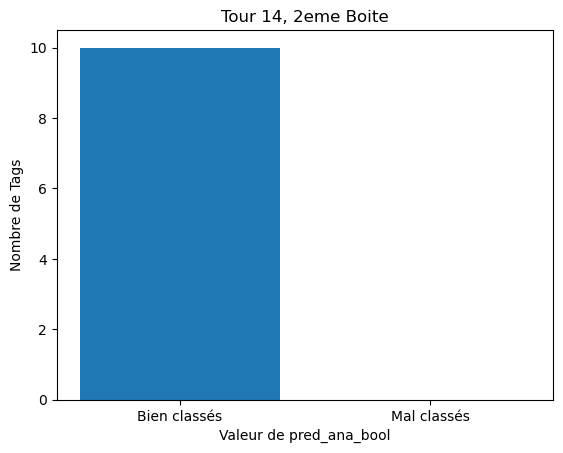

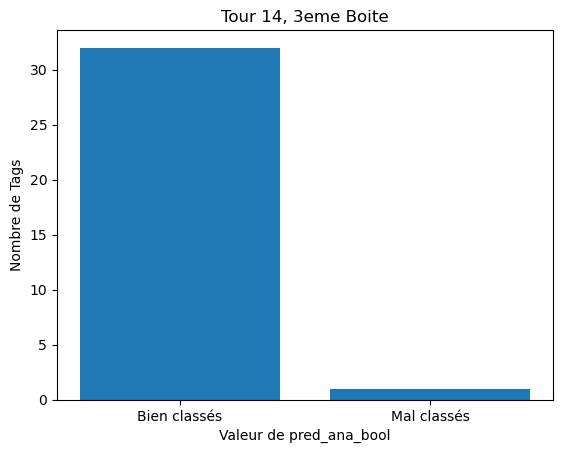

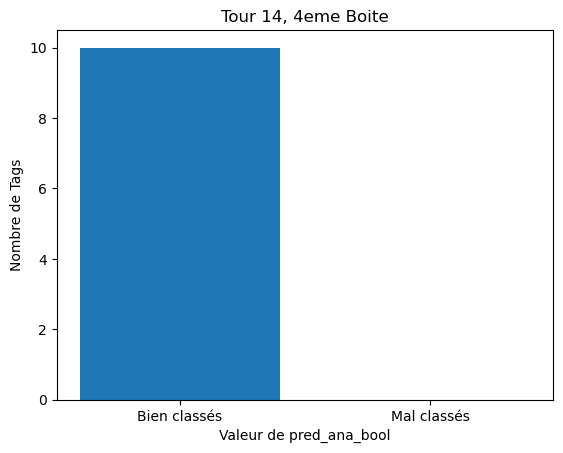

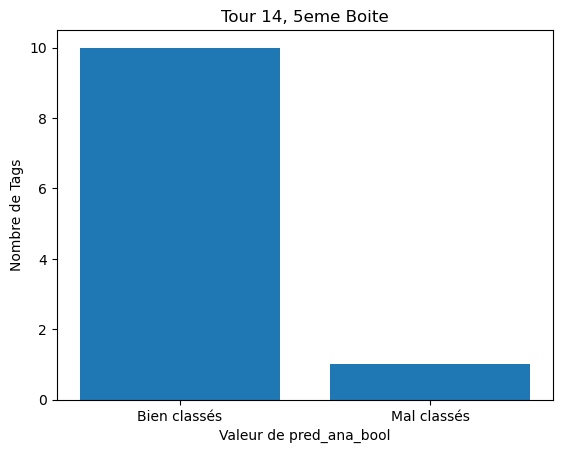

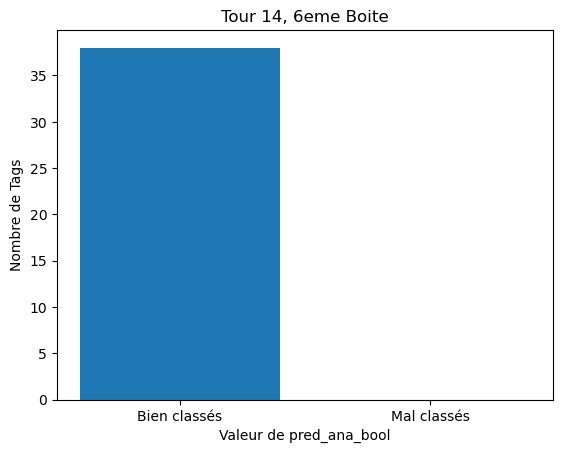

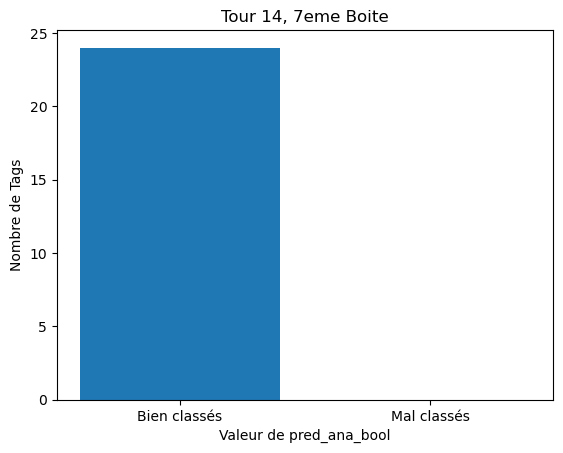

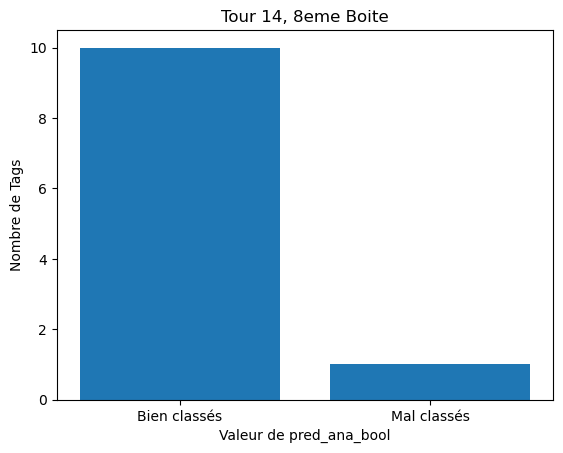

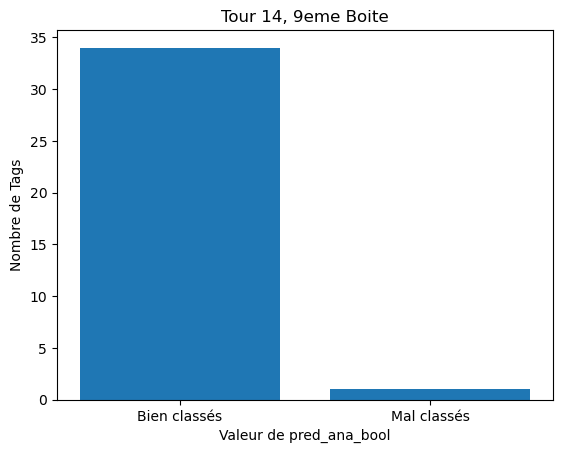

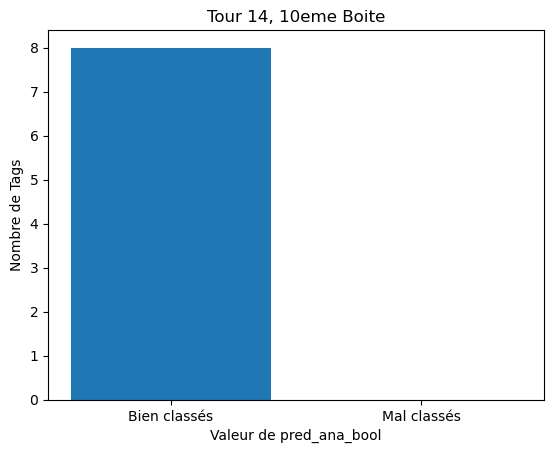

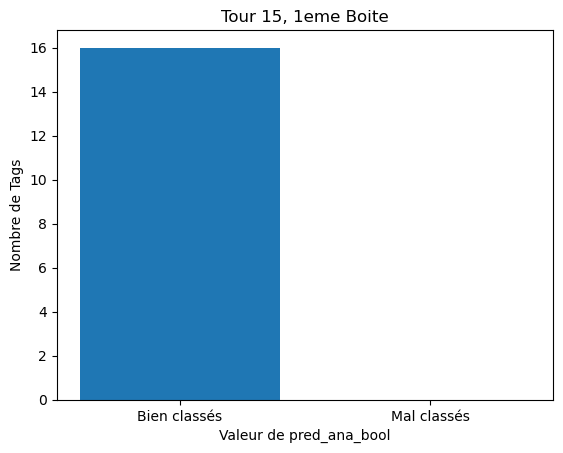

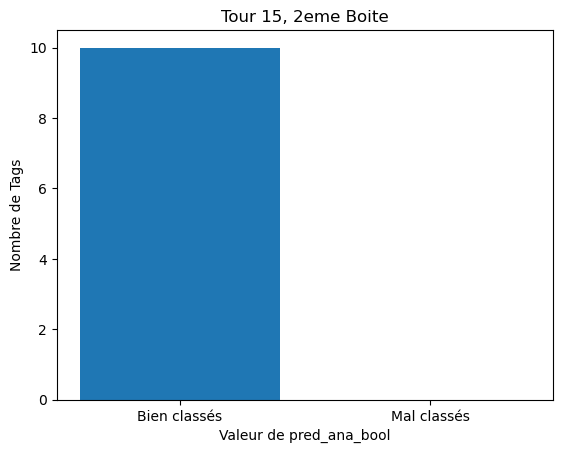

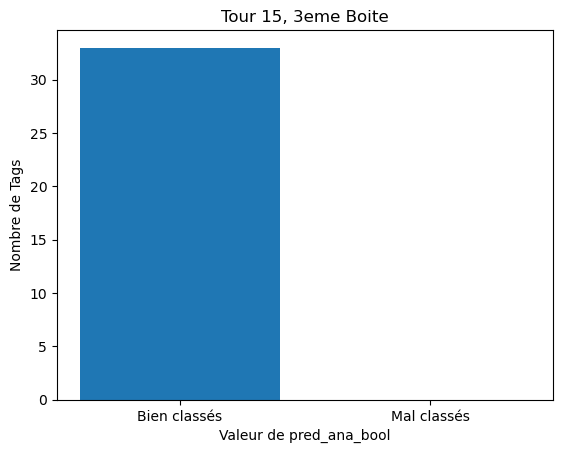

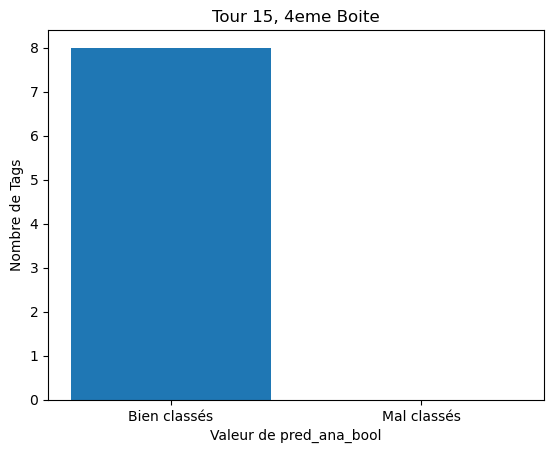

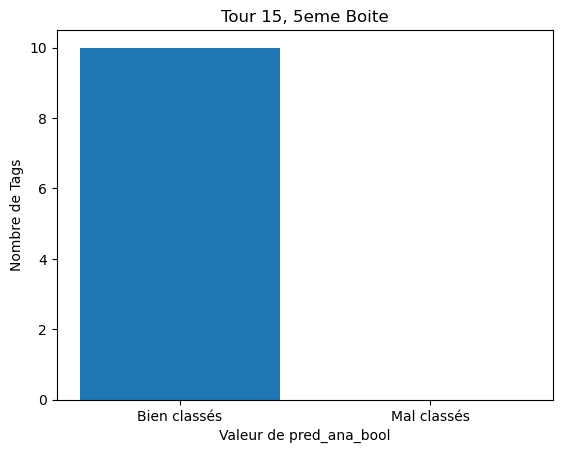

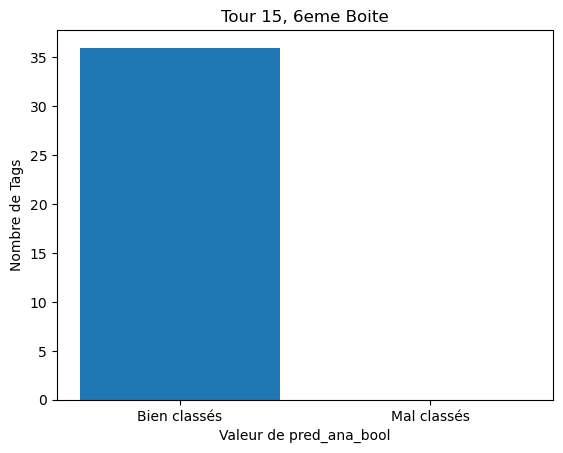

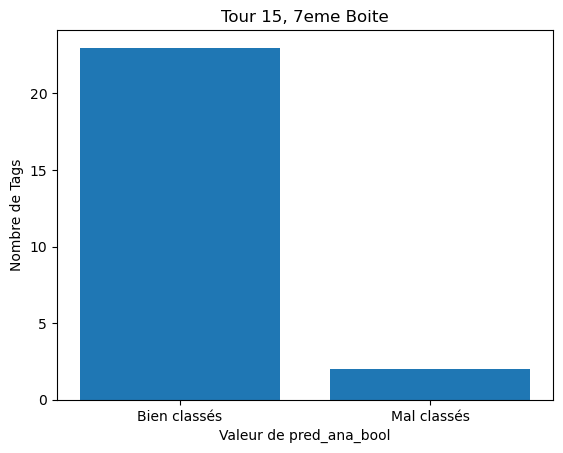

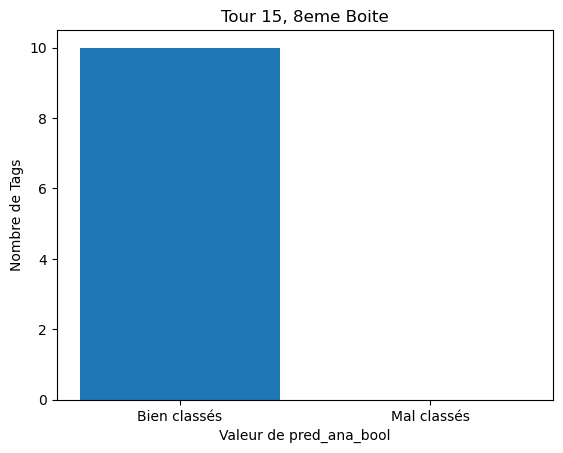

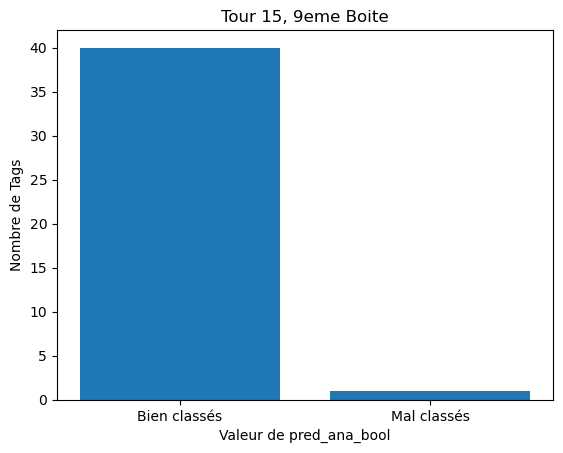

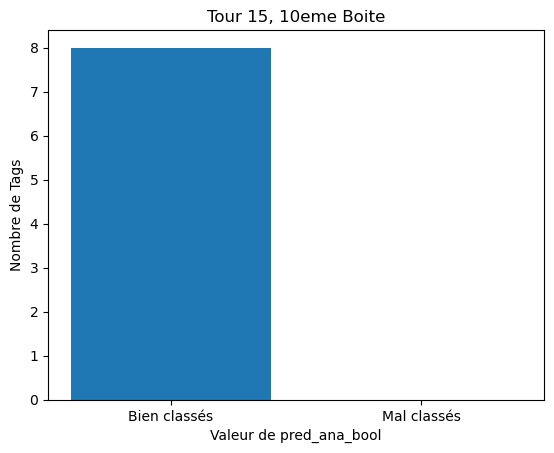

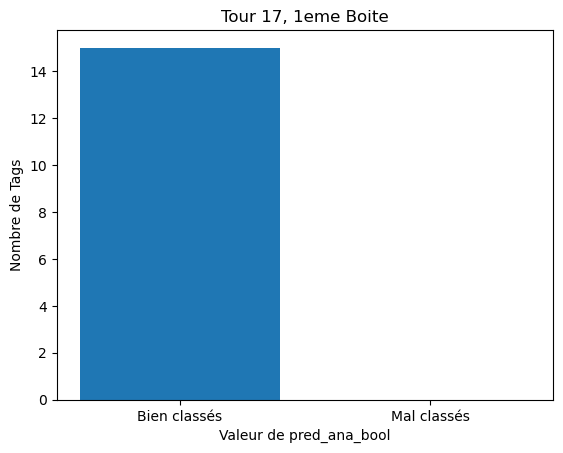

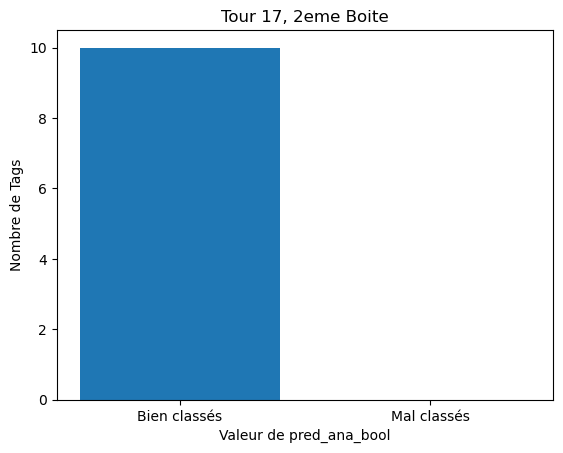

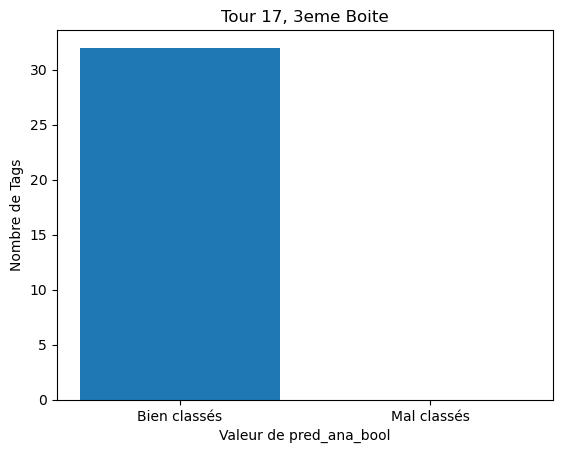

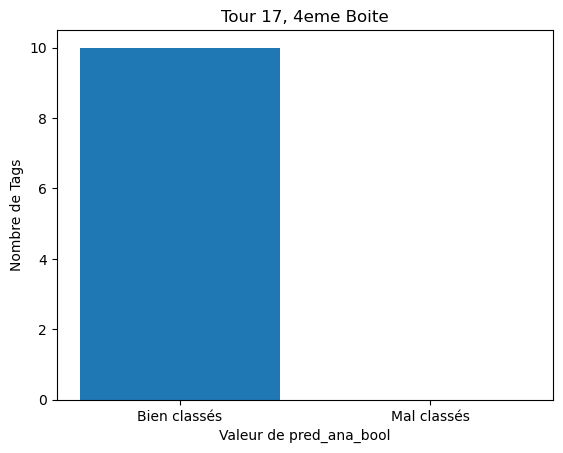

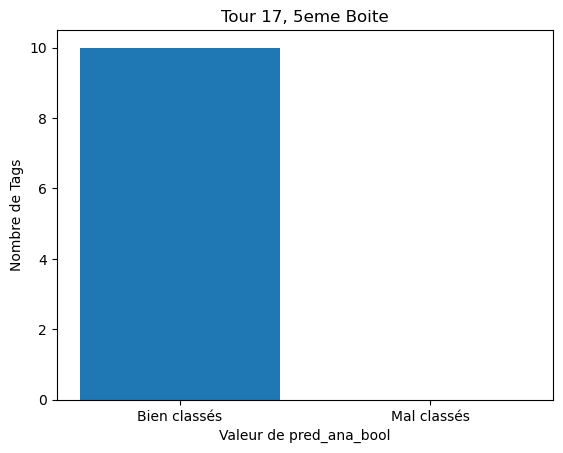

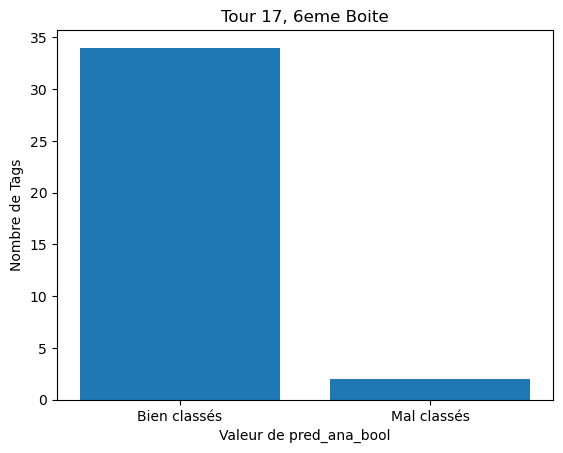

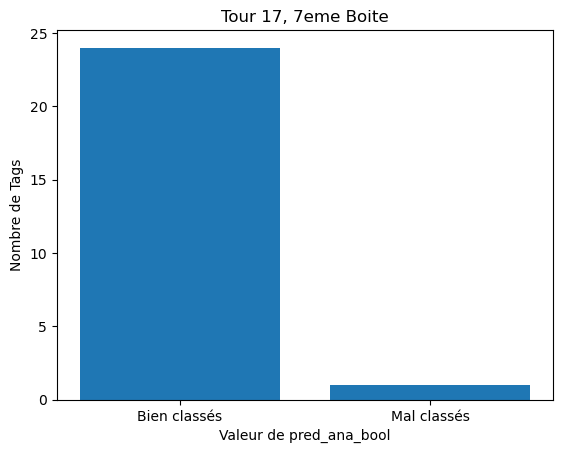

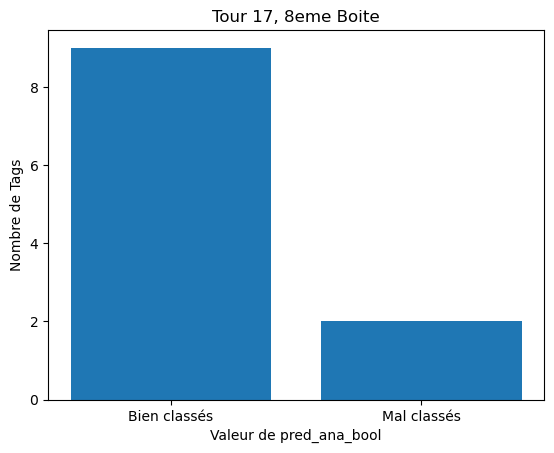

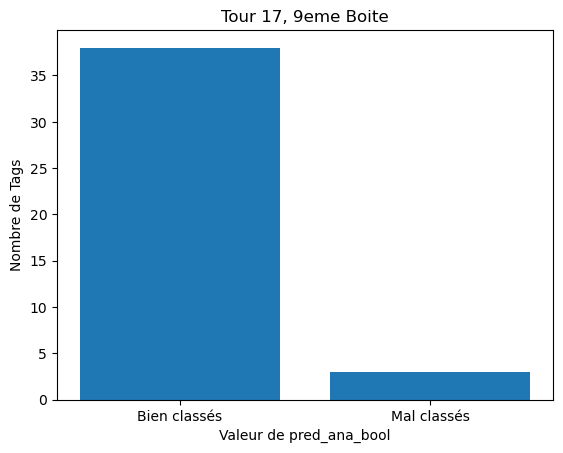

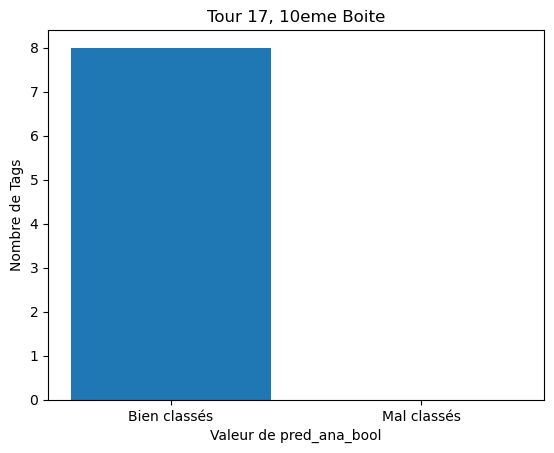

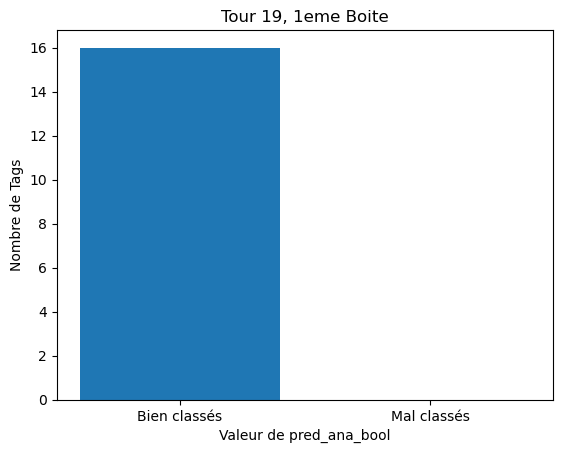

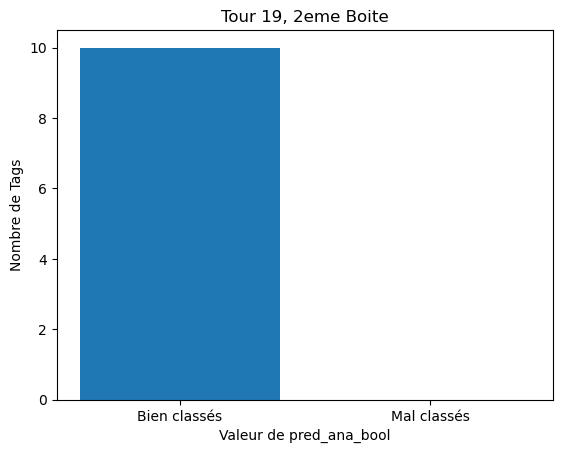

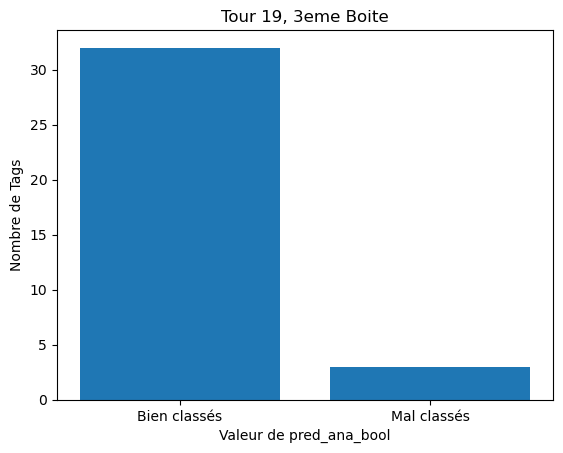

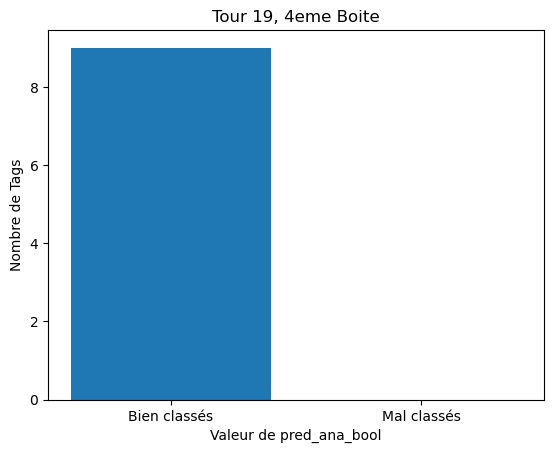

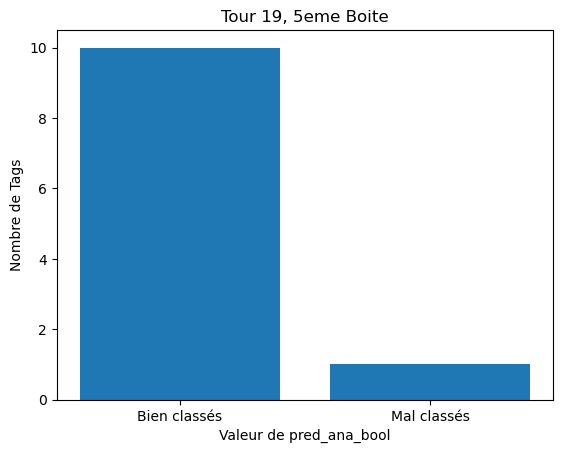

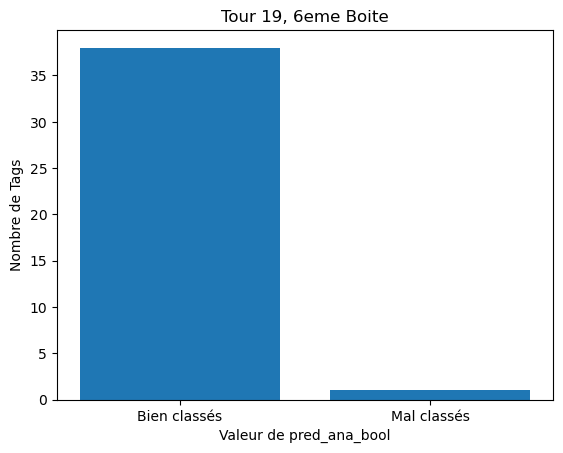

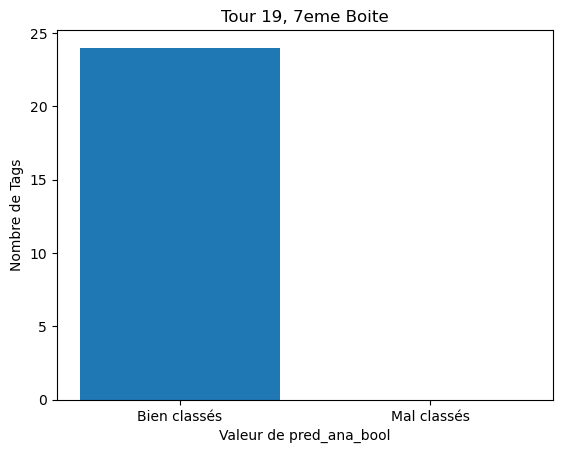

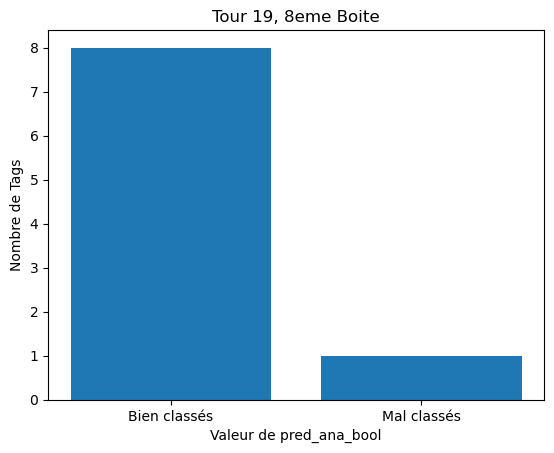

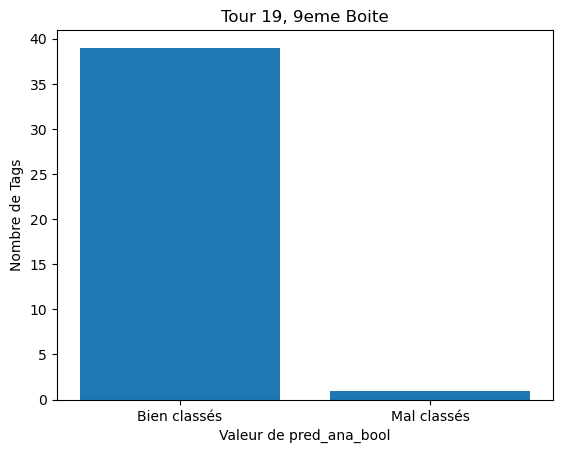

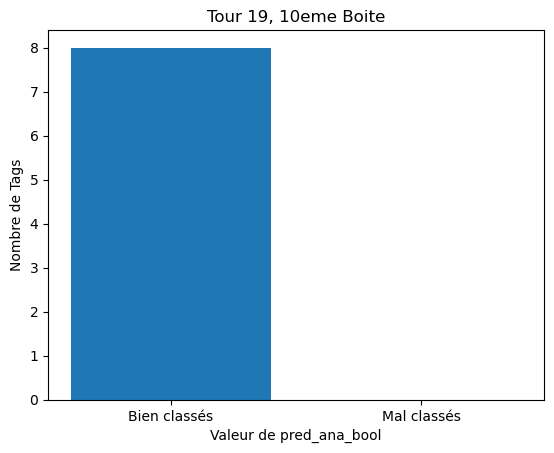

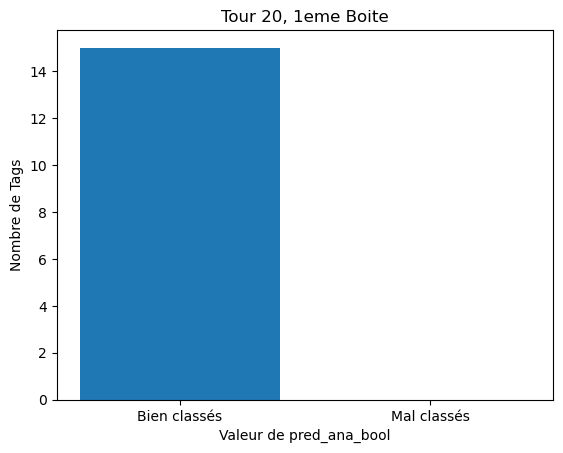

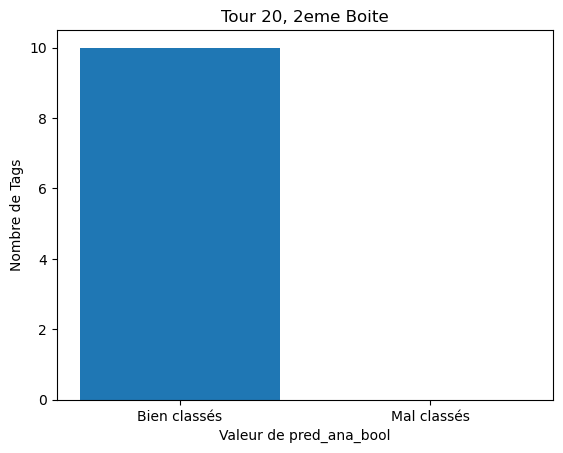

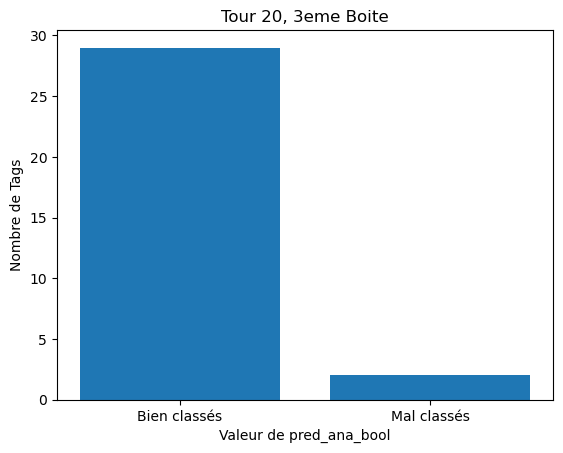

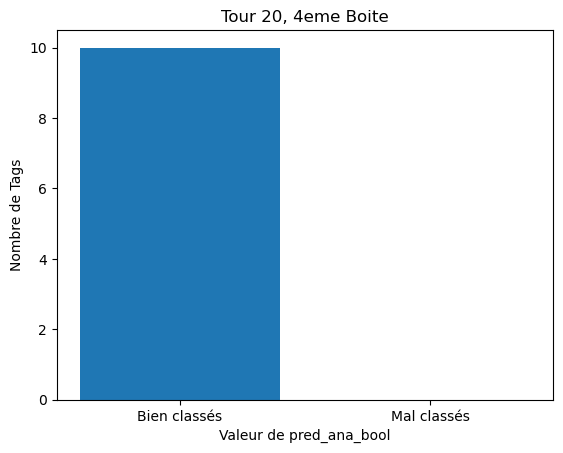

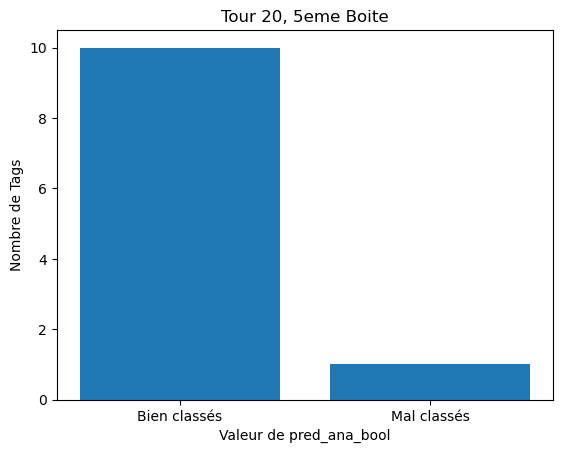

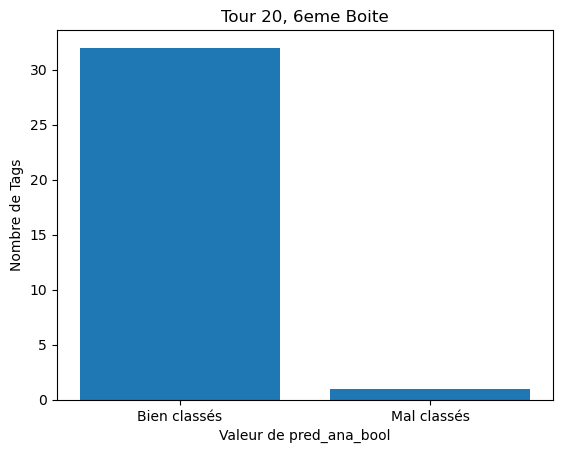

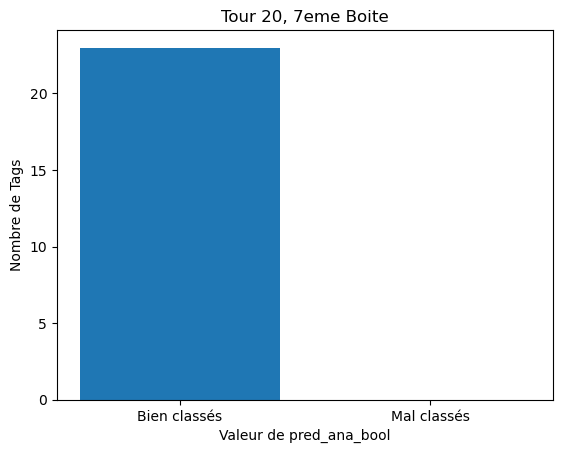

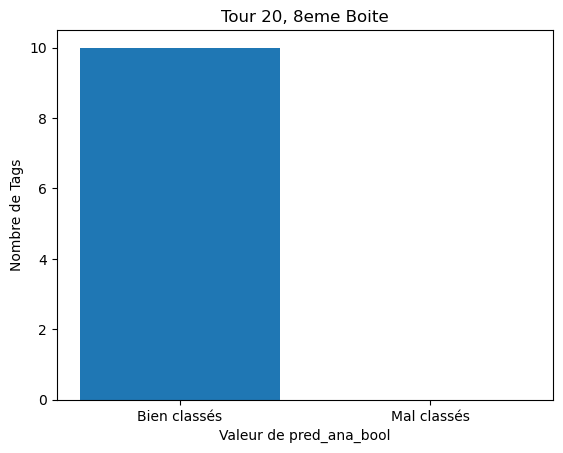

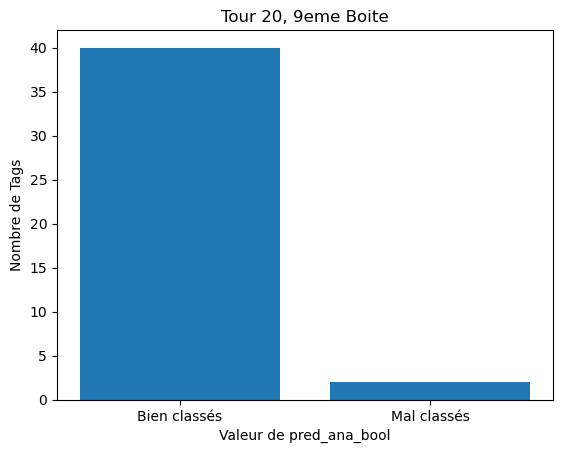

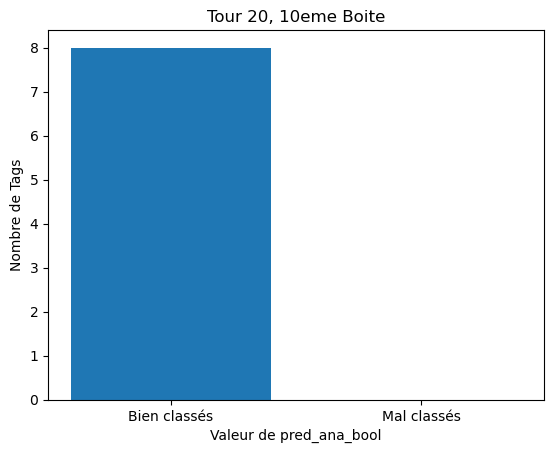

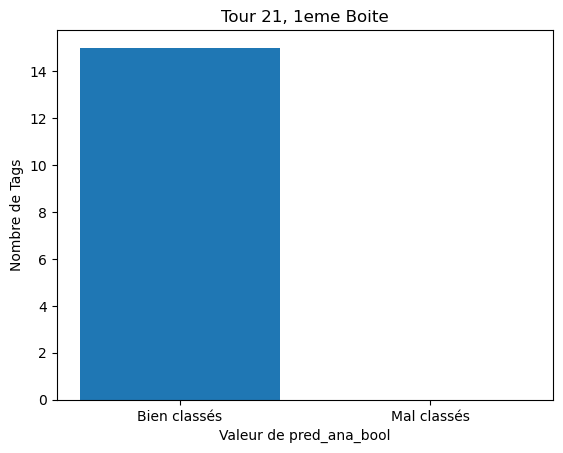

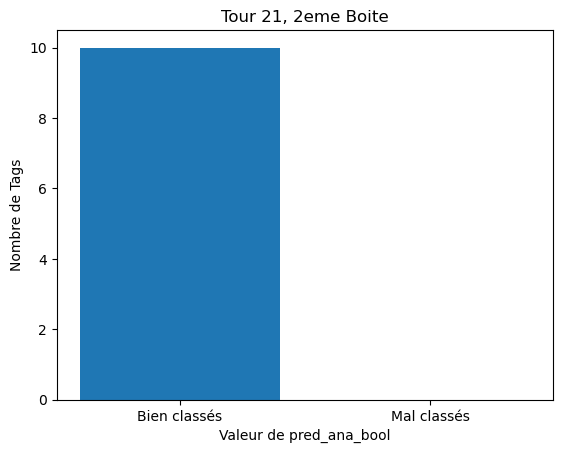

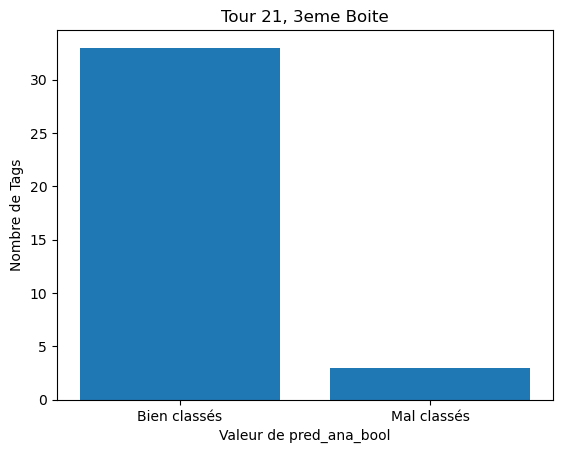

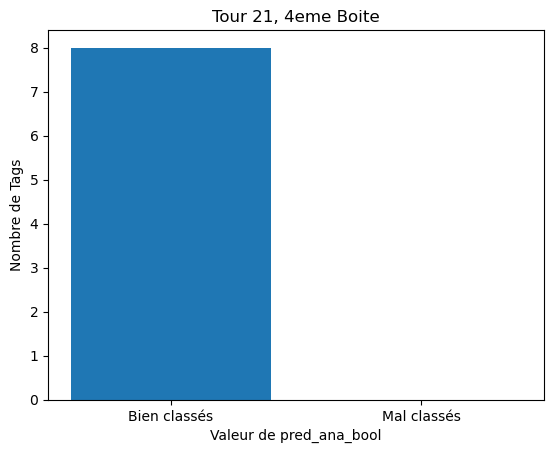

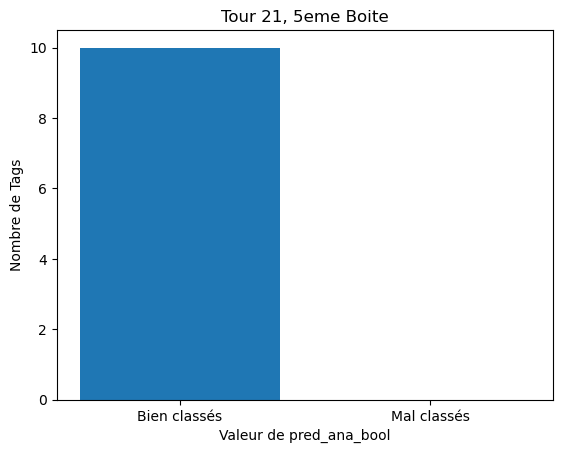

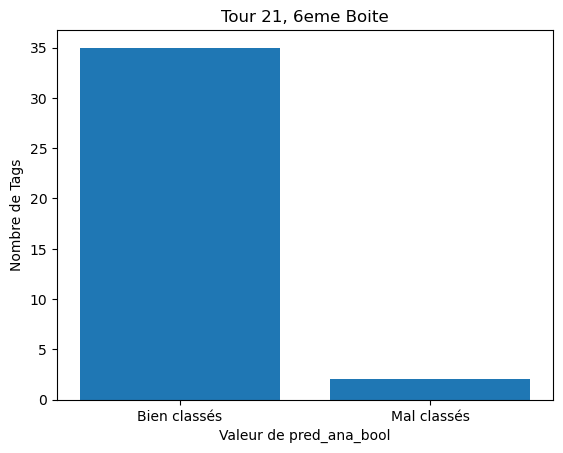

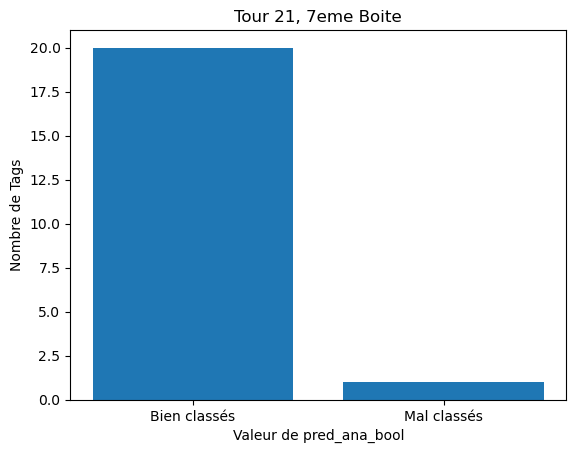

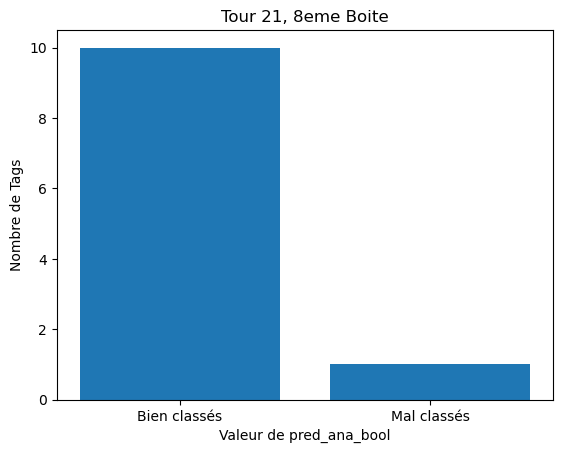

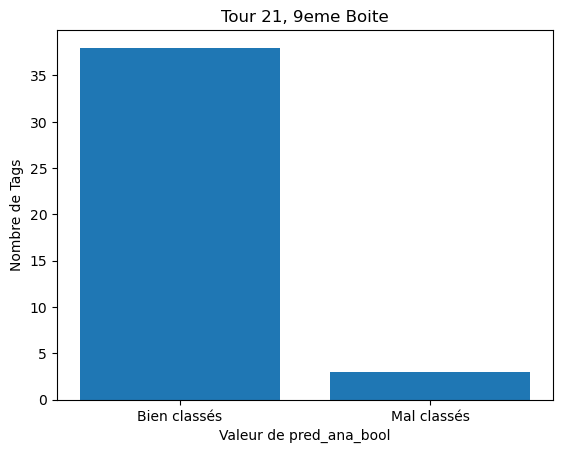

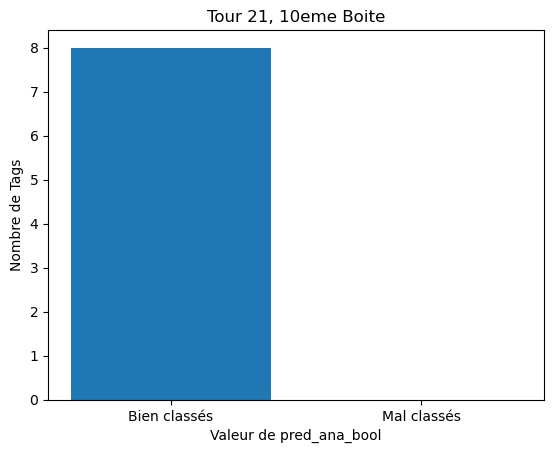

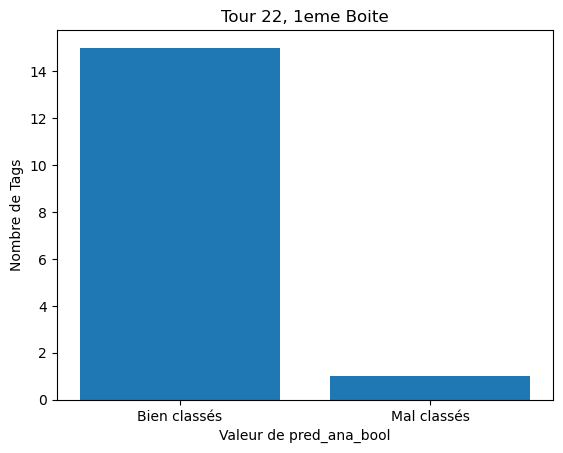

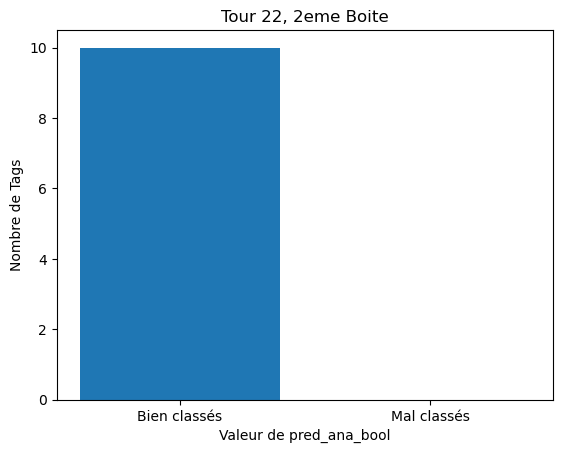

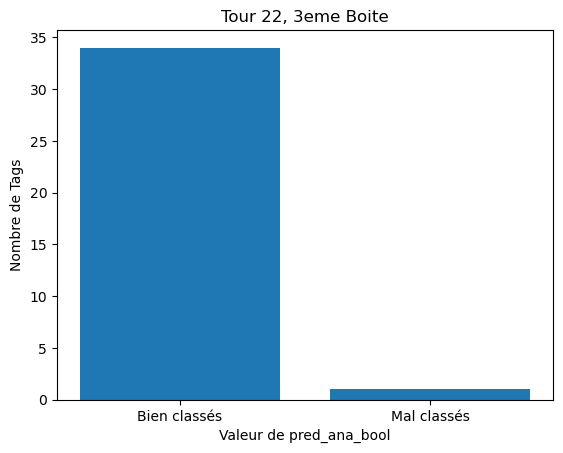

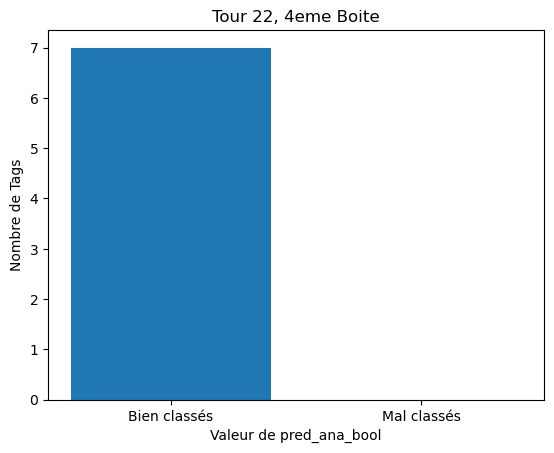

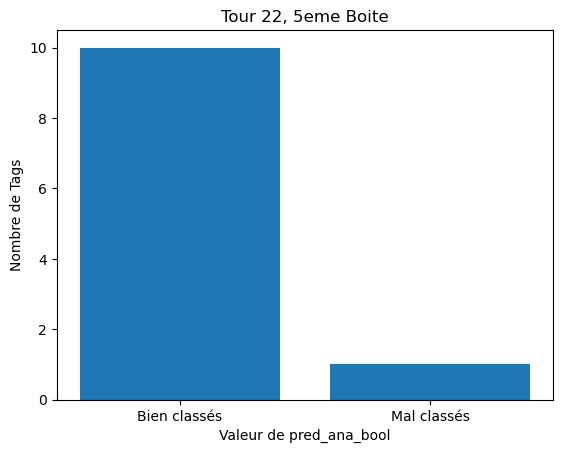

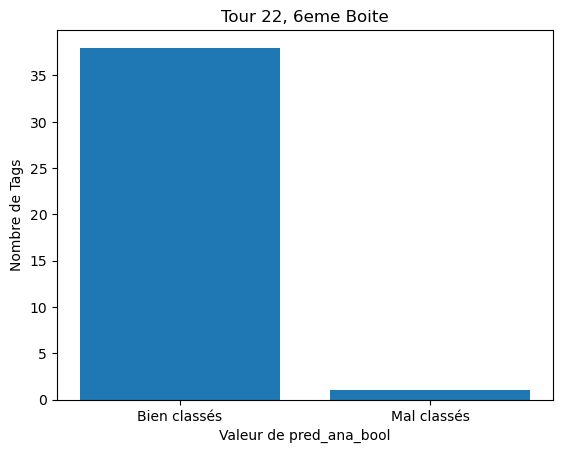

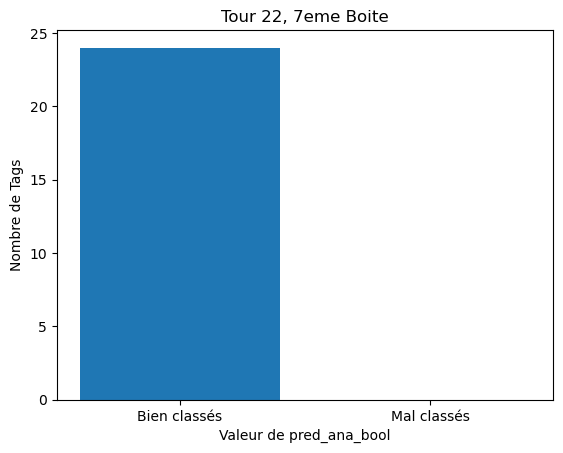

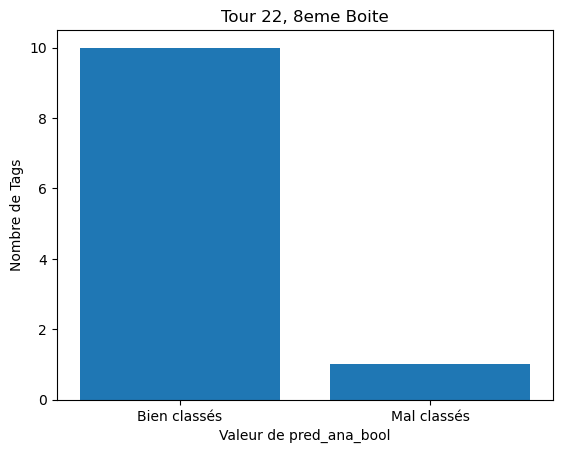

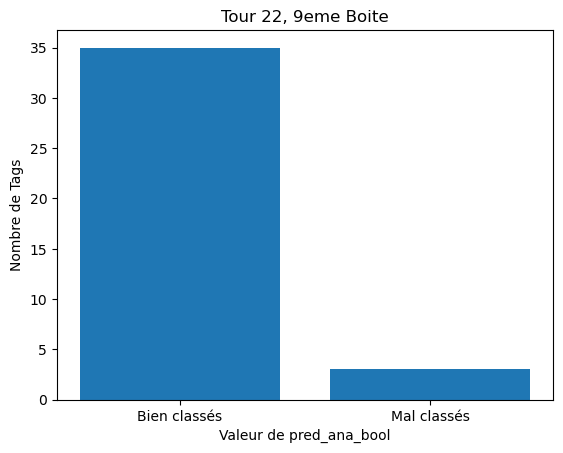

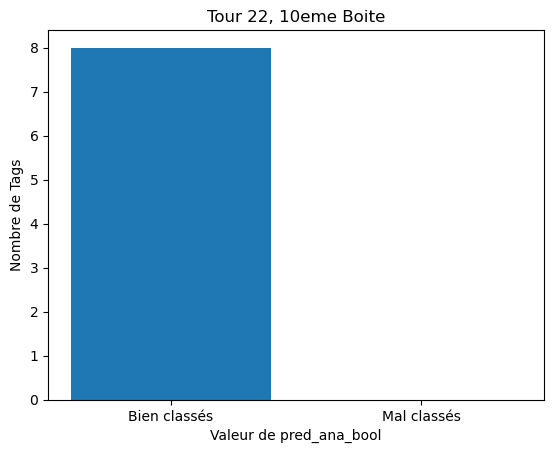

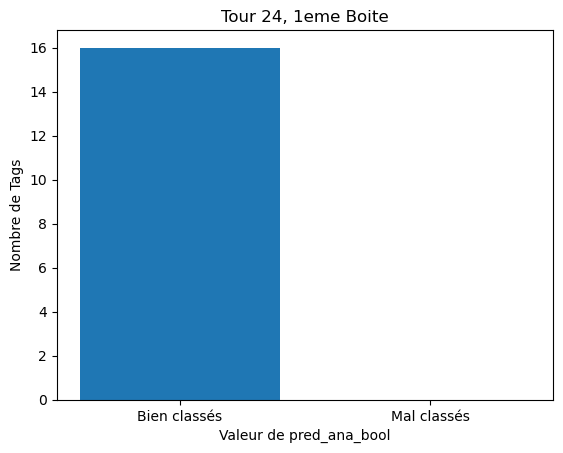

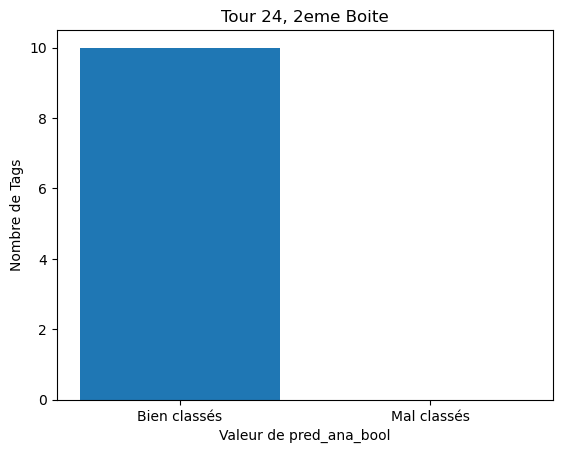

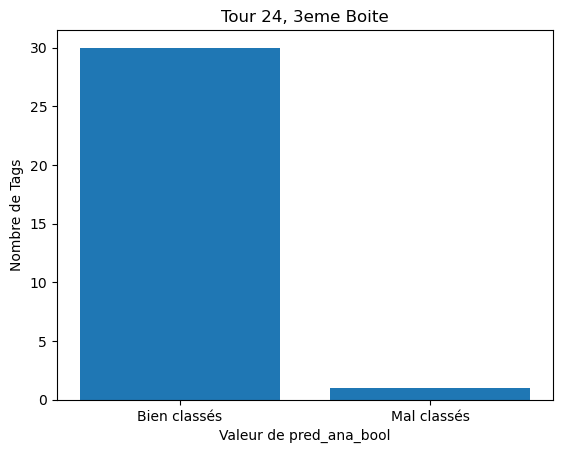

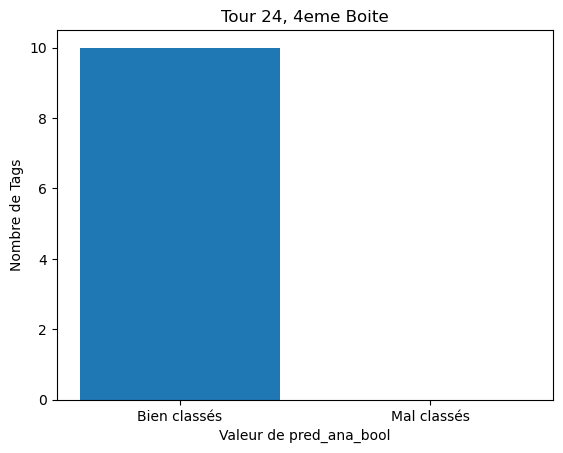

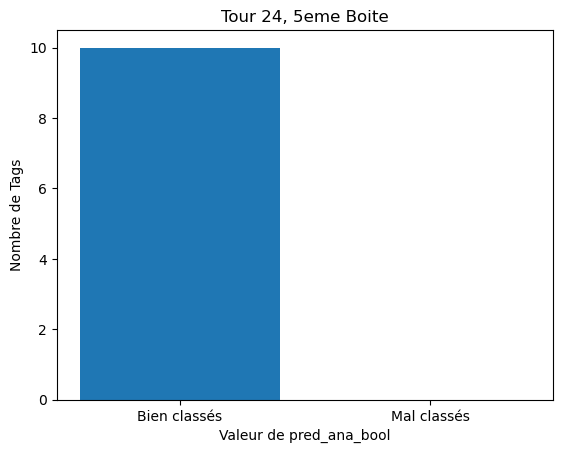

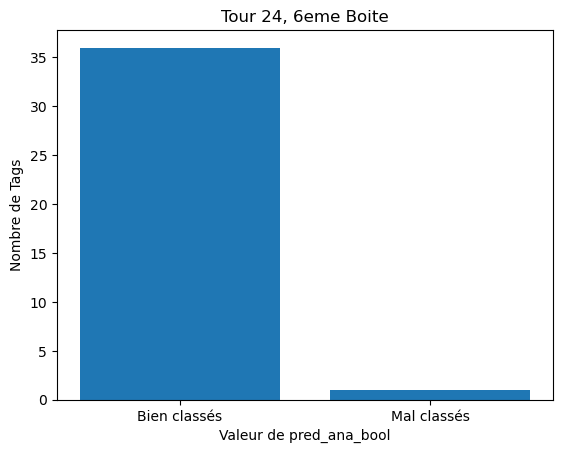

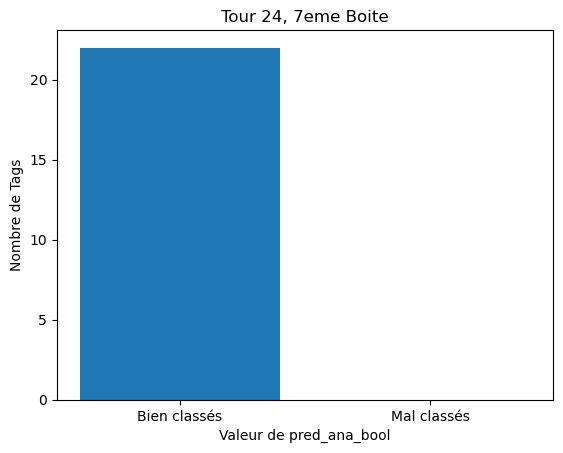

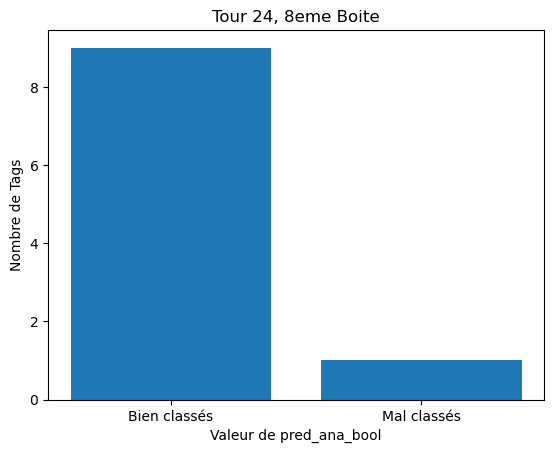

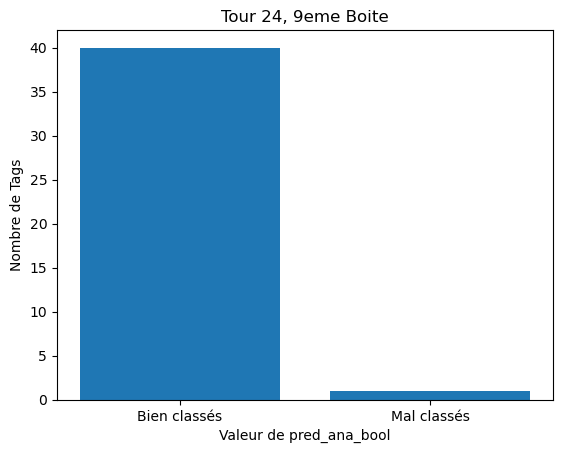

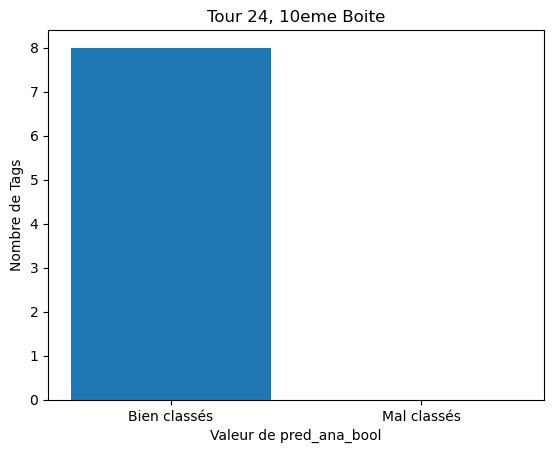

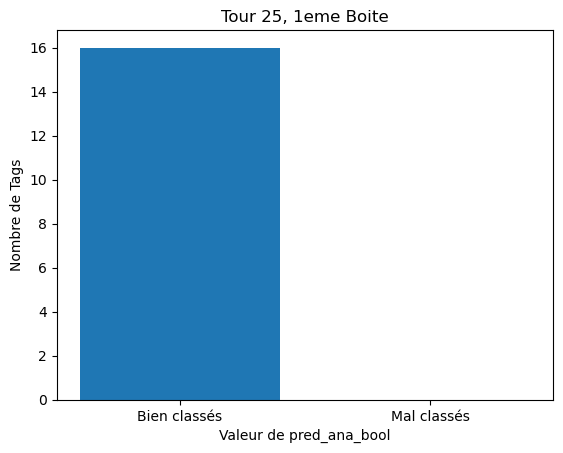

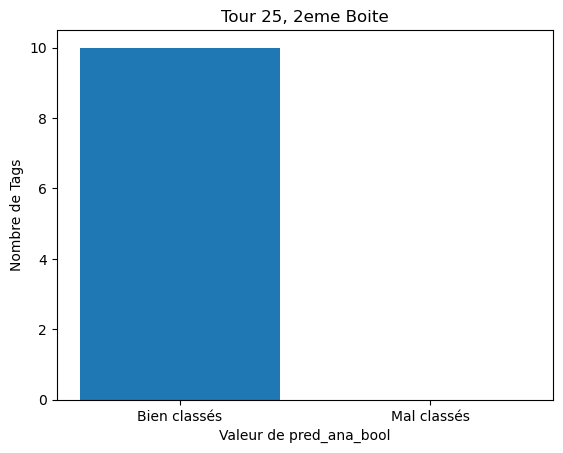

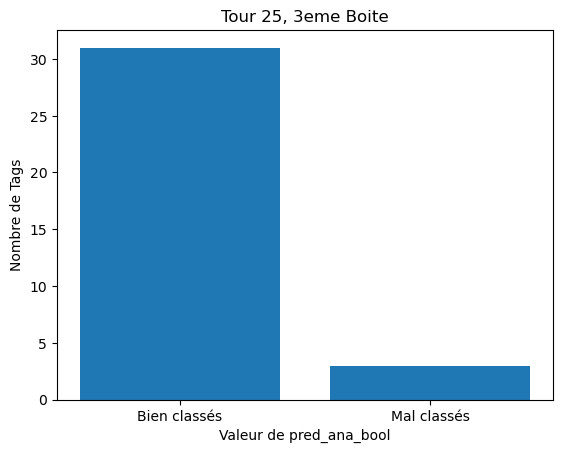

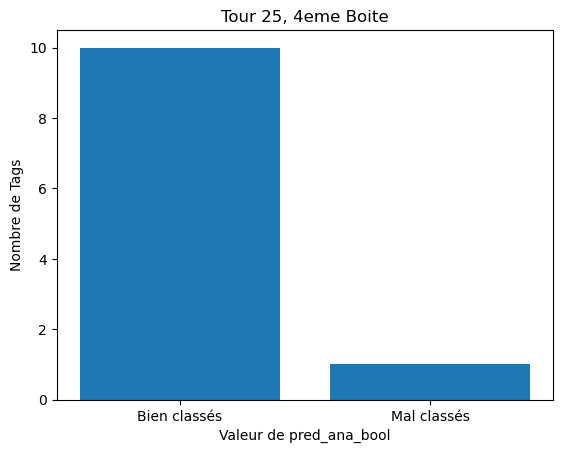

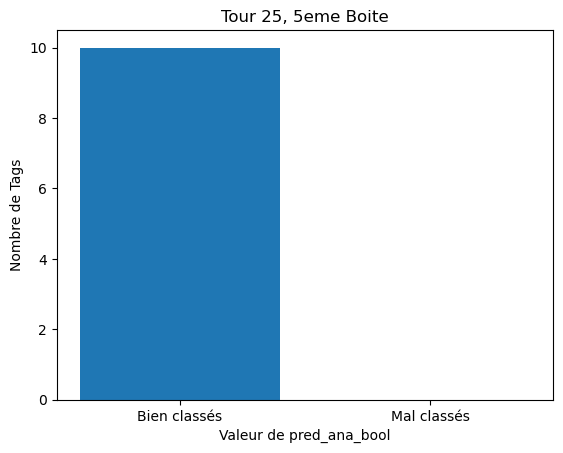

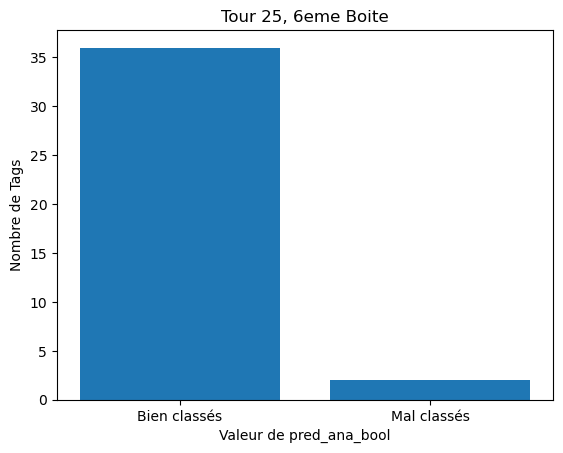

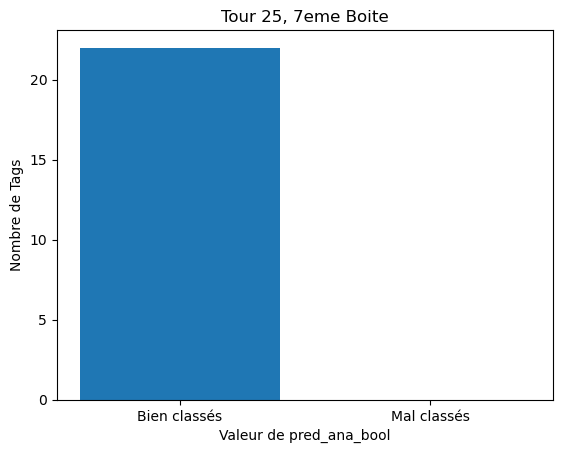

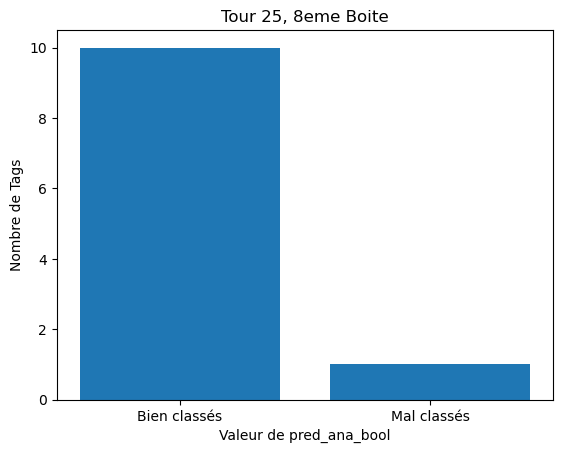

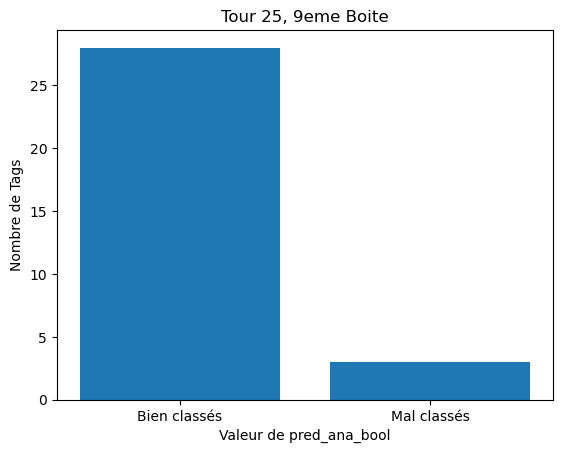

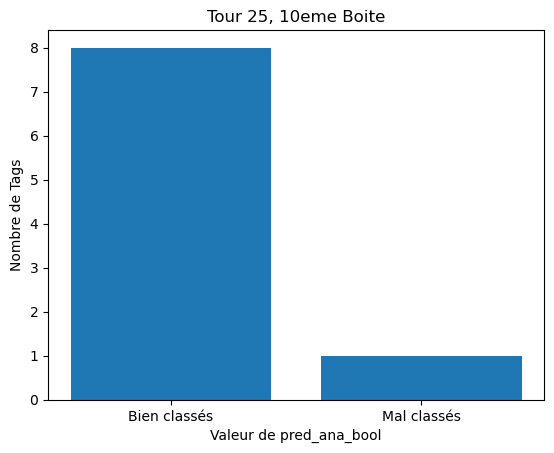

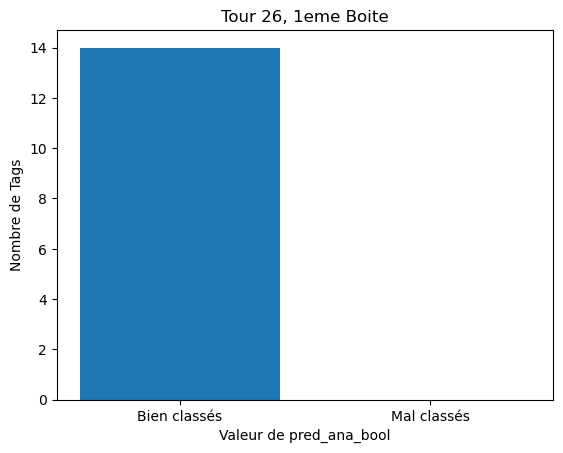

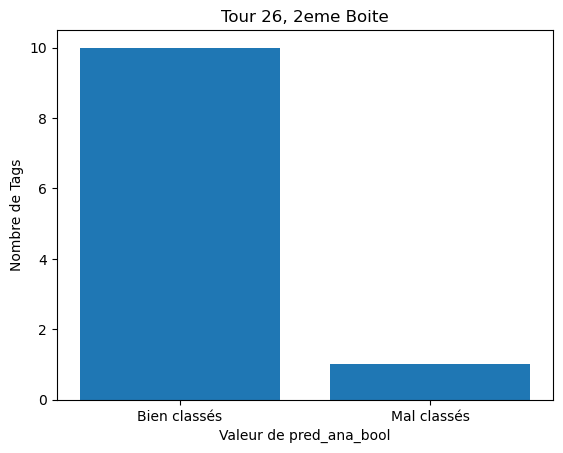

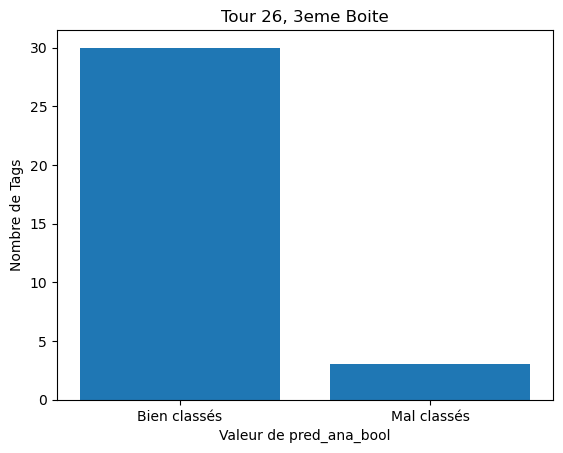

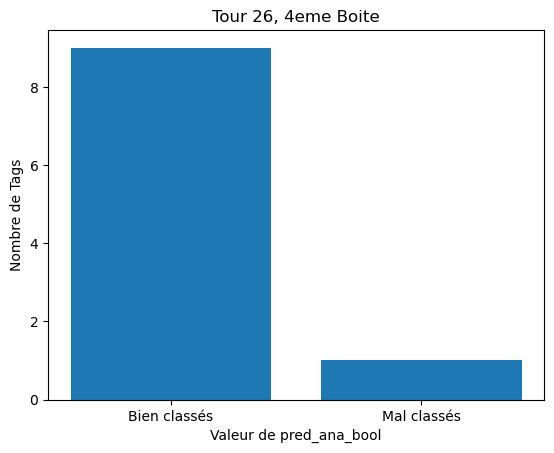

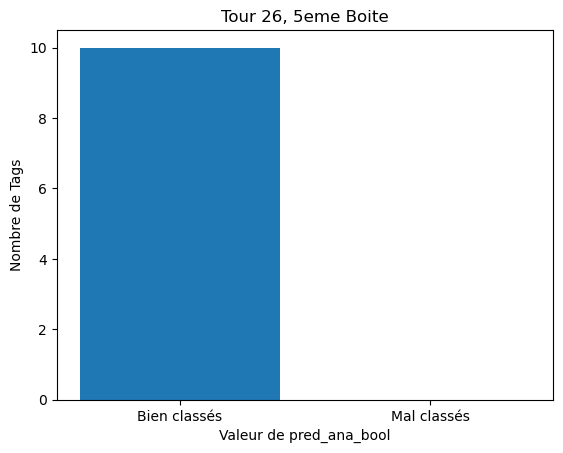

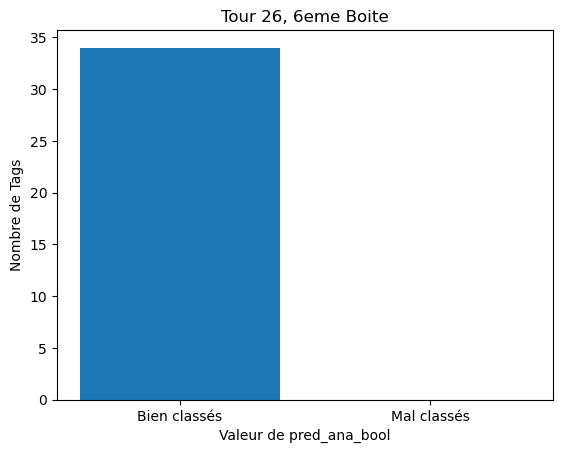

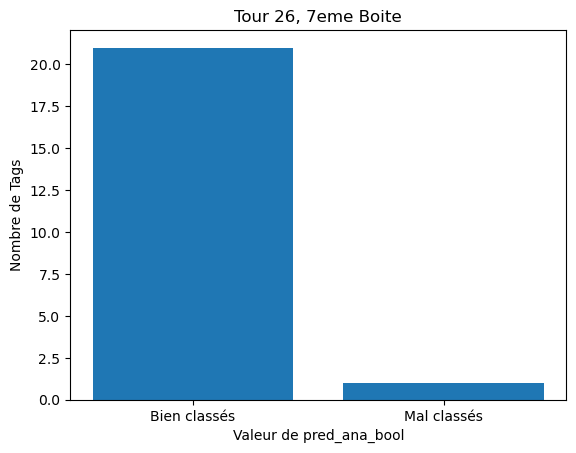

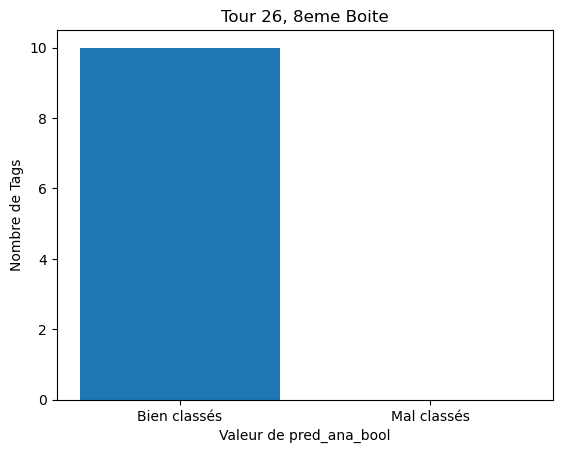

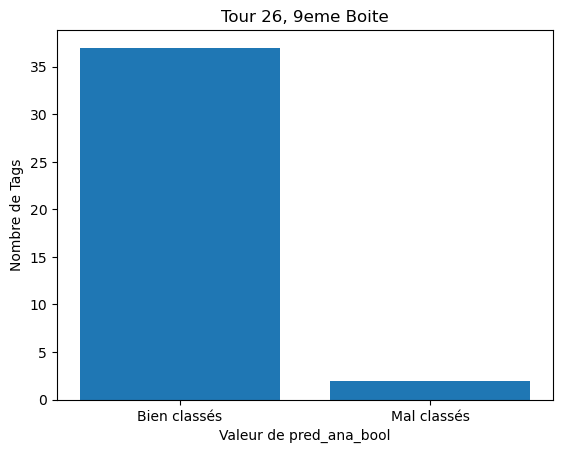

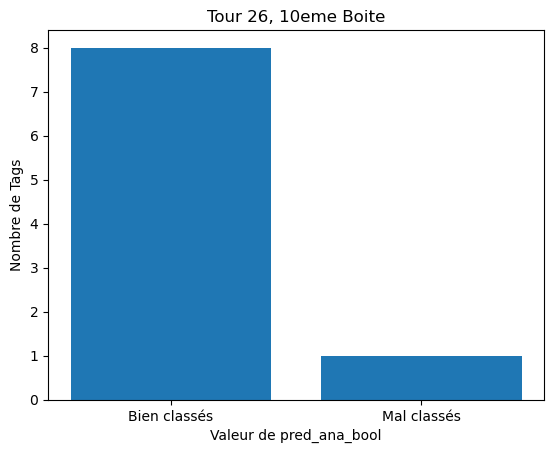

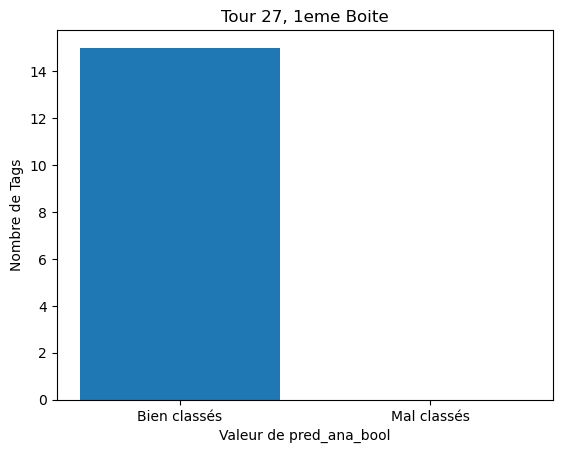

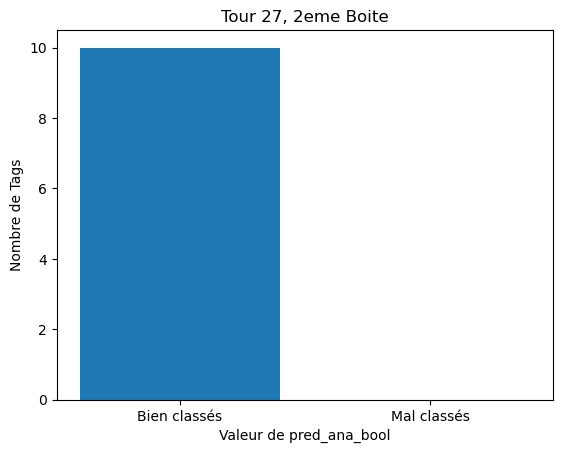

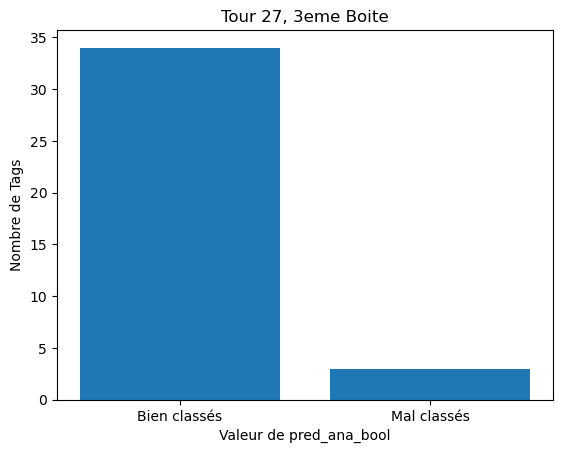

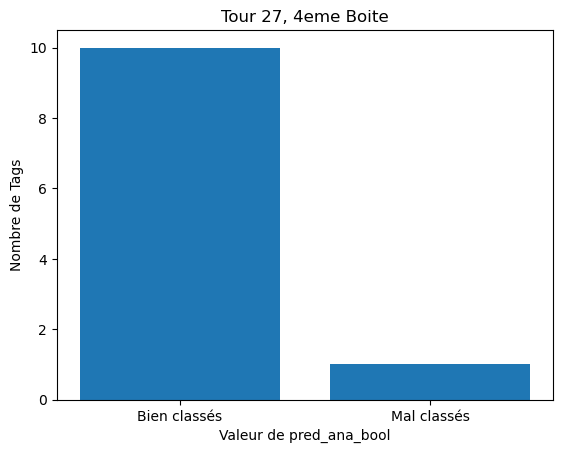

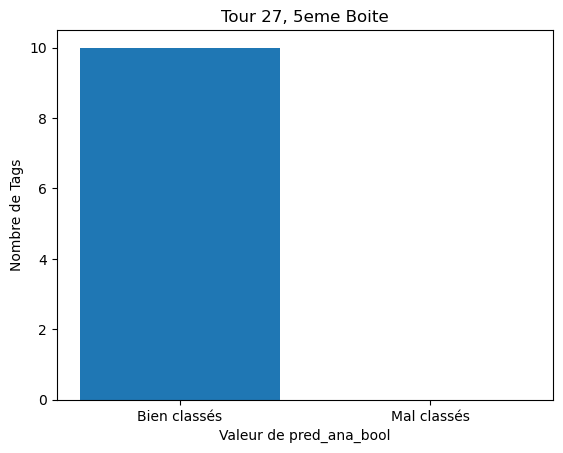

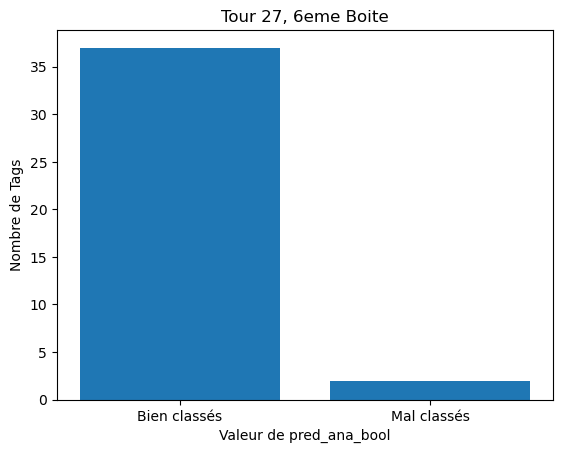

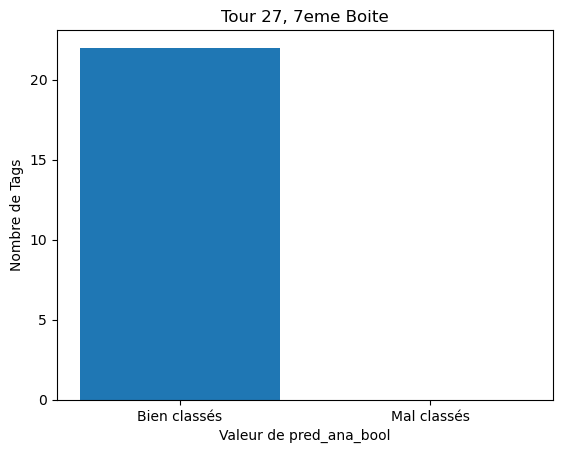

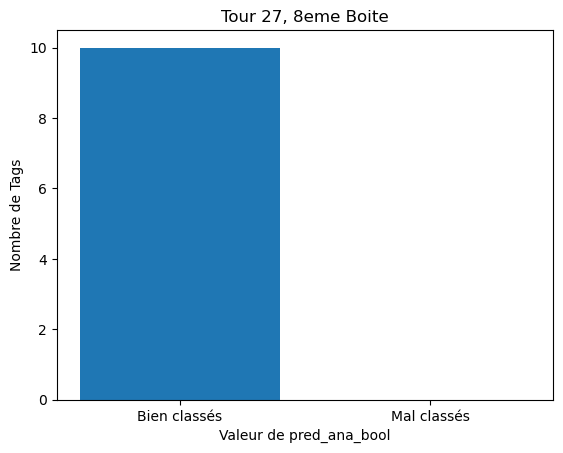

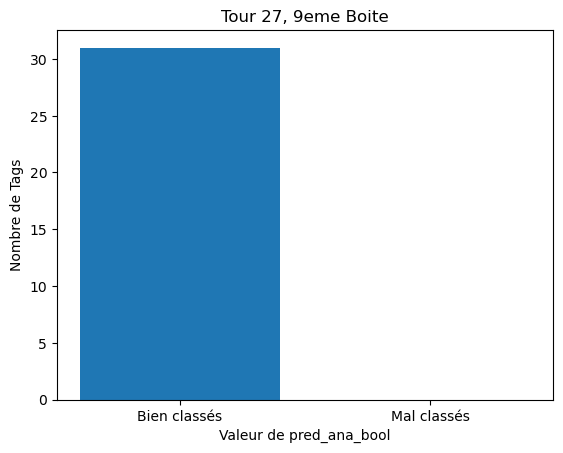

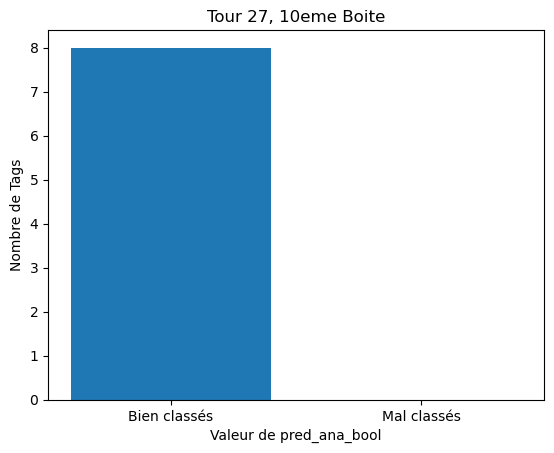

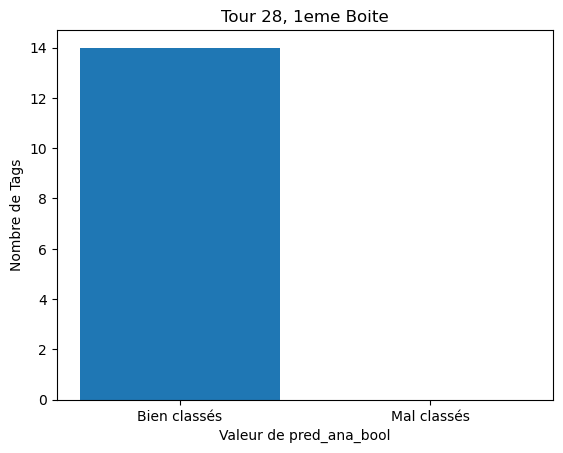

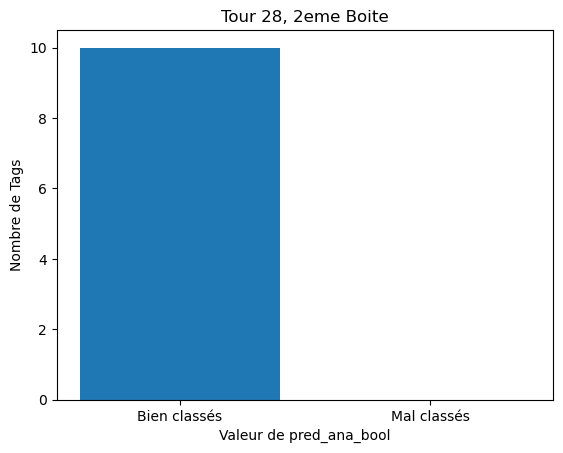

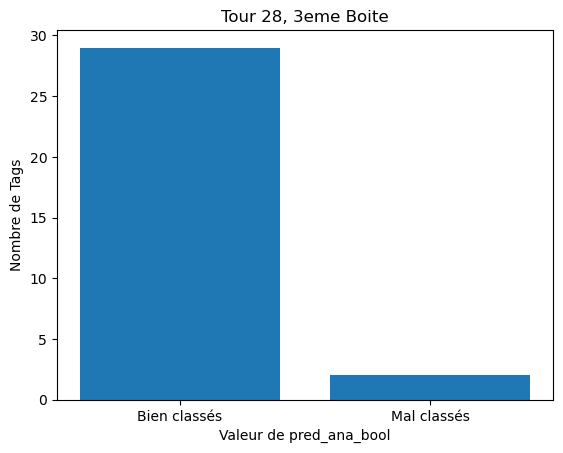

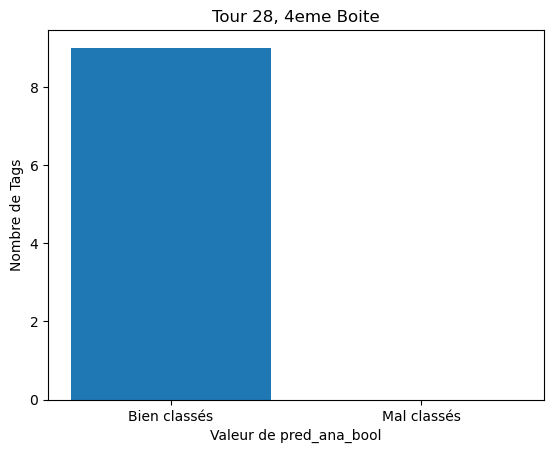

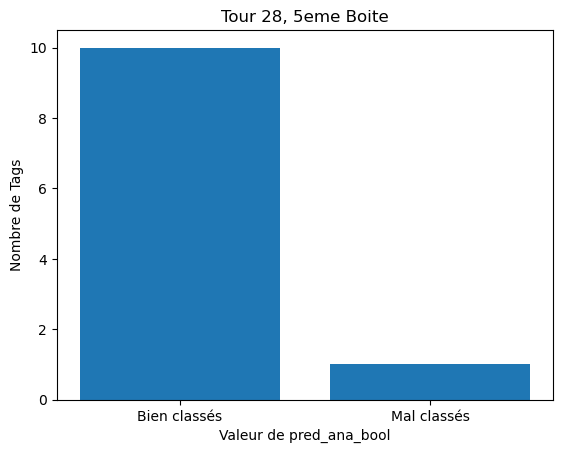

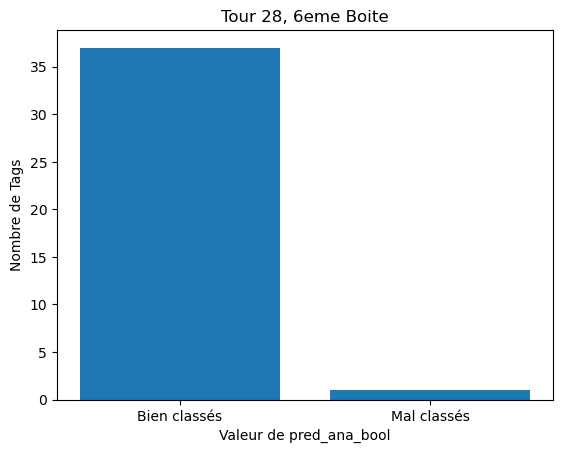

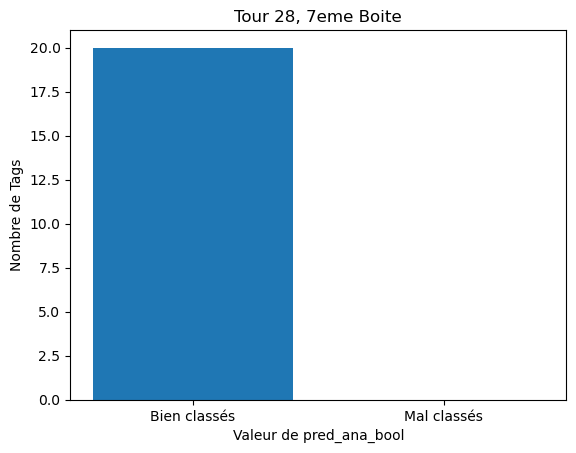

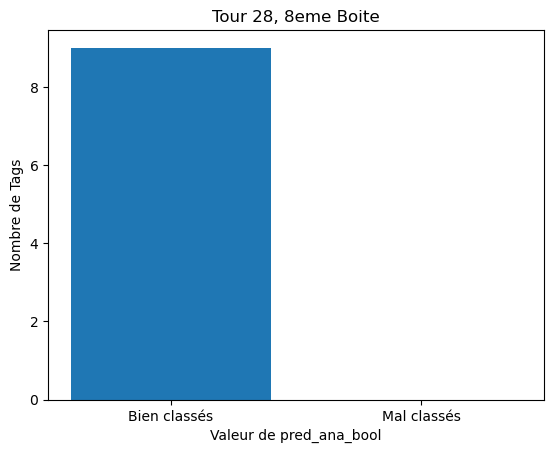

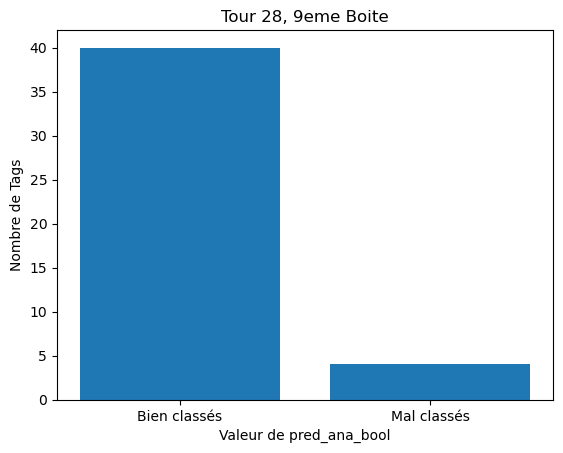

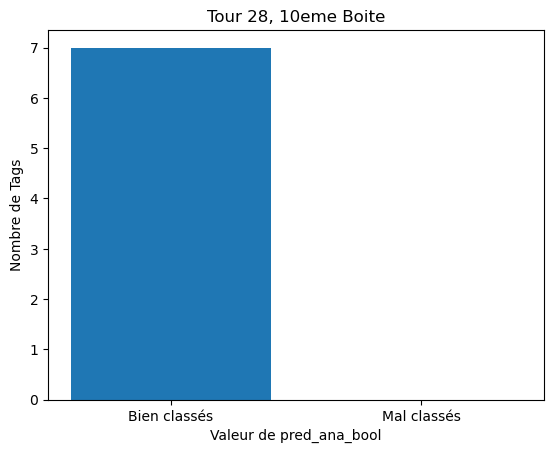

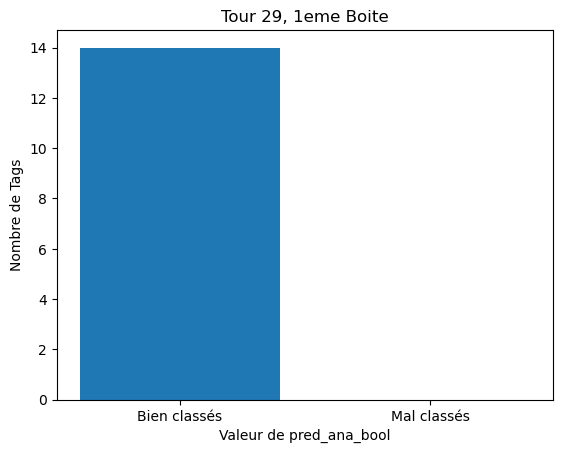

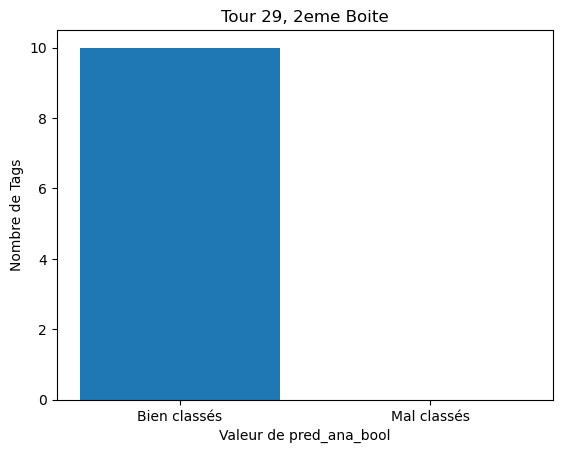

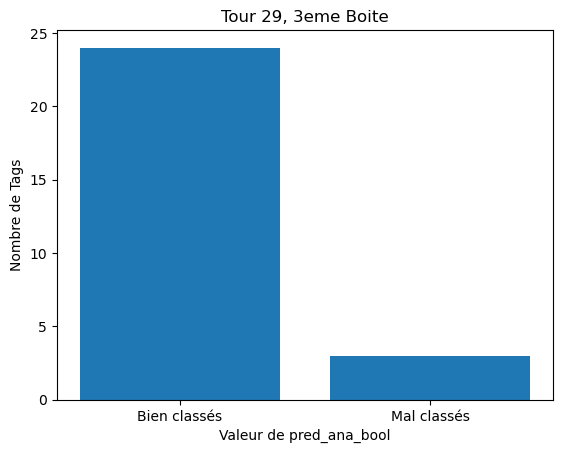

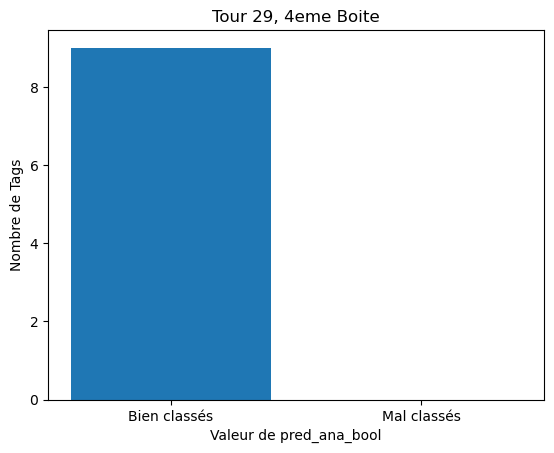

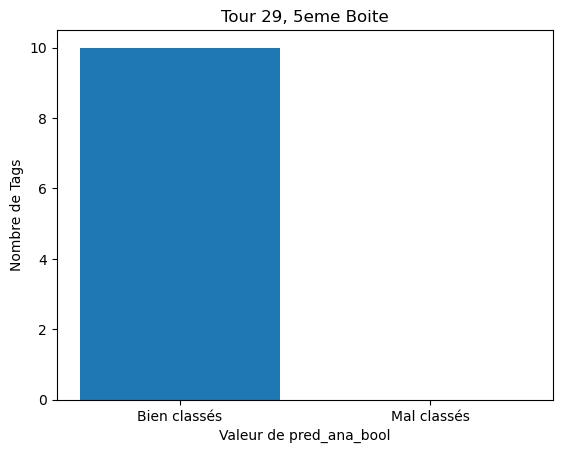

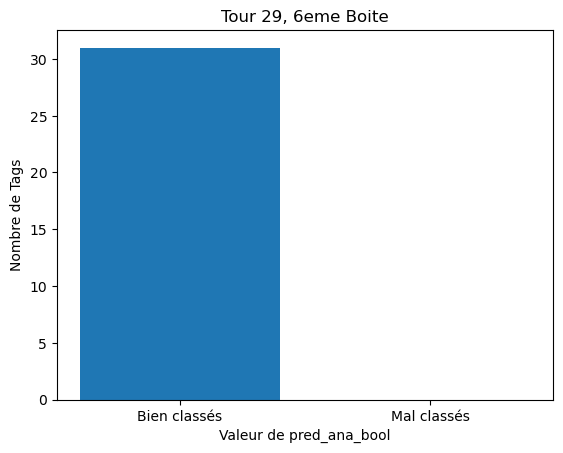

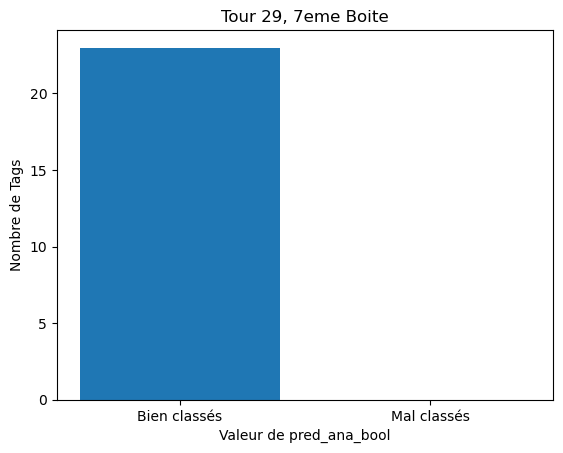

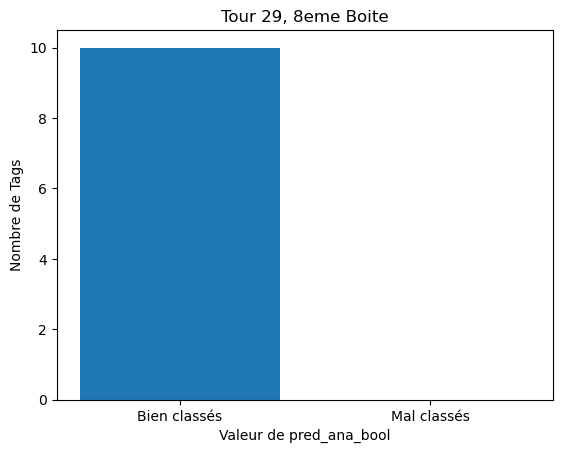

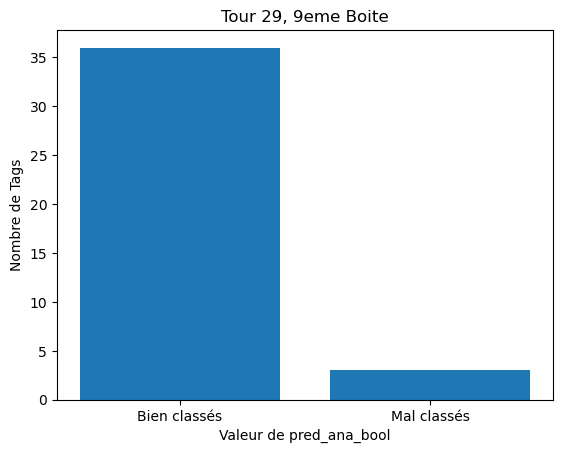

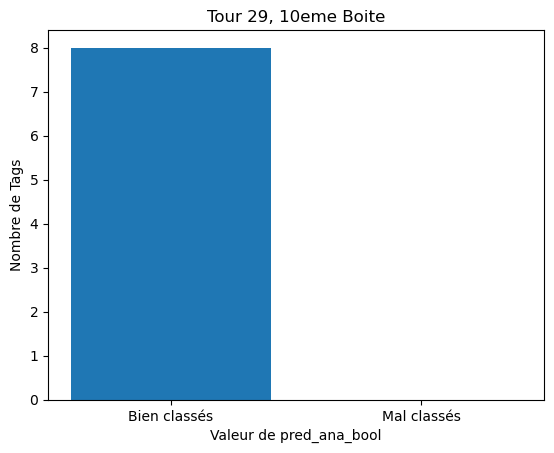

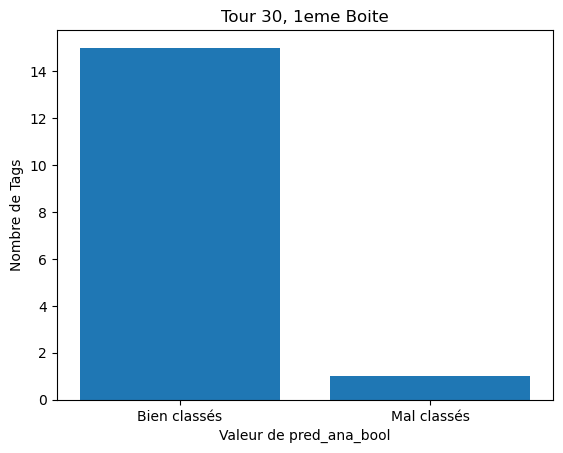

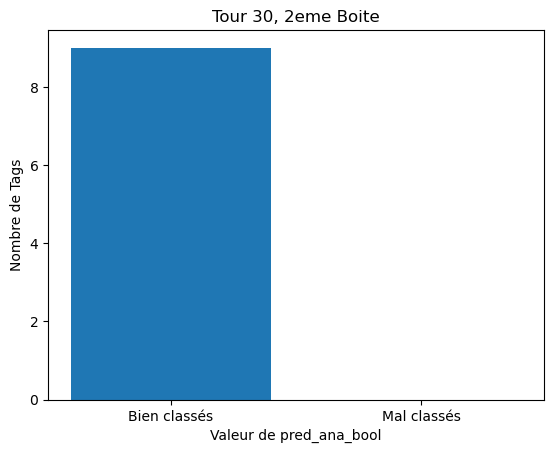

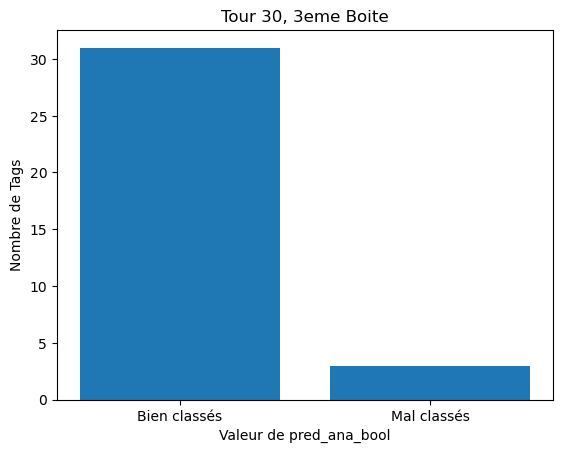

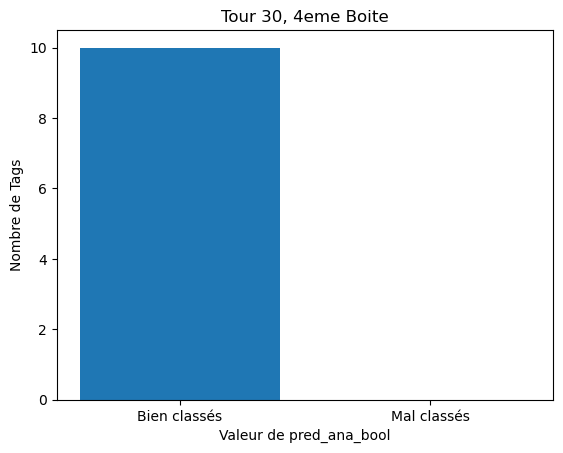

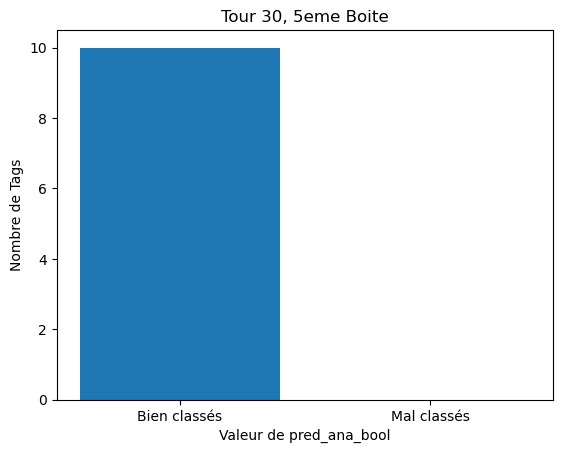

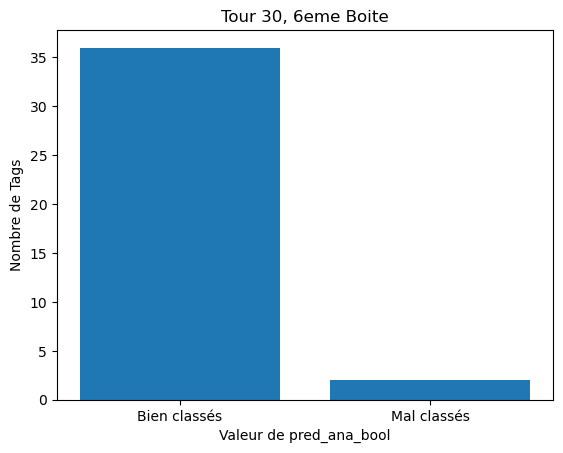

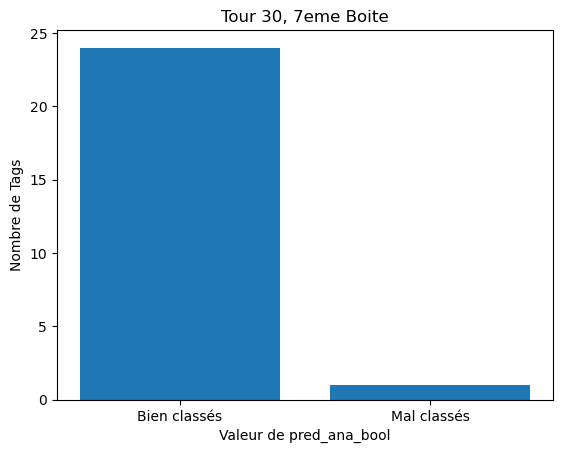

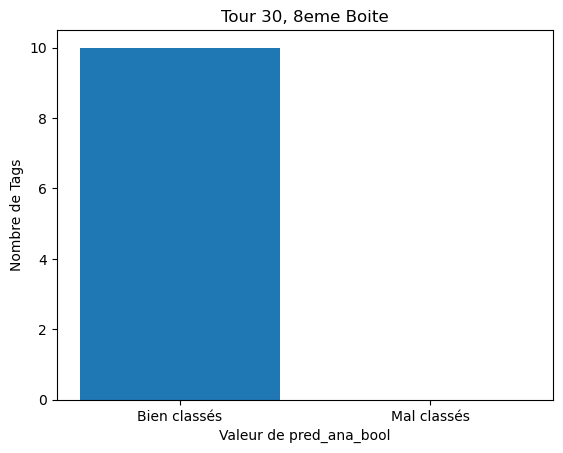

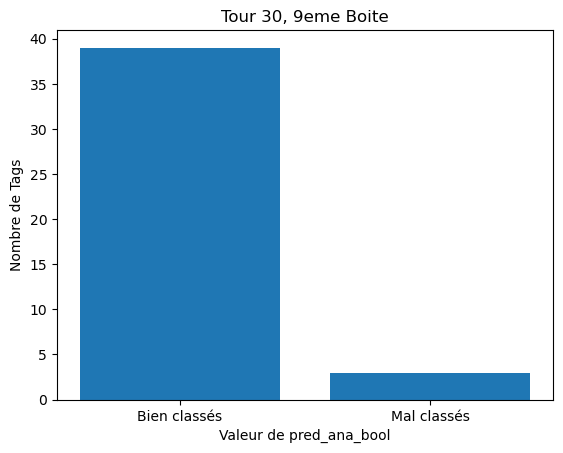

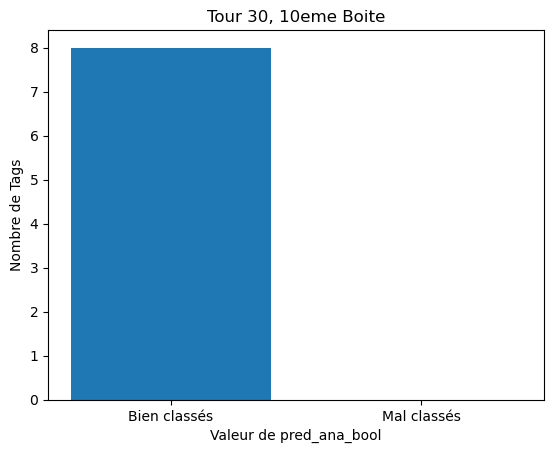

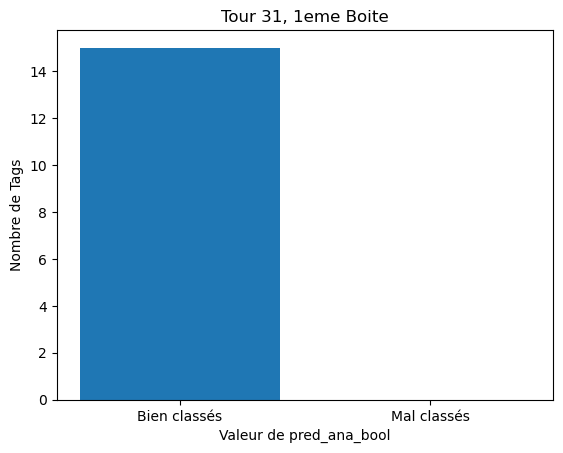

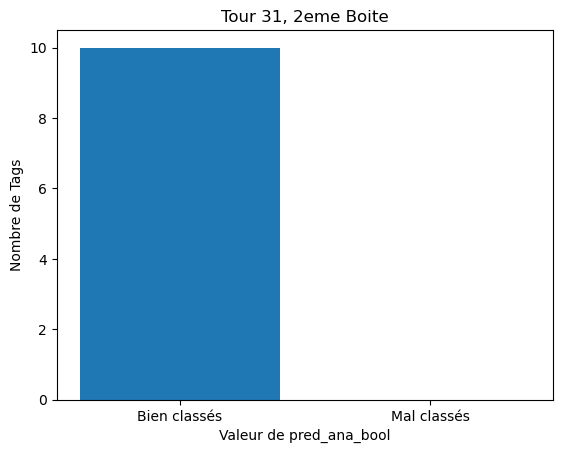

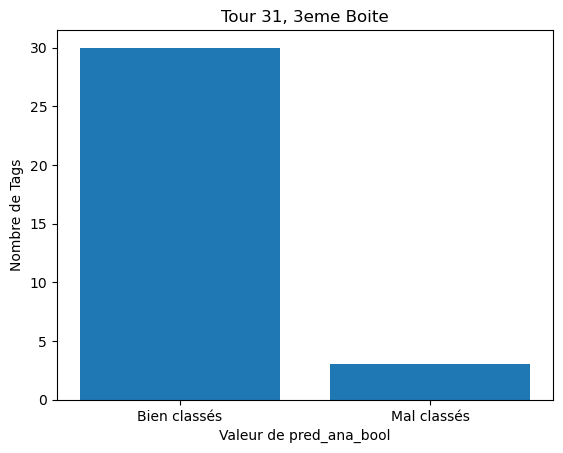

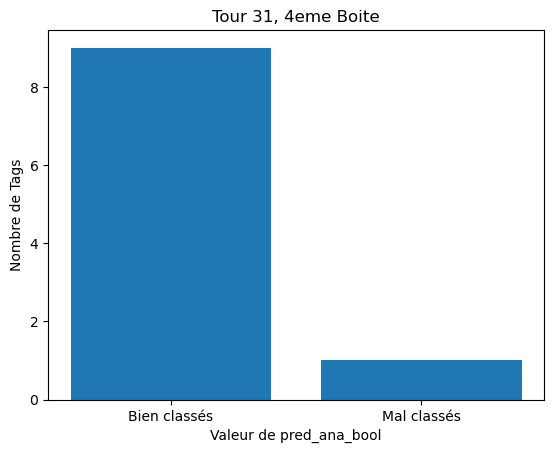

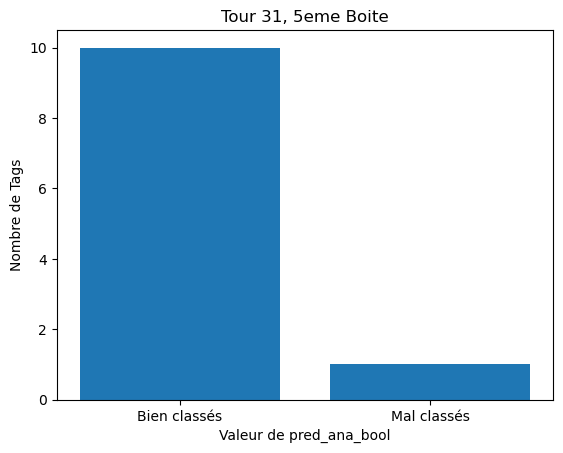

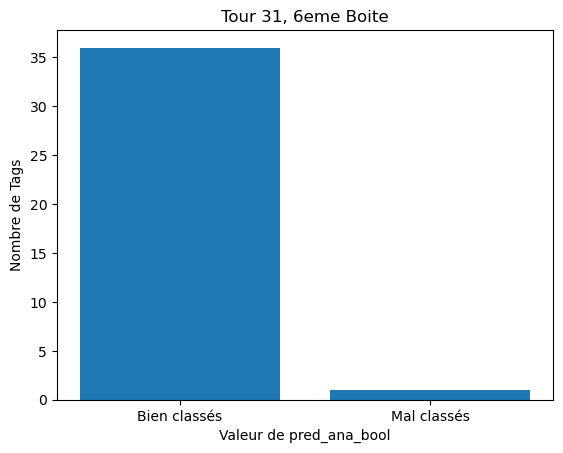

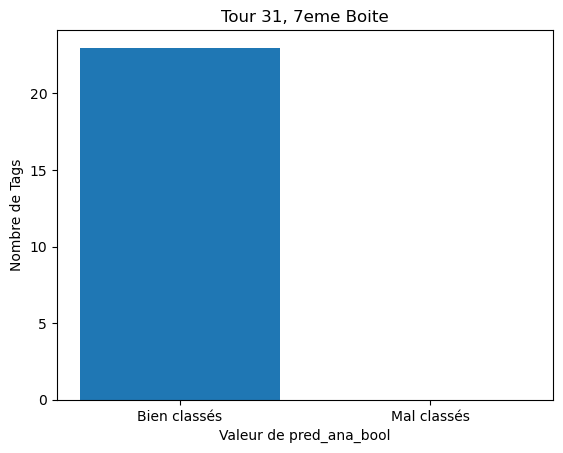

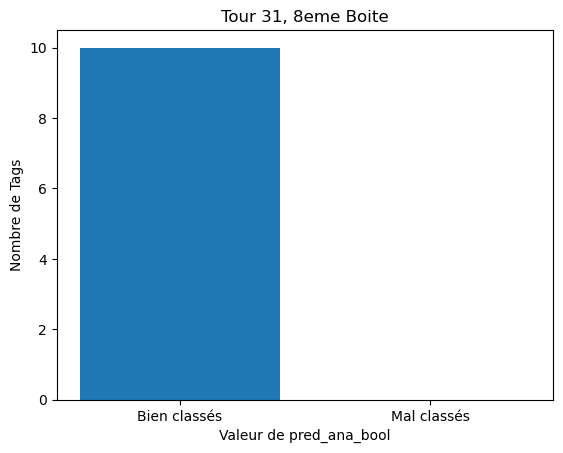

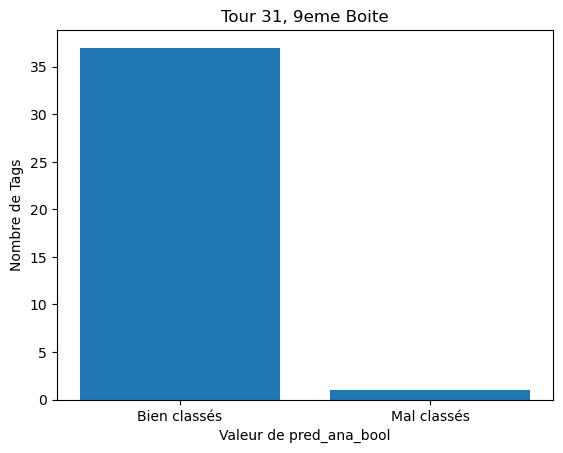

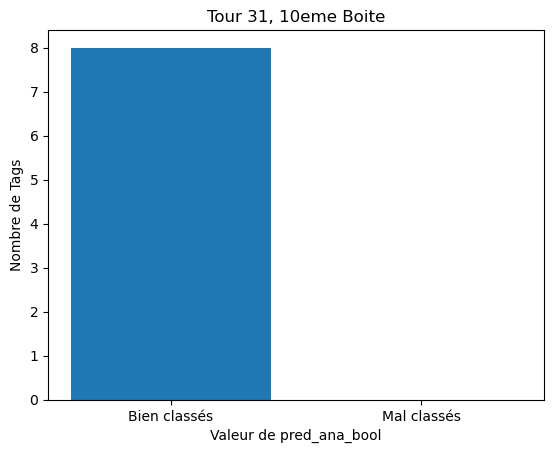

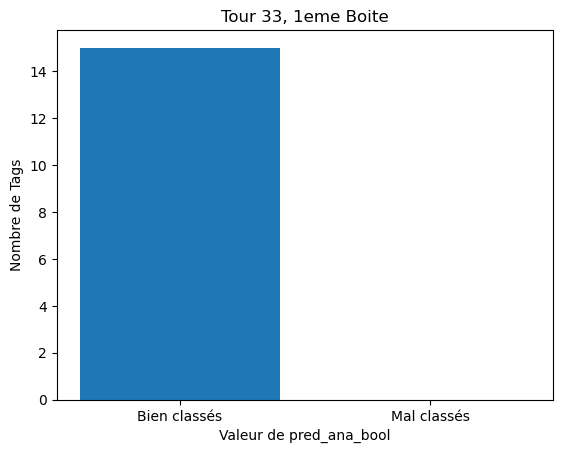

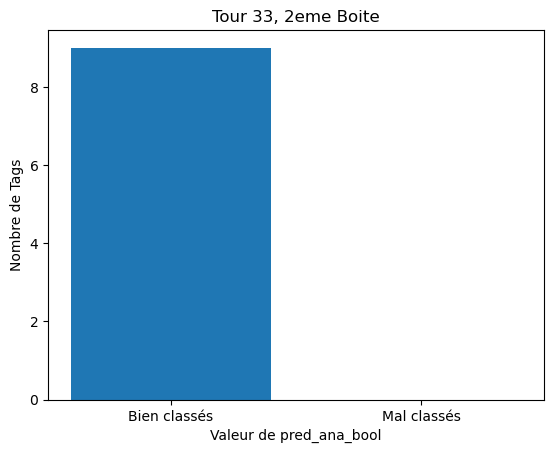

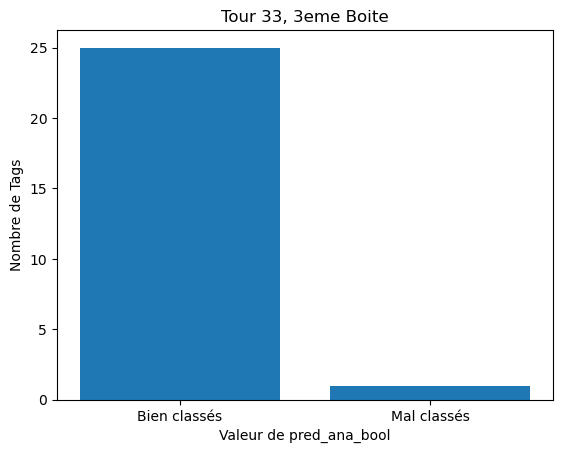

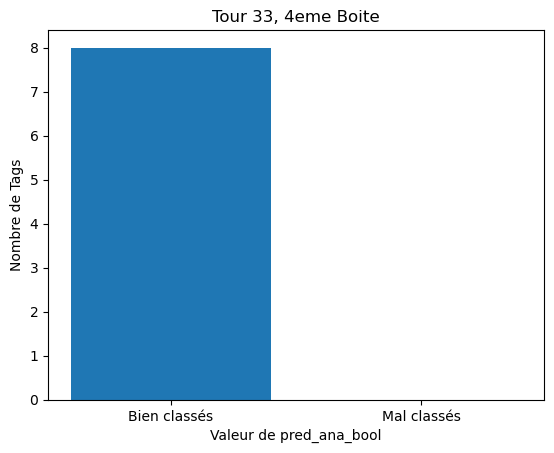

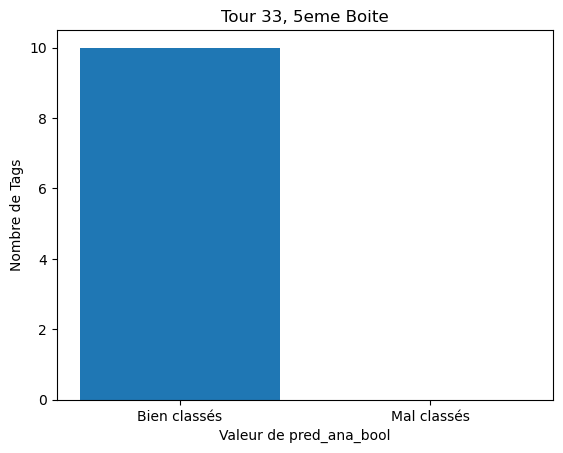

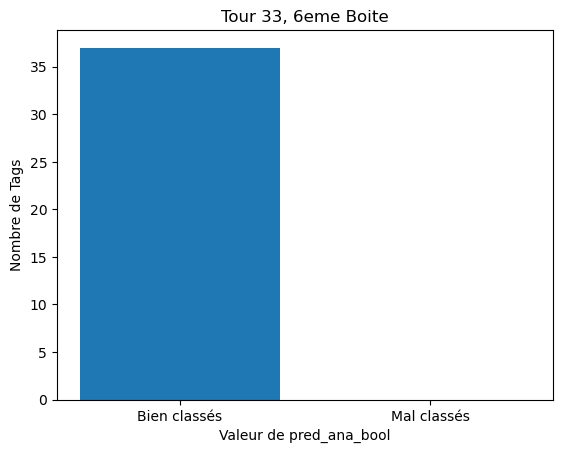

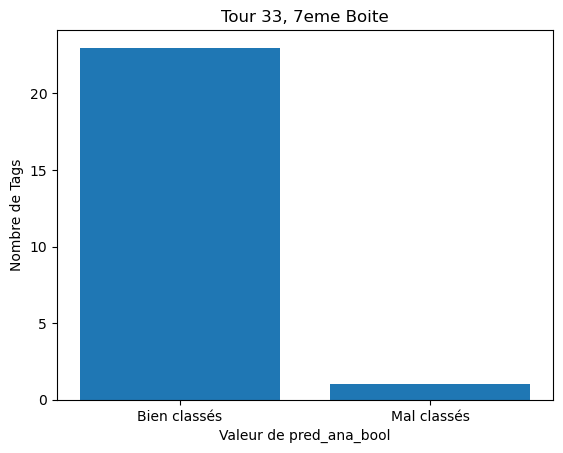

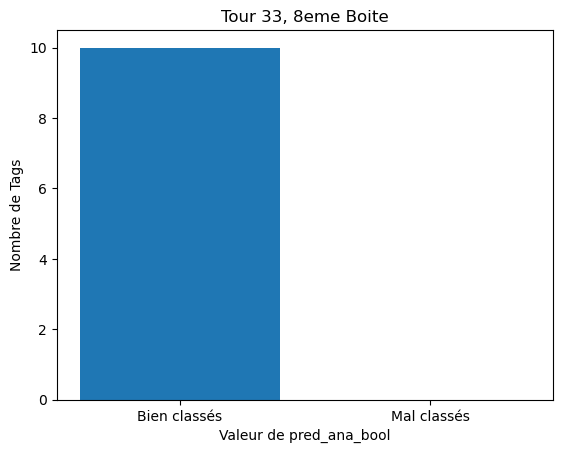

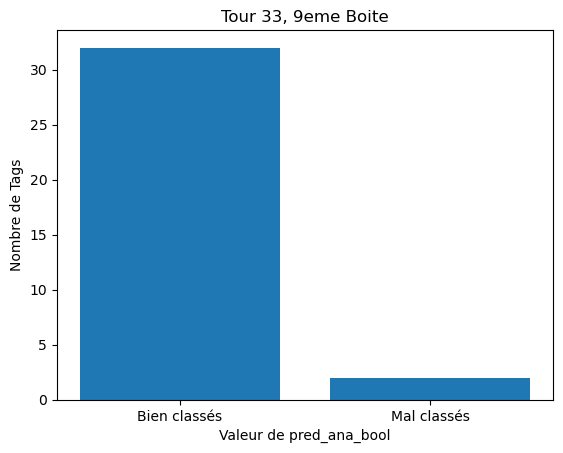

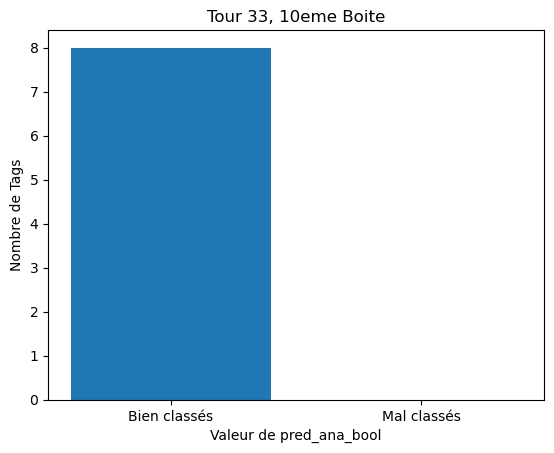

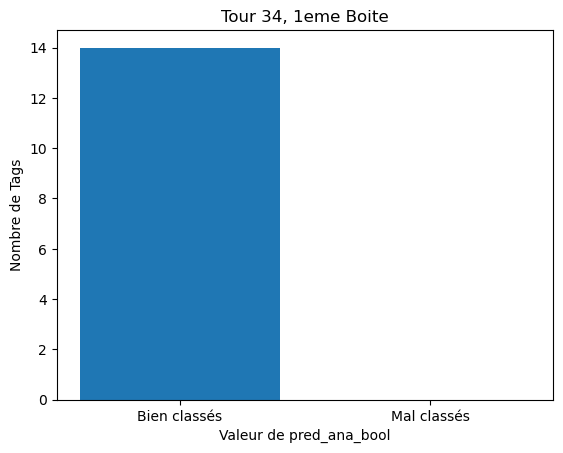

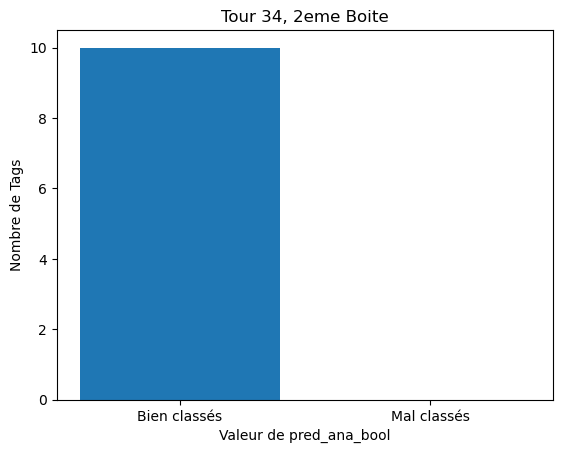

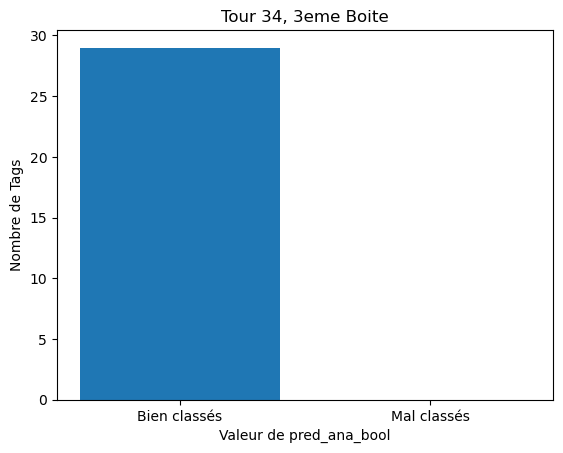

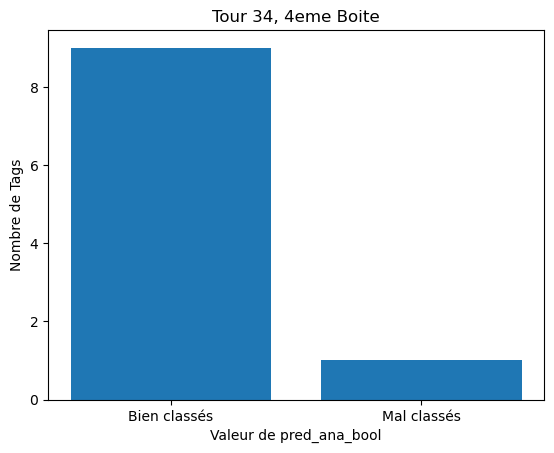

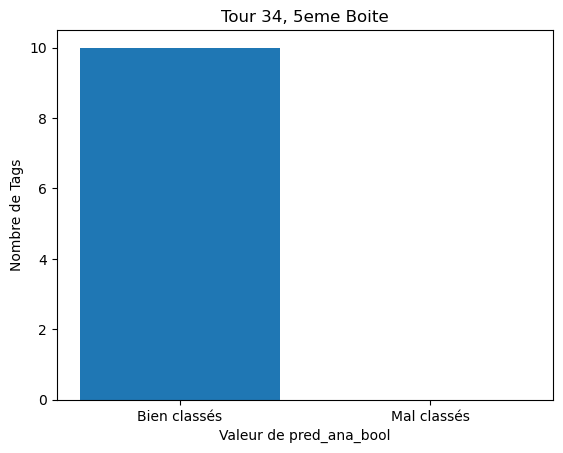

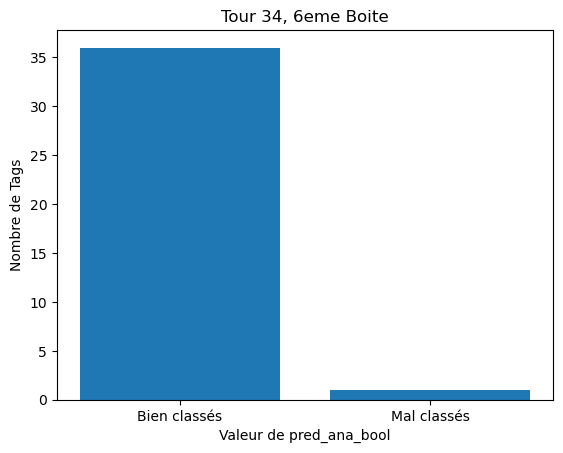

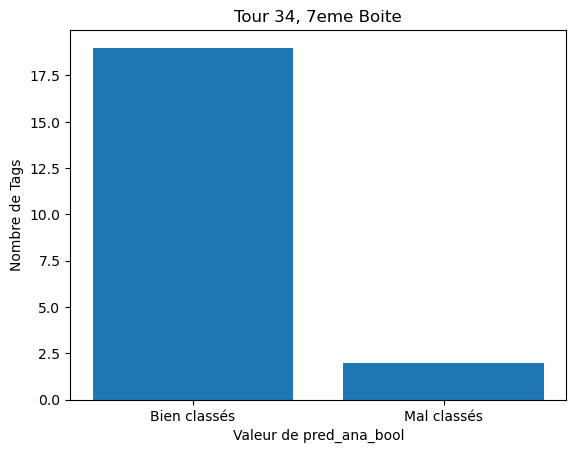

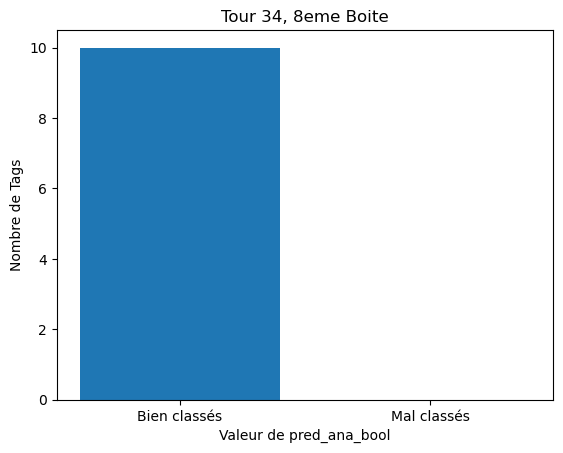

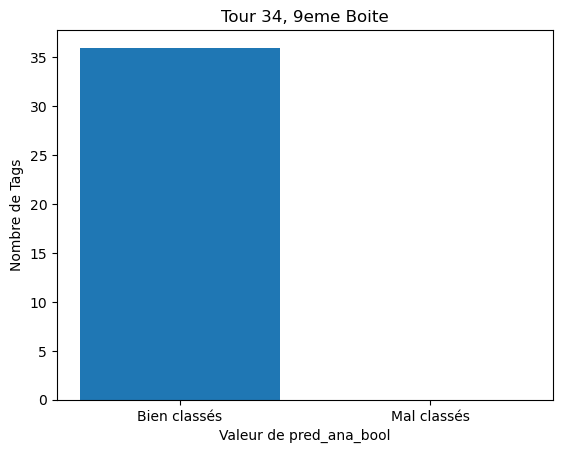

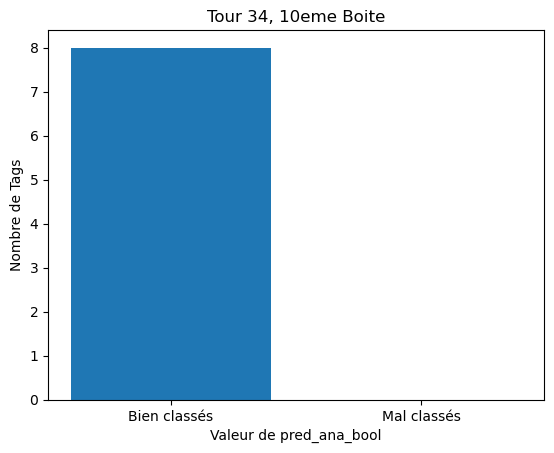

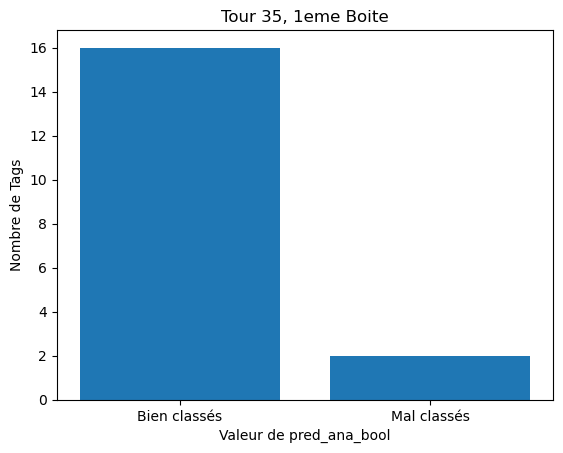

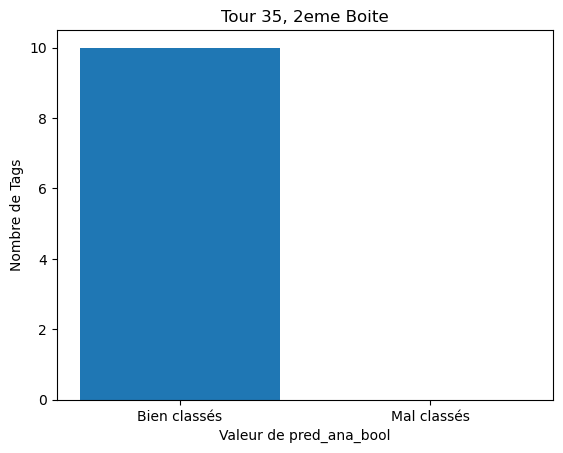

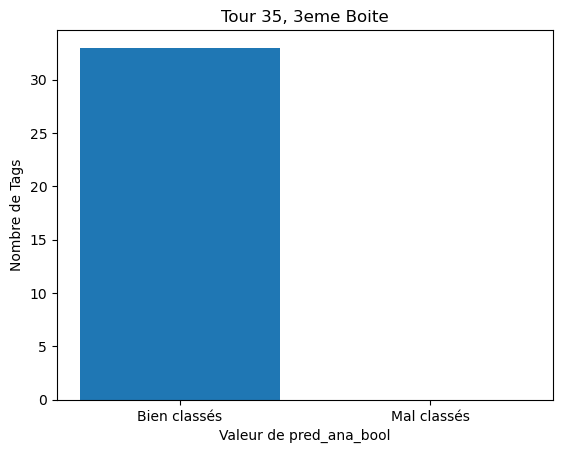

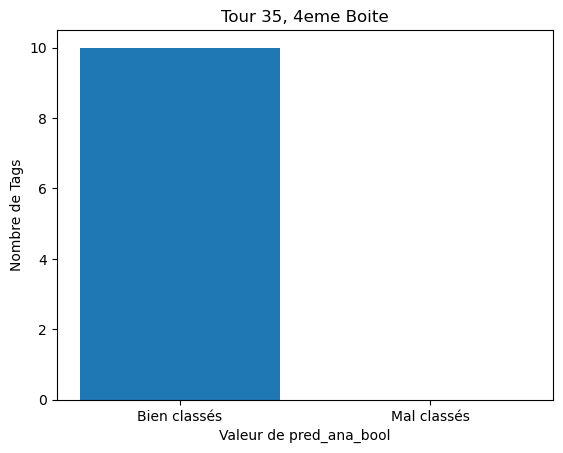

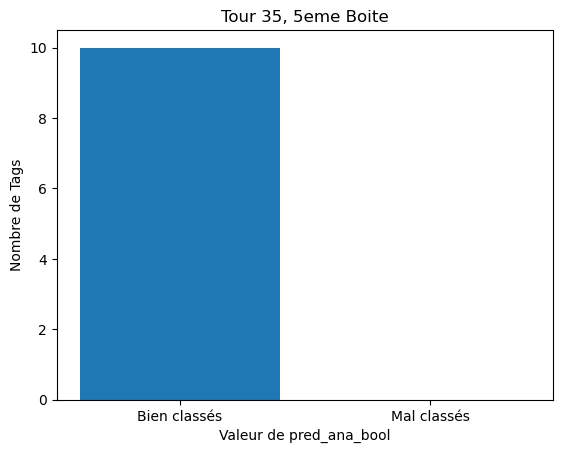

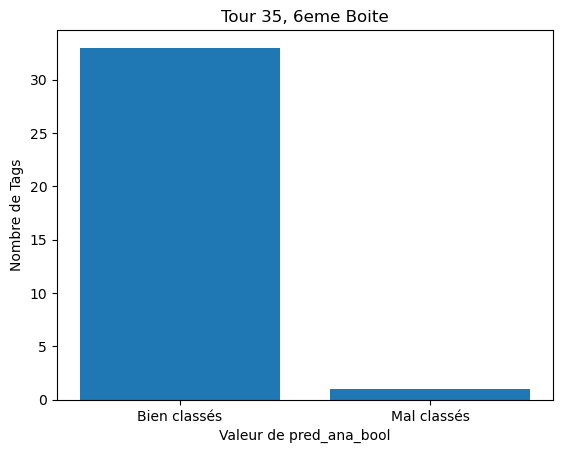

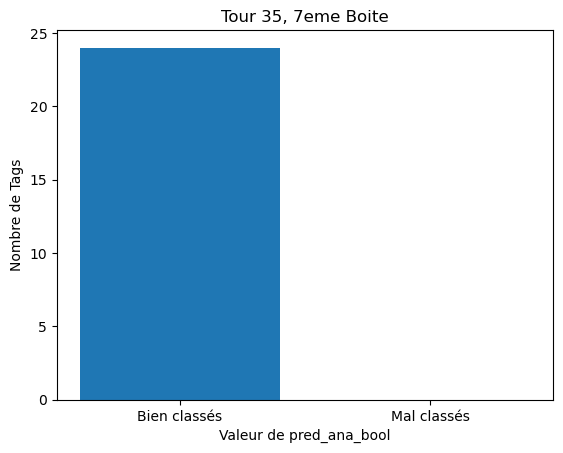

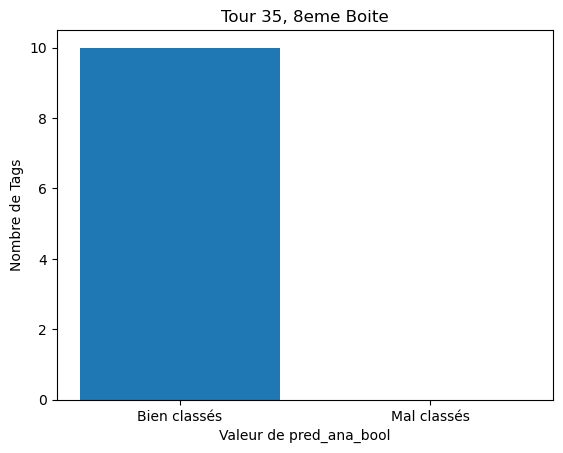

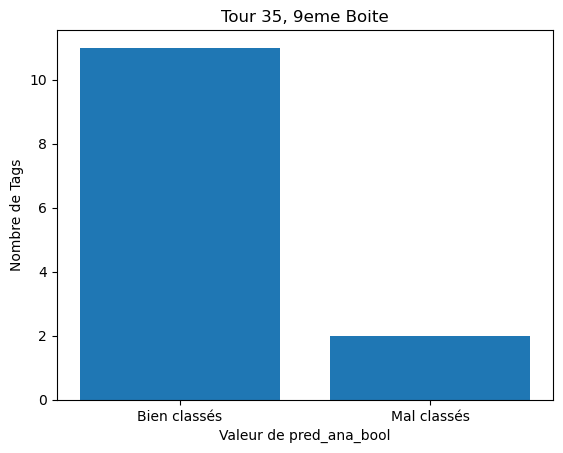

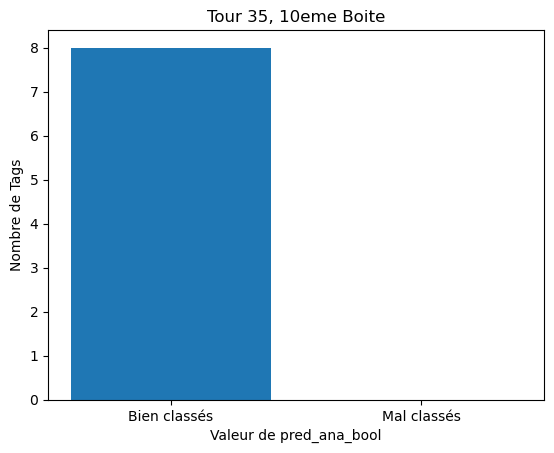

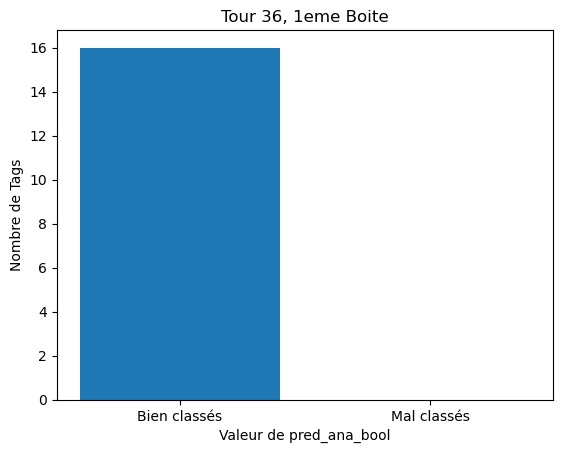

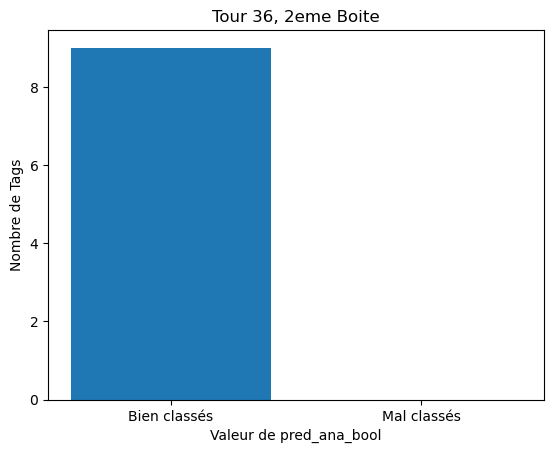

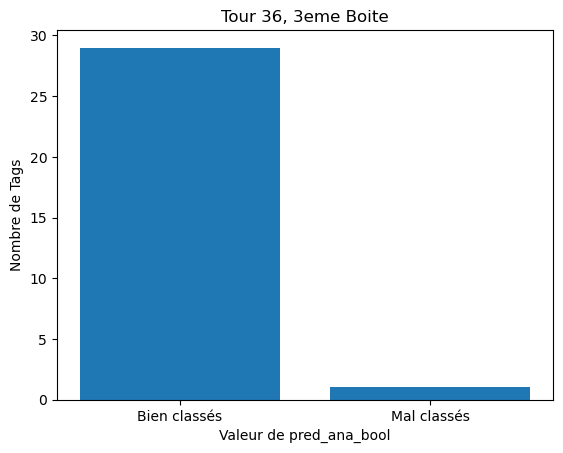

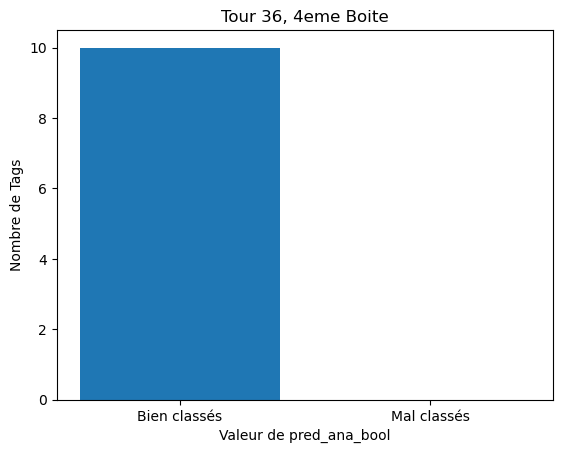

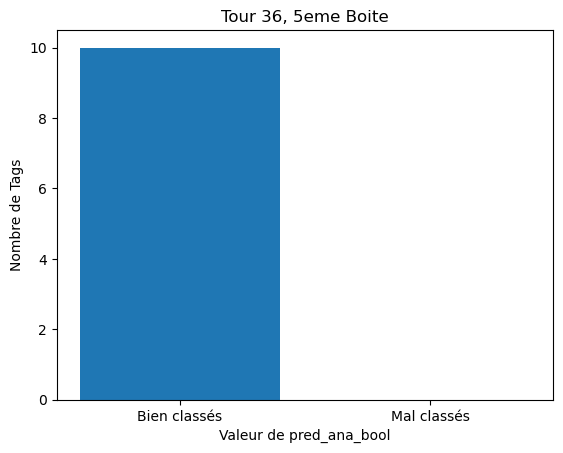

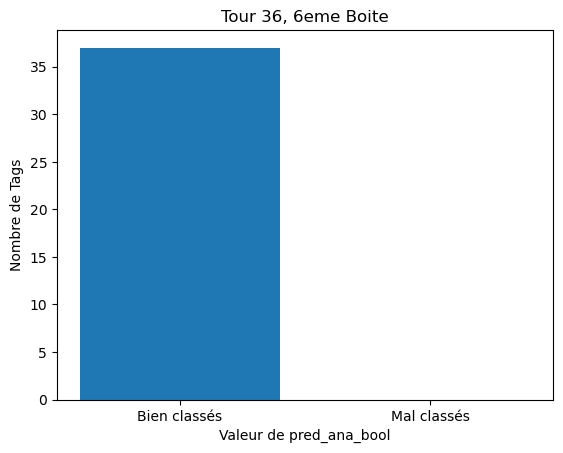

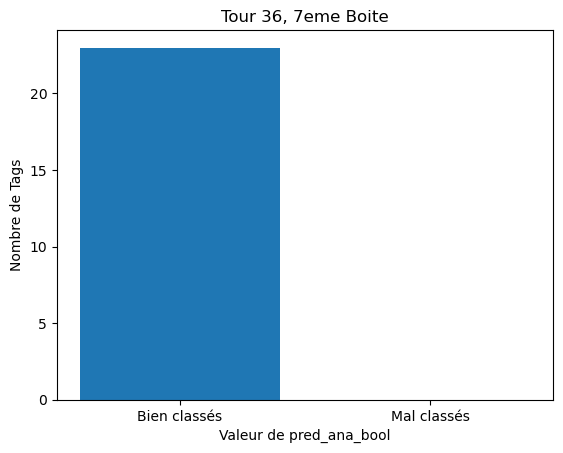

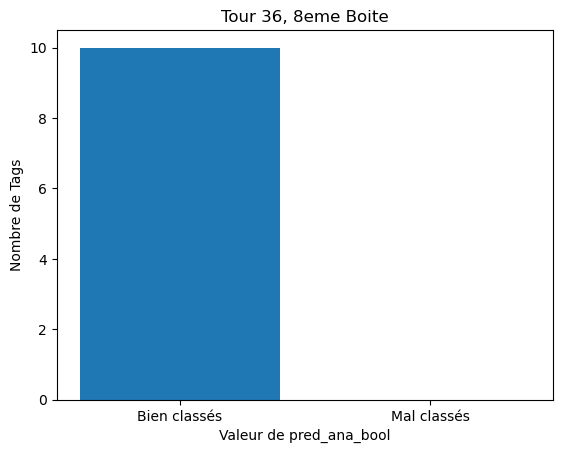

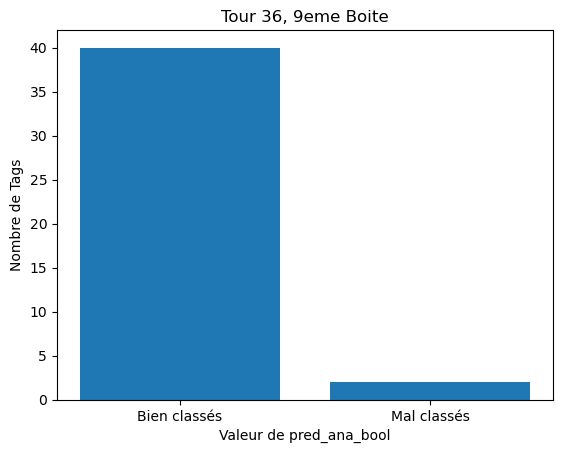

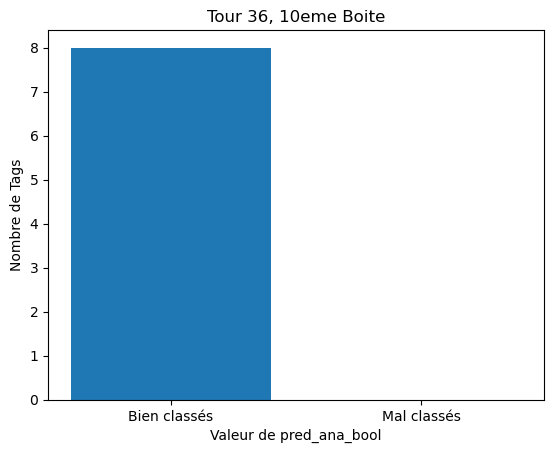

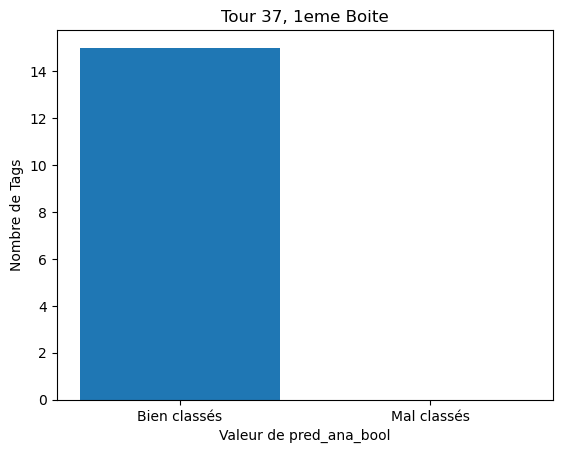

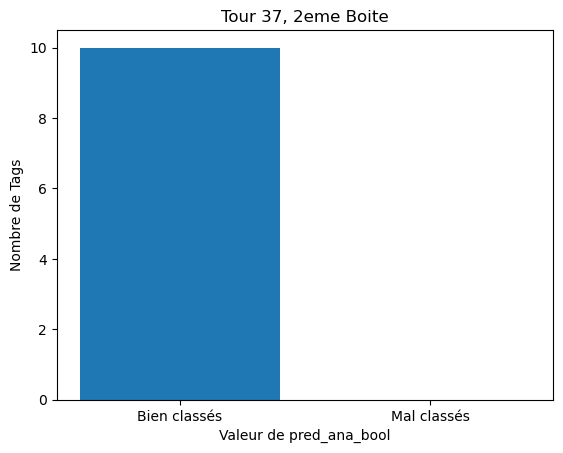

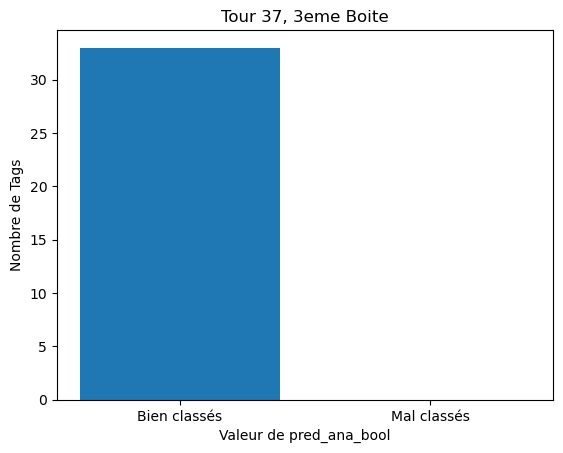

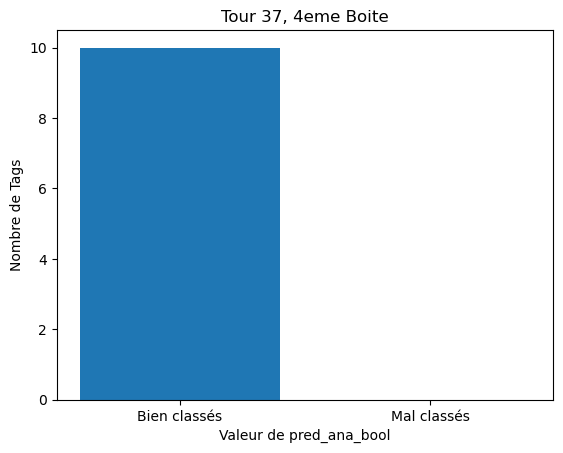

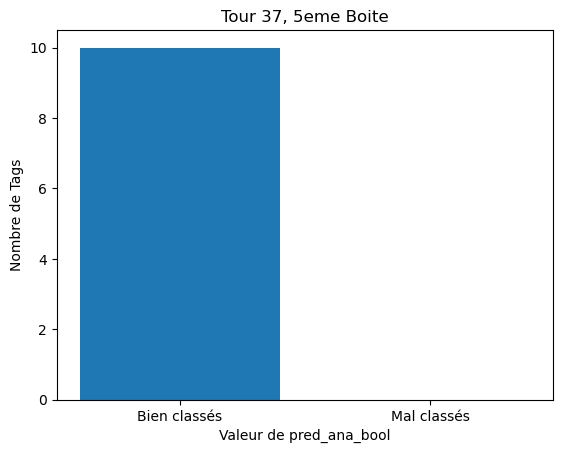

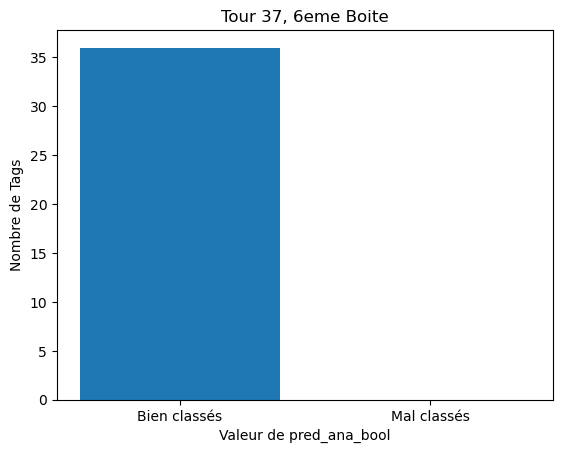

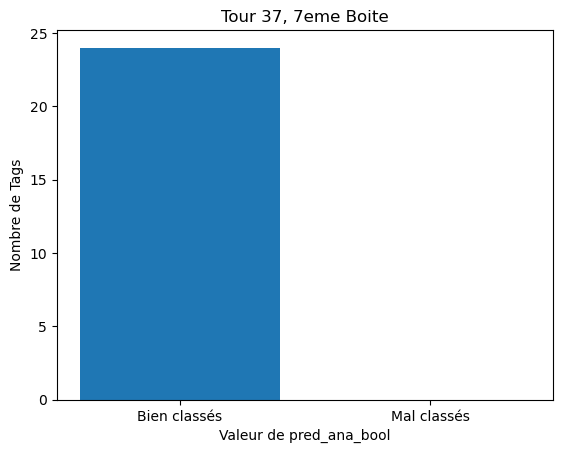

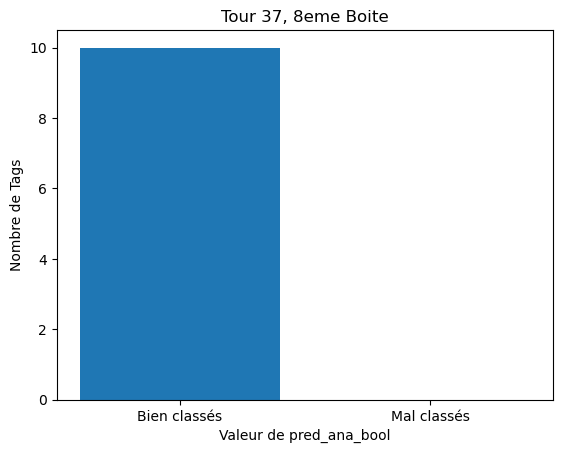

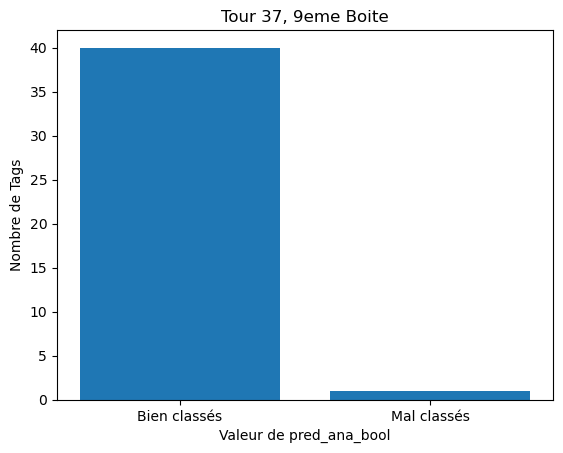

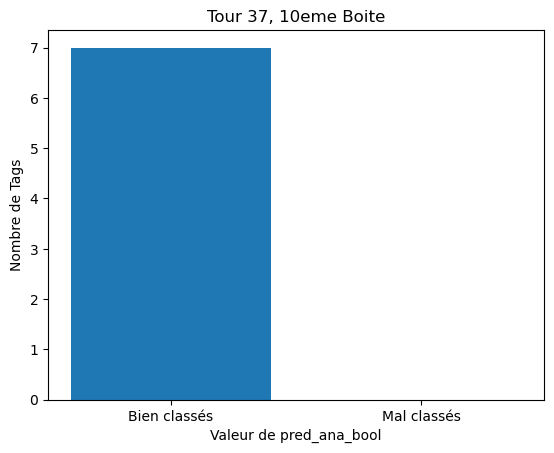

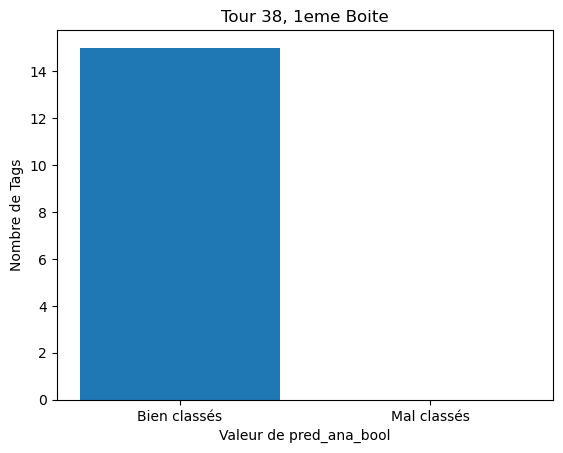

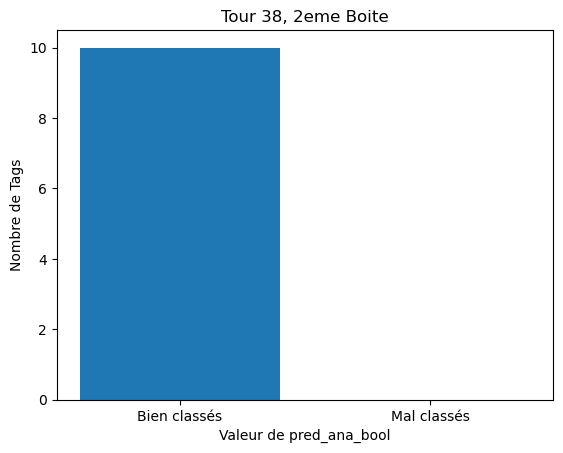

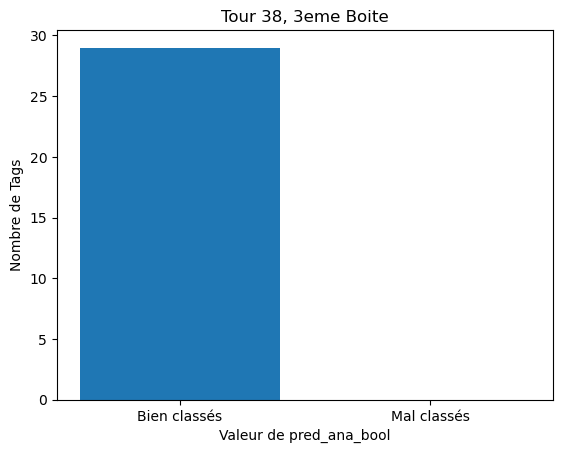

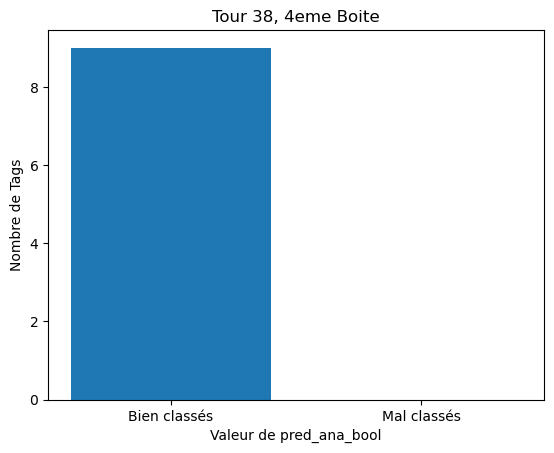

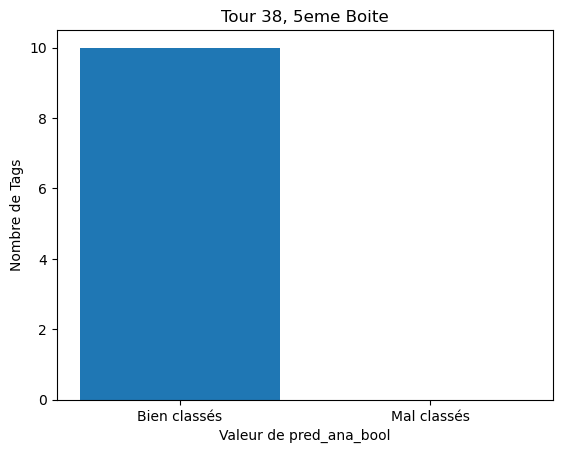

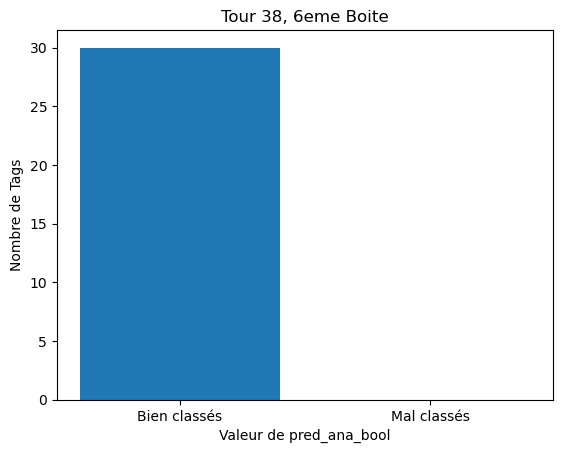

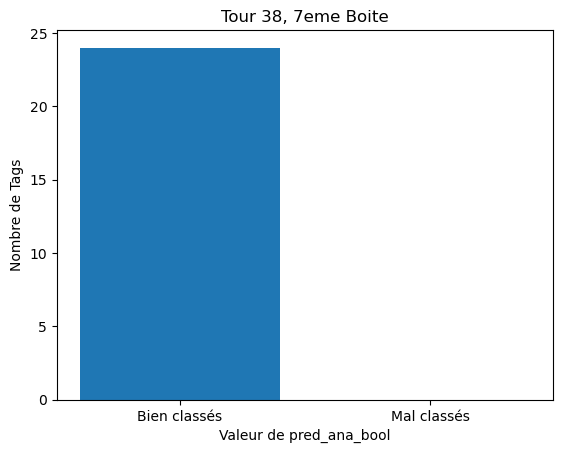

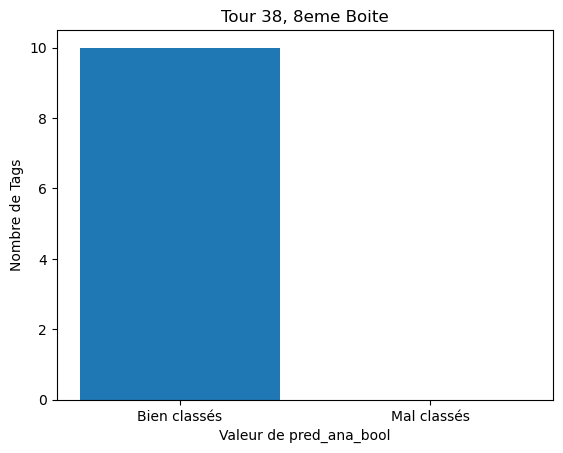

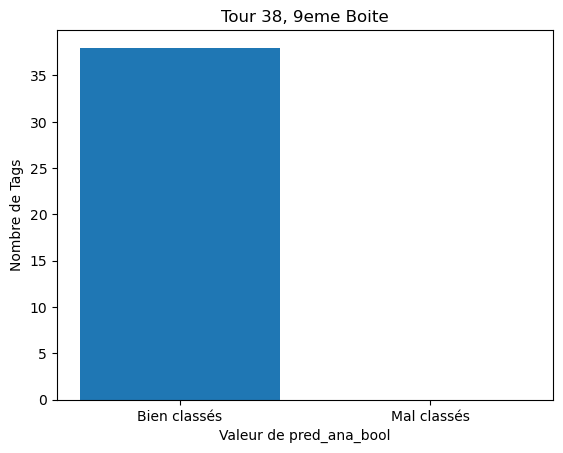

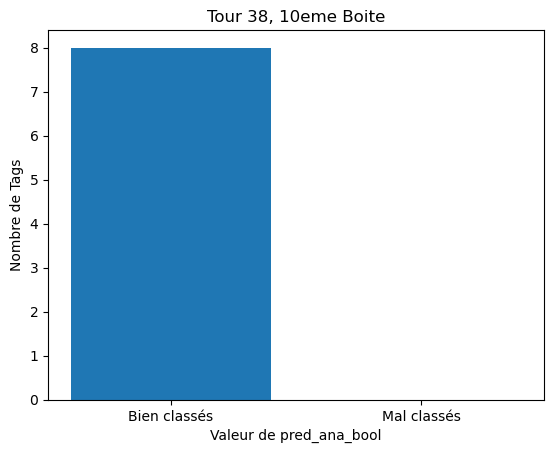

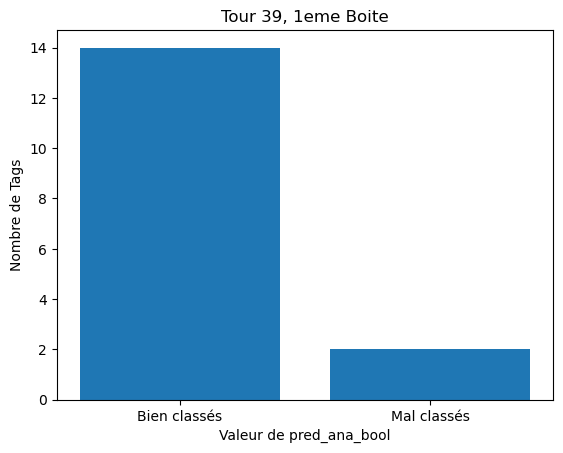

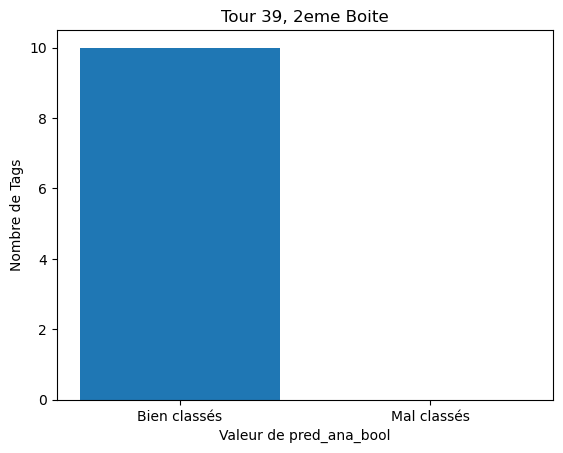

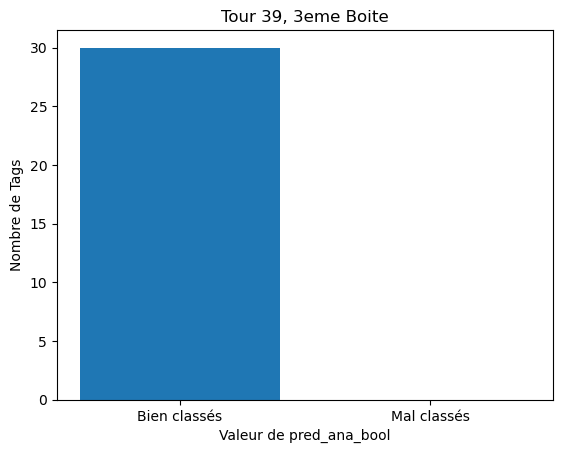

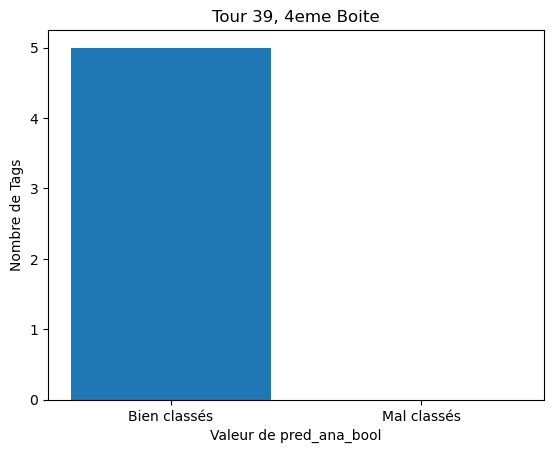

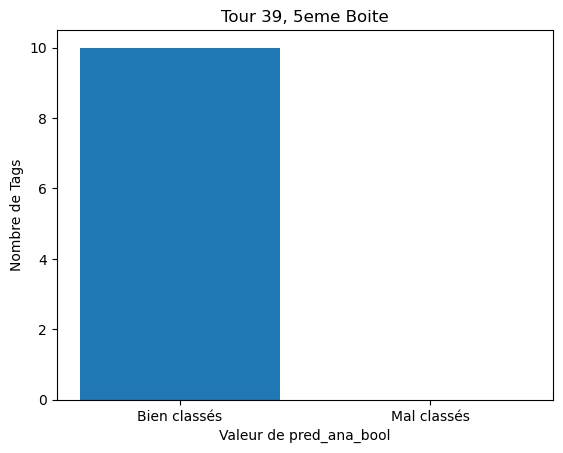

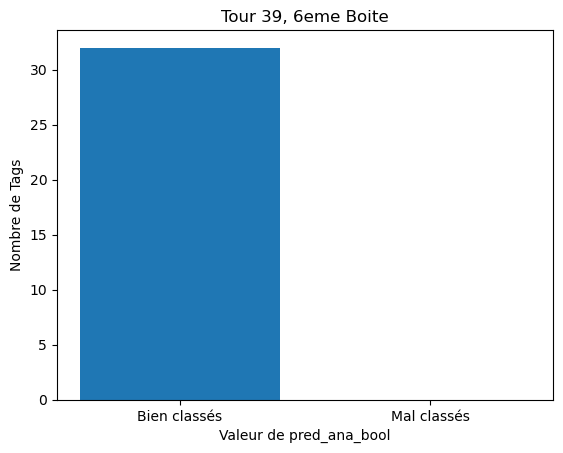

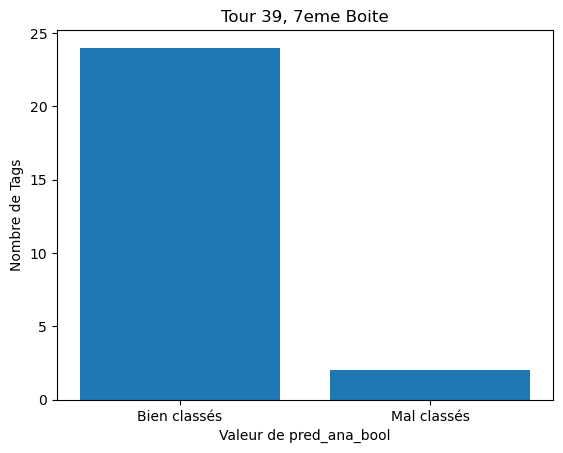

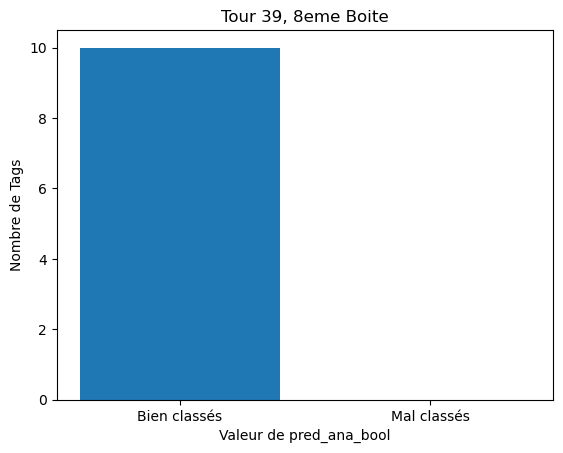

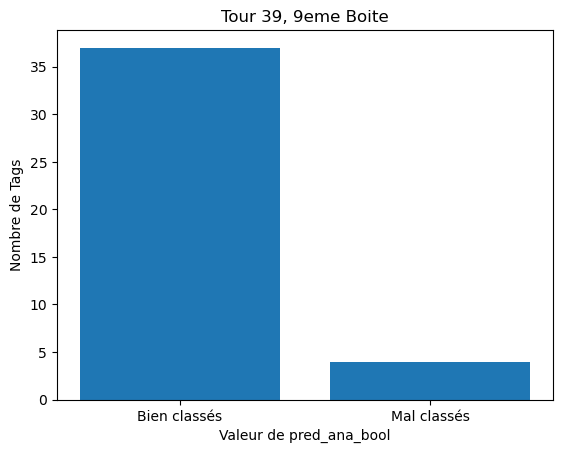

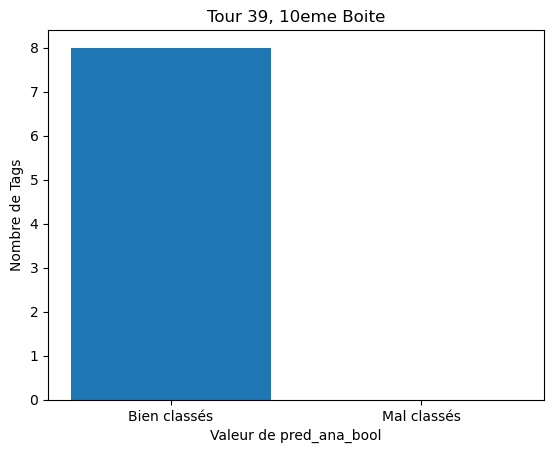

In [104]:

import matplotlib.pyplot as plt
for index, row in grp.iterrows():
    # Récupération des valeurs de 'run', 'refListId_actual', True et False pour cette ligne
    run_value = row['run']
    reflist_value = row['refListId_actual']
    true_value = row[True]
    false_value = row[False]
    
    # Création d'un histogramme
    plt.figure()
    plt.bar(['Bien classés', 'Mal classés'], [true_value, false_value])
    plt.title(f'Tour {run_value}, {reflist_value+1}eme Boite')
    plt.xlabel('Valeur de pred_ana_bool')
    plt.ylabel('Nombre de Tags')
    plt.show()